<a href="https://colab.research.google.com/github/combechelsey/Full-Scale-Waste-Water-Treatment-Plant-Data-Analysis/blob/main/Full_Scale_Waste_Water_Treatment_Plant_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Full Scale Waste Water Treatment Plant Data Analysis**

**Wastewater encompasses water that has undergone contamination due to human activities, environmental influences, or industrial procedures, thereby mandating comprehensive treatment to facilitate secure reclamation or conscientious disposal. Water decontaninated at Wastewater Treatment Plants (WWTP) is subsequently reintegrated into water bodies and aquifer recharge zones. Due to its implications for aquatic ecosystems and potential biological consequences, meticulous attention is imperative at each phase of treatment.**

**WWTP facilities stand as indispensable infrastructural assets within our communities. It is paramount to optimize their operational efficiency to mitigate energy consumption. By doing so, we safeguard the availability of clean drinking water for future generations and the uninterrupted functioning of vital industrial operations.**

**Data originally sourced from a wastewater treatment plant in Melbourne, Australia.  Atmospheric data collected by Melbourne weather stations.**

**Original Data link:**  https://www.kaggle.com/datasets/d4rklucif3r/full-scale-waste-water-treatment-plant-data

## Data Dictionary
  Average Outflow (avg_outflow)
  
  Average Inflow (avg_inflow)
  
  Energy Consumption (total_grid)
  
  Ammonia	(A)
  
  Biological Oxygen Demand (BOD)
  
  Chemical Oxygen Demand (COD)
  
  Total Nitrogen (TN)
  
  Average Temperature	(T)
  
  Maximum temperature	(TM)
  
  Minimum temperature	(Tm)
  
  Atmospheric pressure (SLP)
  
  Average humidity	(H)
  
  Total rainfall	(PP)
  
  Average visibility (VV)
  
  Average wind speed	(VW)
  
  Maximum wind speed	(VG)
  
  Year	(year)
  
  Month	(month)
  
  Day (day)





https://www.sciencedirect.com/science/article/abs/pii/S0957582021004663?via%3Dihub

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Custom color palette for water theme
water_theme_colors = ['#007BA7', '#00A6ED', '#80C8E5', '#B2EBF2']

# Set the custom color palette globally
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=water_theme_colors)

# Set global style settings
plt.rcParams['figure.figsize'] = (12, 10)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['grid.alpha'] = 0.7

## Load and Inspect Data

In [4]:
#Loading dataset
file_path = "/content/drive/MyDrive/CodingDojo/02-MachineLearning/Week08/Data/Data-Melbourne_F.csv"
df = pd.read_csv(file_path)
df.head(30)

avg_outflow  avg_inflow  total_grid    Am    BOD     COD      TN     T  \
0         2.941       2.589      175856  27.0  365.0   730.0  60.378  19.3   
1         2.936       2.961      181624  25.0  370.0   740.0  60.026  17.1   
2         2.928       3.225      202016  42.0  418.0   836.0  64.522  16.8   
3         2.928       3.354      207547  36.0  430.0   850.0  63.000  14.6   
4         2.917       3.794      202824  46.0  508.0  1016.0  65.590  13.4   
5         2.912       3.750      247691  40.0  410.0   820.0  61.786  18.9   
6         2.355       3.507      224706  51.0  555.0  1110.0  68.820  25.9   
7         2.366       3.188      212440  41.0  365.0   730.0  62.218  17.7   
8         3.923       3.378      202676  26.0  355.0   710.0  61.433  26.4   
9         3.912       3.425      202411  42.0  530.0   830.0  66.354  35.5   
10        2.971       3.775      171123  47.0  435.0   870.0  65.531  32.1   
11        3.833       3.763      193509  43.0  295.0   590.0  59.548  33.9   
12        2.984       3.487      205761  38.0  600.0  1200.0  68.820  19.2   
13        3.236       3.604      184108  38.0  465.0   930.0  64.568  18.4   
14        2.950       3.600      200044  38.0  505.5  1011.0  65.590  17.6   
15        2.935       3.481      173825  47.0  470.0   980.0  76.000  16.3   
16        2.937       3.623      230632  39.0  431.0   862.0  64.847  23.6   
17        3.308       3.785      236472  45.0  380.0   760.0  62.090  16.3   
18        2.933       3.596      214057  36.0  345.0   690.0  63.227  29.3   
19        2.940       3.642      204062  29.0  286.5   573.0  54.630  27.2   
20        3.427       3.519      245524  31.0  360.0   720.0  61.496  17.7   
21        2.980       3.541      230113  38.0  380.0   840.0  65.374  22.6   
22        2.997       3.526      214635  43.0  344.0   688.0  63.521  31.7   
23        2.978       3.542      210017  44.0  390.5   781.0  62.569  19.2   
24        2.983       3.332      201393  35.0  391.5   783.0  62.218  17.7   
25        2.989       3.249      201578  48.0  270.0   740.0  55.000  22.5   
26        2.991       3.408      190528  46.0  385.0   770.0  63.380  28.7   
27        2.989       3.498      177913  41.0  377.5   755.0  62.371  21.8   
28        2.967       3.488      174894  34.0  435.5   871.0  64.366  17.6   
29        2.965       3.448      196915  36.0  320.0   871.0  64.301  20.1   

      TM    Tm  SLP   H    PP    VV     V    VM    VG  year  month  day  
0   25.1  12.6  0.0  56  1.52  10.0  26.9  53.5  79.5  2014      1    1  
1   23.6  12.3  0.0  63  0.00  10.0  14.4  27.8   0.0  2014      1    2  
2   27.2   8.8  0.0  47  0.25  10.0  31.9  61.1  77.8  2014      1    5  
3   19.9  11.1  0.0  49  0.00  10.0  27.0  38.9  53.5  2014      1    6  
4   19.1   8.0  0.0  65  0.00  10.0  20.6  35.2  53.5  2014      1    7  
5   27.3   7.7  0.0  52  0.00   0.0  15.6  31.7   0.0  2014      1    8  
6   32.4  12.1  0.0  39  0.00   0.0  26.7  46.5  59.4  2014      1    9  
7   24.6  13.0  0.0  69  0.00   9.8  13.1  25.9   0.0  2014      1   12  
8   36.0  12.7  0.0  44  0.00   0.0  19.8  51.9  64.8  2014      1   13  
9   43.5  28.5  0.0  20  0.00   0.0  27.8  57.6  72.2  2014      1   14  
10  42.9  23.7  0.0  29  0.00   0.0  18.0  35.2   0.0  2014      1   15  
11  43.1  23.7  0.0  24  0.00   0.0  19.3  46.5   0.0  2014      1   16  
12  23.1  15.2  0.0  64  0.00  10.0  24.8  31.7   0.0  2014      1   19  
13  24.7  15.8  0.0  66  0.00  10.0  25.6  35.2   0.0  2014      1   20  
14  22.6  14.0  0.0  61  0.00  10.0  25.0  37.0  46.5  2014      1   21  
15  23.4  10.0  0.0  59  0.00   0.0  17.4  29.4   0.0  2014      1   22  
16  33.7  10.2  0.0  52  1.52   8.5  14.8  27.8  46.5  2014      1   23  
17  22.8  12.8  0.0  72  4.32  10.0  21.9  31.7   0.0  2014      1   24  
18  35.5  16.7  0.0  26  0.00   0.0  32.6  48.2  66.5  2014      1   27  
19  42.1  17.6  0.0  34  0.00  10.0  25.7  51.9  70.6  2014      1   28  
20  23.7  13.0  0.0  64  0.00  

In [5]:
#Saving original dataset as 'df2'
df2 = df.copy()

In [6]:
#Viewing info on dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1382 entries, 0 to 1381
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   avg_outflow  1382 non-null   float64
 1   avg_inflow   1382 non-null   float64
 2   total_grid   1382 non-null   int64  
 3   Am           1382 non-null   float64
 4   BOD          1382 non-null   float64
 5   COD          1382 non-null   float64
 6   TN           1382 non-null   float64
 7   T            1382 non-null   float64
 8   TM           1382 non-null   float64
 9   Tm           1382 non-null   float64
 10  SLP          1382 non-null   float64
 11  H            1382 non-null   int64  
 12  PP           1382 non-null   float64
 13  VV           1382 non-null   float64
 14  V            1382 non-null   float64
 15  VM           1382 non-null   float64
 16  VG           1382 non-null   float64
 17  year         1382 non-null   int64  
 18  month        1382 non-null   int64  
 19  day   

In [7]:
#View descriptive statistics for numerical colums
df.describe()

avg_outflow   avg_inflow     total_grid           Am          BOD  \
count  1382.000000  1382.000000    1382.000000  1382.000000  1382.000000   
mean      3.930608     4.506338  275159.089001    39.222302   382.061708   
std       1.228778     1.439583   44640.533689     7.761598    85.996012   
min       0.000004     2.589000  116638.000000    13.000000   140.000000   
25%       3.074500     3.643250  246435.750000    34.000000   330.000000   
50%       3.701000     4.161500  275808.000000    39.000000   360.000000   
75%       4.498750     4.847750  305703.750000    44.000000   422.980000   
max       7.920000    18.968000  398328.000000    93.000000   850.000000   

               COD           TN            T           TM           Tm  \
count  1382.000000  1382.000000  1382.000000  1382.000000  1382.000000   
mean    845.960434    62.740752    15.036686    20.530897    10.037337   
std     145.416540     3.571035     5.398491     7.096760     4.656887   
min     360.000000    40.000000     0.000000     0.000000    -2.000000   
25%     751.250000    61.396000    10.800000    15.000000     6.800000   
50%     845.000000    62.957500    14.300000    19.200000     9.600000   
75%     920.000000    64.366000    18.575000    25.200000    13.000000   
max    1700.000000    92.000000    35.500000    43.500000    28.500000   

               SLP            H           PP           VV            V  \
count  1382.000000  1382.000000  1382.000000  1382.000000  1382.000000   
mean      3.675036    63.558611     0.218090     9.101592    19.482706   
std      61.010416    14.534205     1.306923    16.322905     7.136868   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000    55.000000     0.000000     8.400000    14.400000   
50%       0.000000    66.000000     0.000000    10.000000    18.100000   
75%       0.000000    74.000000     0.000000    10.000000    23.300000   
max    1022.000000    97.000000    18.030000   512.000000    49.100000   

                VM           VG         year        month          day  
count  1382.000000  1382.000000  1382.000000  1382.000000  1382.000000  
mean     35.381259    29.184009  2016.258321     6.184515    15.584660  
std      11.626362    31.366315     1.583491     3.410588     8.741422  
min       0.000000     0.000000  2014.000000     1.000000     1.000000  
25%      27.800000     0.000000  2015.000000     3.000000     8.000000  
50%      33.500000     0.000000  2016.000000     6.000000    15.000000  
75%      42.400000    57.600000  2018.000000     9.000000    23.000000  
max      83.500000   107.600000  2019.000000    12.000000    31.000000

In [8]:
#Viewing quantity of rows and columns within dataframe
df.shape

(1382, 20)

- There are 1382 rows and 20 columns.

##Clean Data

Checking the data types:

In [9]:
#Viewing data types within dataframe
df.dtypes

avg_outflow    float64
avg_inflow     float64
total_grid       int64
Am             float64
BOD            float64
COD            float64
TN             float64
T              float64
TM             float64
Tm             float64
SLP            float64
H                int64
PP             float64
VV             float64
V              float64
VM             float64
VG             float64
year             int64
month            int64
day              int64
dtype: object

- All datatypes are numeric.

###Duplicated Data

In [10]:
#Checking for duplicate rows within dataset
df.duplicated().sum()

0

- There are no duplicated rows in this dataset




###Missing Values

In [11]:
#Viewing null values
df.isna().sum()

avg_outflow    0
avg_inflow     0
total_grid     0
Am             0
BOD            0
COD            0
TN             0
T              0
TM             0
Tm             0
SLP            0
H              0
PP             0
VV             0
V              0
VM             0
VG             0
year           0
month          0
day            0
dtype: int64

Identifying % of missing data:

In [12]:
#Viewing null values as a percentage of total column values
df.isna().sum() / len(df) * 100

avg_outflow    0.0
avg_inflow     0.0
total_grid     0.0
Am             0.0
BOD            0.0
COD            0.0
TN             0.0
T              0.0
TM             0.0
Tm             0.0
SLP            0.0
H              0.0
PP             0.0
VV             0.0
V              0.0
VM             0.0
VG             0.0
year           0.0
month          0.0
day            0.0
dtype: float64

- There are no missing values in this dataset.

##Exploratory Data Analysis

###EDA Functions

In [13]:
#add the new print statements from explore_categorical
def explore_numeric(df, x, figsize=(6,5) ):
  #make a copy of df
  temp_df = df.copy()
  # Calculate percent of null values for printing
  null_count = temp_df[x].isna().sum()
  null_percent = null_count/len(temp_df)*100

  # Make figure with gridspec for subplots
  gridspec = {"height_ratios":[0.7, 0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                          sharex= True, gridspec_kw = gridspec)
  # Histogram on top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  # Adding title
  axes[0].set_title(f"Column: {x}", fontweight="bold")

  # Adjusting subplots
  fig.tight_layout()

  # Display plot before message
  plt.show()

  # Print null value info
  print(f" - NaN's Found: {null_count} ({round(null_percent, 2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")

  # Get the most common values as number and percent
  most_common_value_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_value_count.index[0]
  freq = most_common_value_count.values[0]
  perc_most_common = freq / len(df) *100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common, 2)}%)")

 # Print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n-[!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print(f"- Not constant or quasi-constant.")
  return fig, axes

In [14]:
'''Multivariate Plotting functions vs Numeric Target'''

def plot_categorical_vs_target(df, x, y="avg_output", figsize=(6,4),
                               fillna=True, placeholder= "Missing",
                               order = None):
  # Make a copy of df
  temp_df = df.copy()

  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls
  else:
    temp_df = temp_df.dropna(subset=[x])

  # Create figures
  fig, ax = plt.subplots(figsize=figsize)

  # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order= order, alpha=0.6,
              linewidth= 1, edgecolor="black", errorbar = None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax, order= order,
                hue_order= order, legend=False,
                size=3, zorder=0)
  # Rotate x labels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

  # Add title
  ax.set_title(f"{x} vs. {y}", fontweight="bold")
  fig.tight_layout()
  return fig, ax

def plot_numeric_vs_target(df, x, y="Item_Outlet_Sales",
                           figsize=(6,4),
                           ):
  # Calculate correlation
  corr= df[[x,y]].corr().round(2)
  r= corr.loc[x,y]

  # Plot data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws = {"ec":"white", "lw": 1, "alpha":0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws = scatter_kws)

  #Add title with correlation
  ax.set_title(f"{x} vs. {y} (r= {r})", fontweight = "bold")

  # Show plot before print statement
  plt.show()

  return fig, ax

###Statistical distribution of numerical columns

In [15]:
# Using select dtypes to get names of numerical columns
num_cols = df.select_dtypes('number').columns
num_cols

Index(['avg_outflow', 'avg_inflow', 'total_grid', 'Am', 'BOD', 'COD', 'TN',
       'T', 'TM', 'Tm', 'SLP', 'H', 'PP', 'VV', 'V', 'VM', 'VG', 'year',
       'month', 'day'],
      dtype='object')

####Average Outflow

In [16]:
# Confirming the dtype to select correct EDA function
feature = "avg_outflow"
df[feature].dtype

dtype('float64')

In [17]:
#Descriptive statistics for Item MRP
df["avg_outflow"].describe()

count    1382.000000
mean        3.930608
std         1.228778
min         0.000004
25%         3.074500
50%         3.701000
75%         4.498750
max         7.920000
Name: avg_outflow, dtype: float64

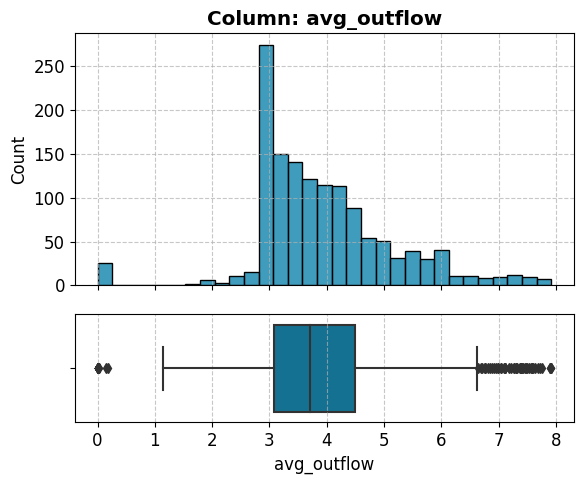

 - NaN's Found: 0 (0.0%)
- Unique Values: 1052
- Most common value: '4.347826086956525e-06' occurs 22 times (1.59%)
- Not constant or quasi-constant.


In [18]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

- Minimum outflow average: 0.000004
- Maximum outflow average: 7.920000
- Mean outflow average: 3.930608
- We have some outliers for Average Outflow on both the low and high ends in this dataset.

####Average Inflow

In [19]:
#Descriptive statistics for Item MRP
df["avg_inflow"].describe()

count    1382.000000
mean        4.506338
std         1.439583
min         2.589000
25%         3.643250
50%         4.161500
75%         4.847750
max        18.968000
Name: avg_inflow, dtype: float64

In [266]:
# Confirming the dtype to select correct EDA function
feature = "avg_inflow"
df[feature].dtype

dtype('float64')

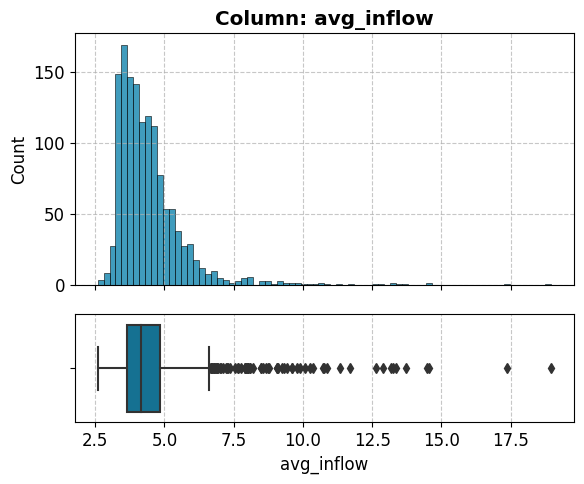

 - NaN's Found: 0 (0.0%)
- Unique Values: 1093
- Most common value: '3.837' occurs 4 times (0.29%)
- Not constant or quasi-constant.


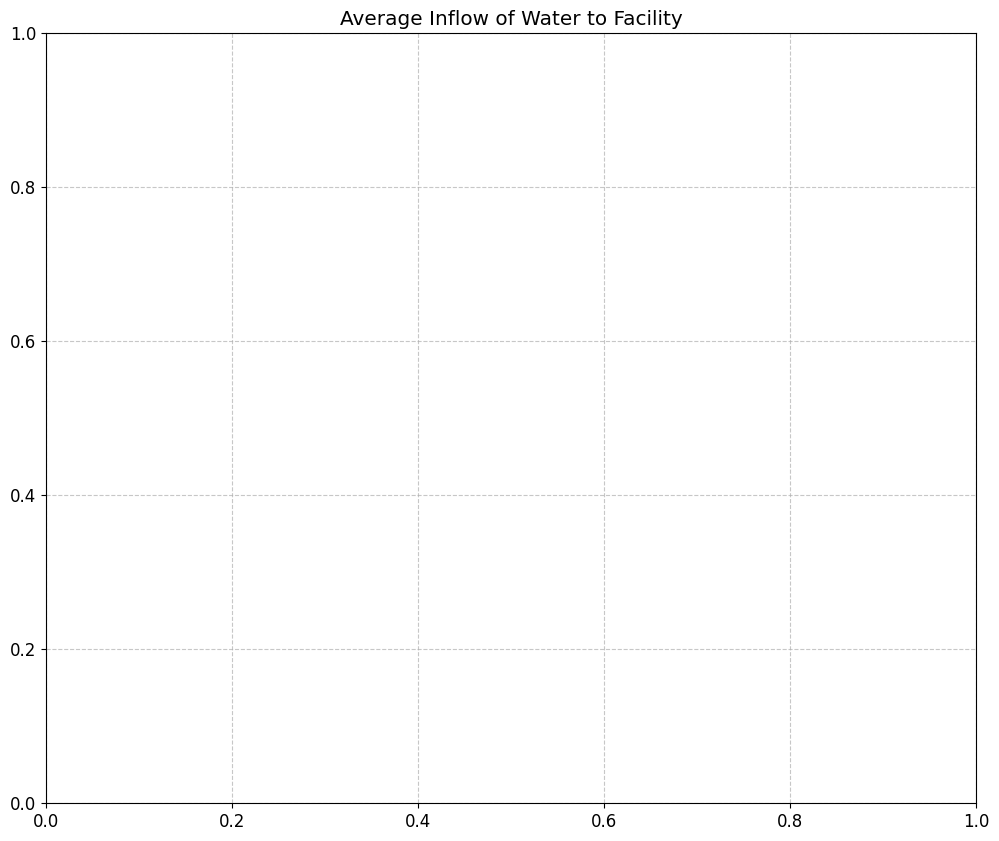

In [267]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

- Minimum inflow average: 2.589
- Maximum inflow average: 18.968
- Mean inflow average: 4.506
- We have many outliers at the high end in this dataset.

####Energy Consumption

In [22]:
#Descriptive statistics for Item MRP
df["total_grid"].describe()

count      1382.000000
mean     275159.089001
std       44640.533689
min      116638.000000
25%      246435.750000
50%      275808.000000
75%      305703.750000
max      398328.000000
Name: total_grid, dtype: float64

In [23]:
# Confirming the dtype to select correct EDA function
feature = "total_grid"
df[feature].dtype

dtype('int64')

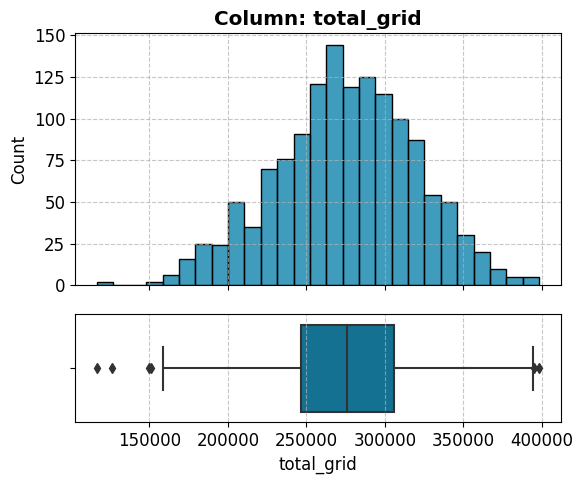

 - NaN's Found: 0 (0.0%)
- Unique Values: 1379
- Most common value: '250282' occurs 2 times (0.14%)
- Not constant or quasi-constant.


In [24]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

####Ammonia

In [25]:
#Descriptive statistics for Item MRP
df["Am"].describe()

count    1382.000000
mean       39.222302
std         7.761598
min        13.000000
25%        34.000000
50%        39.000000
75%        44.000000
max        93.000000
Name: Am, dtype: float64

In [26]:
# Confirming the dtype to select correct EDA function
feature = "Am"
df[feature].dtype

dtype('float64')

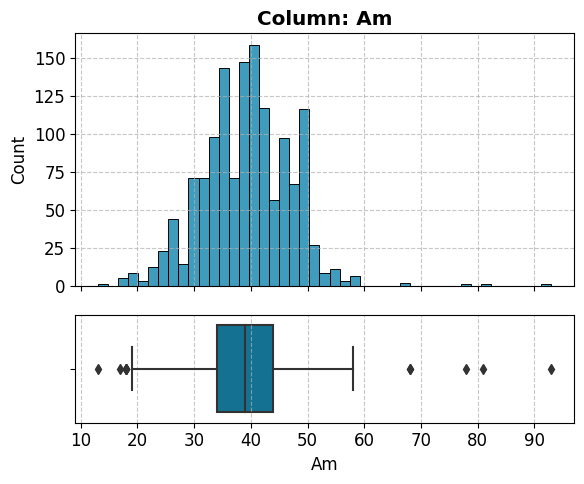

 - NaN's Found: 0 (0.0%)
- Unique Values: 48
- Most common value: '40.0' occurs 90 times (6.51%)
- Not constant or quasi-constant.


In [27]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

####Biological Oxygen Demand

In [28]:
#Descriptive statistics for Item MRP
df["BOD"].describe()

count    1382.000000
mean      382.061708
std        85.996012
min       140.000000
25%       330.000000
50%       360.000000
75%       422.980000
max       850.000000
Name: BOD, dtype: float64

In [29]:
# Confirming the dtype to select correct EDA function
feature = "BOD"
df[feature].dtype

dtype('float64')

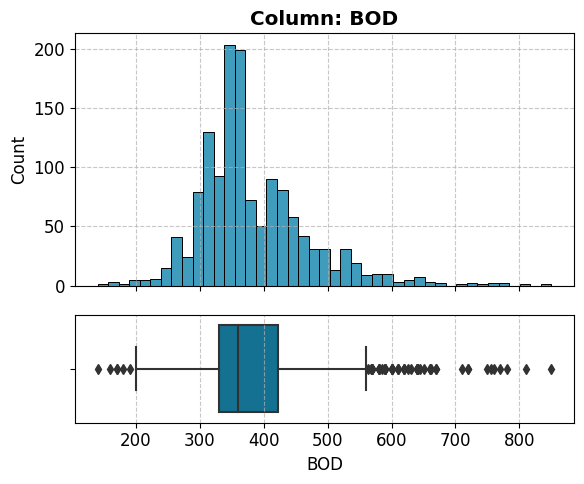

 - NaN's Found: 0 (0.0%)
- Unique Values: 214
- Most common value: '340.0' occurs 97 times (7.02%)
- Not constant or quasi-constant.


In [30]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

####Chemical Oxygen Demand

In [31]:
#Descriptive statistics for Item MRP
df["COD"].describe()

count    1382.000000
mean      845.960434
std       145.416540
min       360.000000
25%       751.250000
50%       845.000000
75%       920.000000
max      1700.000000
Name: COD, dtype: float64

In [32]:
# Confirming the dtype to select correct EDA function
feature = "COD"
df[feature].dtype

dtype('float64')

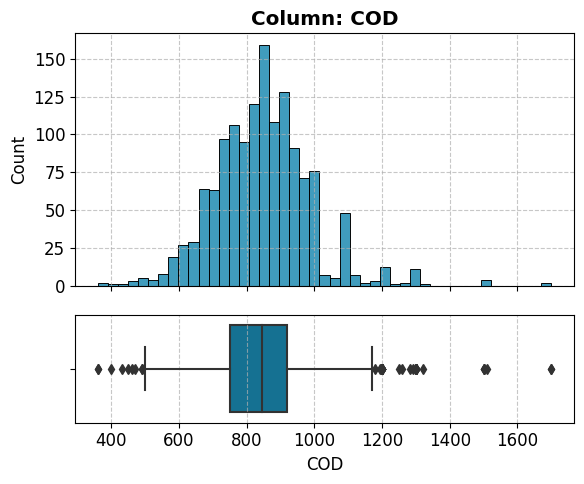

 - NaN's Found: 0 (0.0%)
- Unique Values: 221
- Most common value: '1000.0' occurs 52 times (3.76%)
- Not constant or quasi-constant.


In [33]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

####Total Nitrogen

In [34]:
#Descriptive statistics for Item MRP
df["TN"].describe()

count    1382.000000
mean       62.740752
std         3.571035
min        40.000000
25%        61.396000
50%        62.957500
75%        64.366000
max        92.000000
Name: TN, dtype: float64

In [35]:
# Confirming the dtype to select correct EDA function
feature = "TN"
df[feature].dtype

dtype('float64')

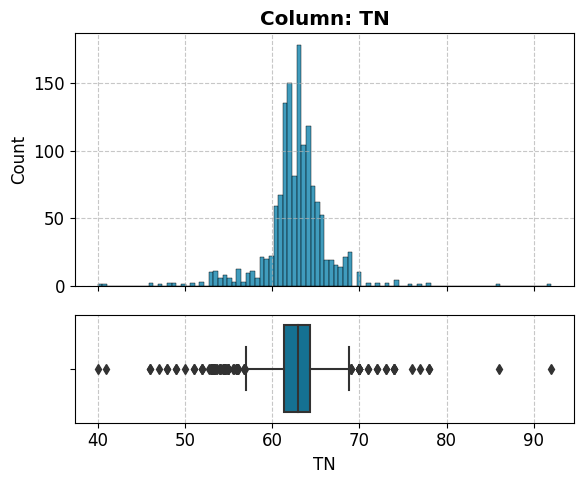

 - NaN's Found: 0 (0.0%)
- Unique Values: 355
- Most common value: '63.312' occurs 36 times (2.6%)
- Not constant or quasi-constant.


In [36]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

####Average Temperature

In [37]:
#Descriptive statistics for Item MRP
df["T"].describe()

count    1382.000000
mean       15.036686
std         5.398491
min         0.000000
25%        10.800000
50%        14.300000
75%        18.575000
max        35.500000
Name: T, dtype: float64

In [38]:
# Confirming the dtype to select correct EDA function
feature = "T"
df[feature].dtype

dtype('float64')

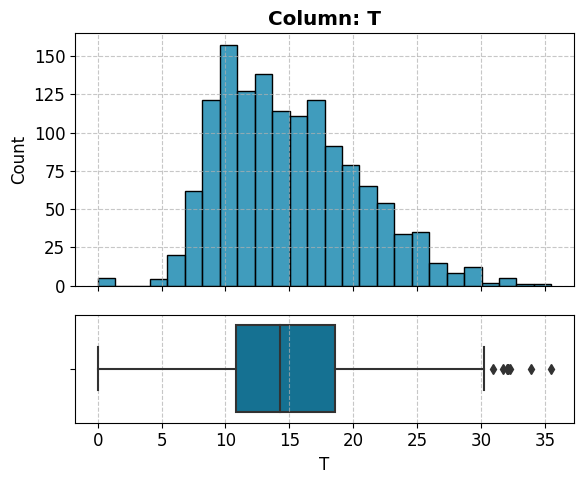

 - NaN's Found: 0 (0.0%)
- Unique Values: 230
- Most common value: '11.3' occurs 20 times (1.45%)
- Not constant or quasi-constant.


In [39]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

Maximum Temperature

In [40]:
#Descriptive statistics for Item MRP
df["TM"].describe()

count    1382.000000
mean       20.530897
std         7.096760
min         0.000000
25%        15.000000
50%        19.200000
75%        25.200000
max        43.500000
Name: TM, dtype: float64

In [41]:
# Confirming the dtype to select correct EDA function
feature = "TM"
df[feature].dtype

dtype('float64')

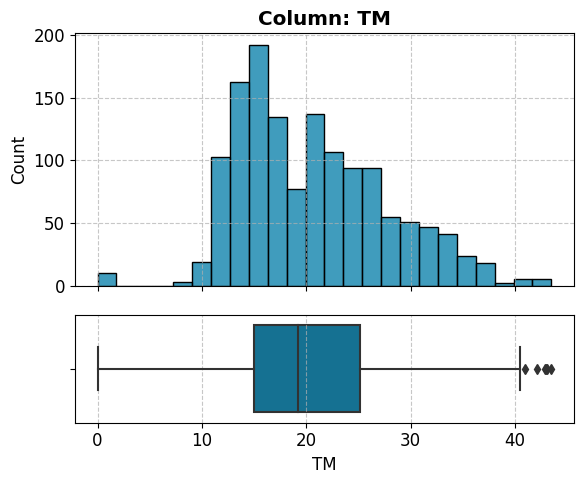

 - NaN's Found: 0 (0.0%)
- Unique Values: 195
- Most common value: '15.0' occurs 76 times (5.5%)
- Not constant or quasi-constant.


In [42]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

####Minimum Temperature

In [43]:
#Descriptive statistics for Item MRP
df["Tm"].describe()

count    1382.000000
mean       10.037337
std         4.656887
min        -2.000000
25%         6.800000
50%         9.600000
75%        13.000000
max        28.500000
Name: Tm, dtype: float64

In [44]:
# Confirming the dtype to select correct EDA function
feature = "Tm"
df[feature].dtype

dtype('float64')

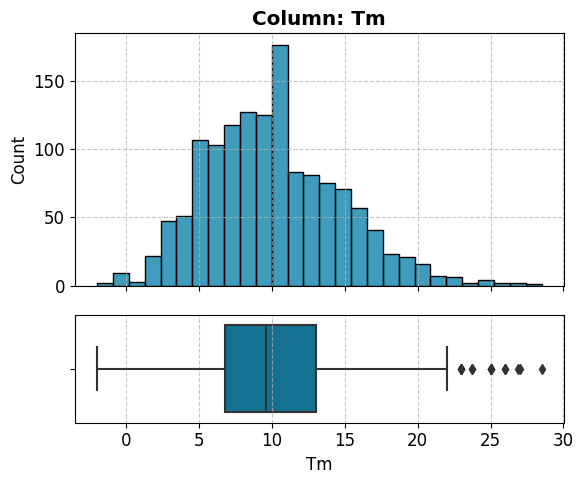

 - NaN's Found: 0 (0.0%)
- Unique Values: 162
- Most common value: '9.0' occurs 82 times (5.93%)
- Not constant or quasi-constant.


In [45]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

####Atmospheric Pressure

In [46]:
#Descriptive statistics for Item MRP
df["SLP"].describe()

count    1382.000000
mean        3.675036
std        61.010416
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1022.000000
Name: SLP, dtype: float64

In [47]:
# Confirming the dtype to select correct EDA function
feature = "SLP"
df[feature].dtype

dtype('float64')

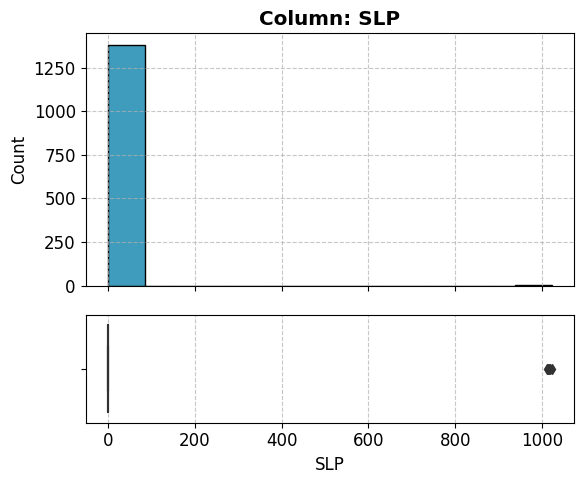

 - NaN's Found: 0 (0.0%)
- Unique Values: 6
- Most common value: '0.0' occurs 1377 times (99.64%)

-[!] Warning: 'SLP' is a constant or quasi-constant feature and should be dropped.


In [48]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

####Humidity

In [49]:
#Descriptive statistics for Item MRP
df["H"].describe()

count    1382.000000
mean       63.558611
std        14.534205
min         0.000000
25%        55.000000
50%        66.000000
75%        74.000000
max        97.000000
Name: H, dtype: float64

In [50]:
# Confirming the dtype to select correct EDA function
feature = "H"
df[feature].dtype

dtype('int64')

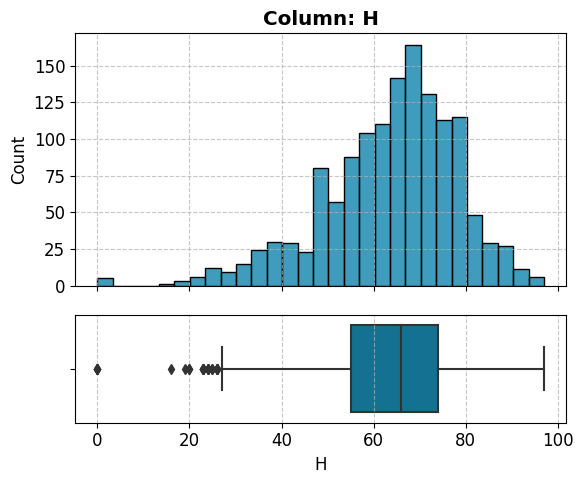

 - NaN's Found: 0 (0.0%)
- Unique Values: 77
- Most common value: '66' occurs 58 times (4.2%)
- Not constant or quasi-constant.


In [51]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

####Precipitation

In [52]:
#Descriptive statistics for Item MRP
df["PP"].describe()

count    1382.000000
mean        0.218090
std         1.306923
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        18.030000
Name: PP, dtype: float64

In [53]:
# Confirming the dtype to select correct EDA function
feature = "PP"
df[feature].dtype

dtype('float64')

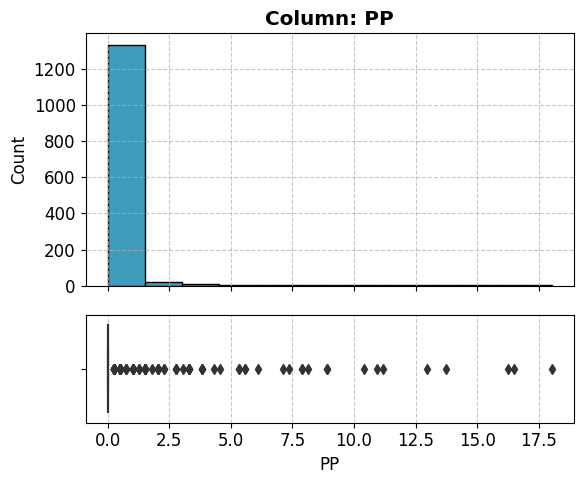

 - NaN's Found: 0 (0.0%)
- Unique Values: 32
- Most common value: '0.0' occurs 1273 times (92.11%)
- Not constant or quasi-constant.


In [54]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

####Total Rainfall

In [55]:
#Descriptive statistics for Item MRP
df["VV"].describe()

count    1382.000000
mean        9.101592
std        16.322905
min         0.000000
25%         8.400000
50%        10.000000
75%        10.000000
max       512.000000
Name: VV, dtype: float64

In [56]:
# Confirming the dtype to select correct EDA function
feature = "VV"
df[feature].dtype

dtype('float64')

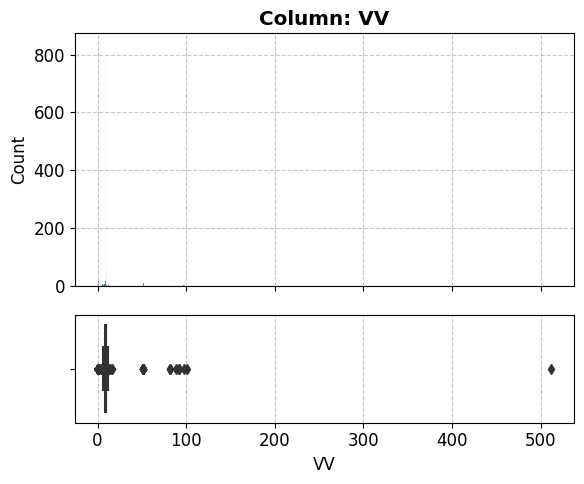

 - NaN's Found: 0 (0.0%)
- Unique Values: 56
- Most common value: '10.0' occurs 756 times (54.7%)
- Not constant or quasi-constant.


In [57]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

Average Visibility

In [58]:
#Descriptive statistics for Item MRP
df["V"].describe()

count    1382.000000
mean       19.482706
std         7.136868
min         0.000000
25%        14.400000
50%        18.100000
75%        23.300000
max        49.100000
Name: V, dtype: float64

In [59]:
# Confirming the dtype to select correct EDA function
feature = "V"
df[feature].dtype

dtype('float64')

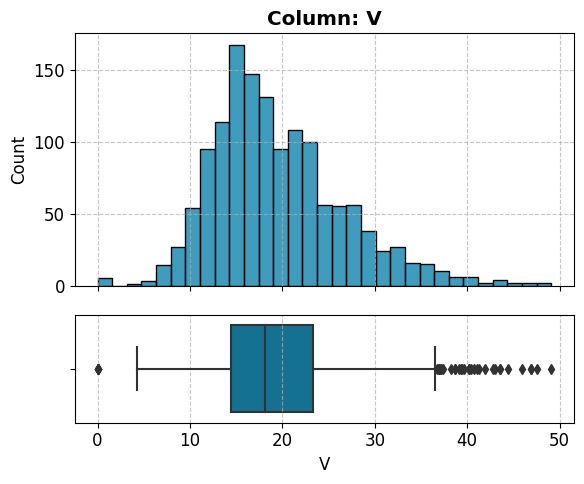

 - NaN's Found: 0 (0.0%)
- Unique Values: 198
- Most common value: '15.4' occurs 24 times (1.74%)
- Not constant or quasi-constant.


In [60]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

Average Wind Speed

In [61]:
#Descriptive statistics for Item MRP
df["VM"].describe()

count    1382.000000
mean       35.381259
std        11.626362
min         0.000000
25%        27.800000
50%        33.500000
75%        42.400000
max        83.500000
Name: VM, dtype: float64

In [62]:
# Confirming the dtype to select correct EDA function
feature = "VM"
df[feature].dtype

dtype('float64')

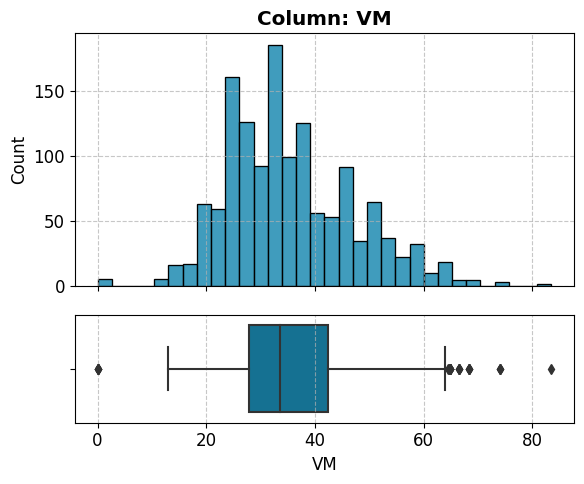

 - NaN's Found: 0 (0.0%)
- Unique Values: 49
- Most common value: '27.8' occurs 122 times (8.83%)
- Not constant or quasi-constant.


In [63]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

Maximum Wind Speed

In [64]:
#Descriptive statistics for Item MRP
df["VG"].describe()

count    1382.000000
mean       29.184009
std        31.366315
min         0.000000
25%         0.000000
50%         0.000000
75%        57.600000
max       107.600000
Name: VG, dtype: float64

In [65]:
# Confirming the dtype to select correct EDA function
feature = "VG"
df[feature].dtype

dtype('float64')

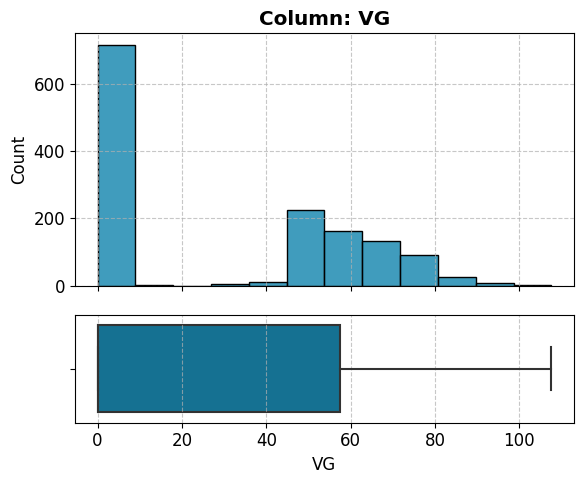

 - NaN's Found: 0 (0.0%)
- Unique Values: 48
- Most common value: '0.0' occurs 716 times (51.81%)
- Not constant or quasi-constant.


In [66]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

Year

In [67]:
#Descriptive statistics for Item MRP
df["year"].describe()

count    1382.000000
mean     2016.258321
std         1.583491
min      2014.000000
25%      2015.000000
50%      2016.000000
75%      2018.000000
max      2019.000000
Name: year, dtype: float64

In [68]:
# Confirming the dtype to select correct EDA function
feature = "year"
df[feature].dtype

dtype('int64')

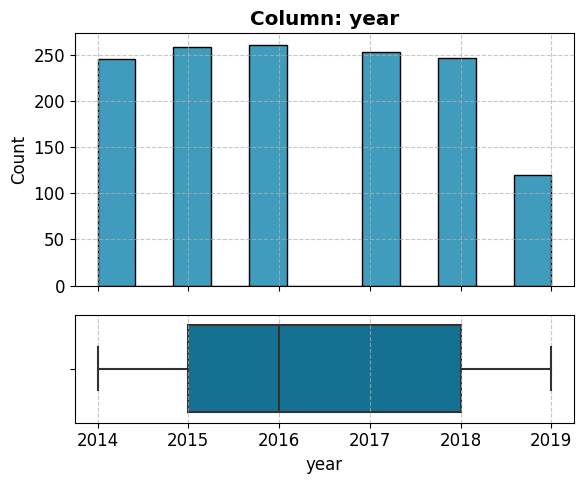

 - NaN's Found: 0 (0.0%)
- Unique Values: 6
- Most common value: '2016' occurs 260 times (18.81%)
- Not constant or quasi-constant.


In [69]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

Month

In [70]:
#Descriptive statistics for Item MRP
df["month"].describe()

count    1382.000000
mean        6.184515
std         3.410588
min         1.000000
25%         3.000000
50%         6.000000
75%         9.000000
max        12.000000
Name: month, dtype: float64

In [71]:
# Confirming the dtype to select correct EDA function
feature = "month"
df[feature].dtype

dtype('int64')

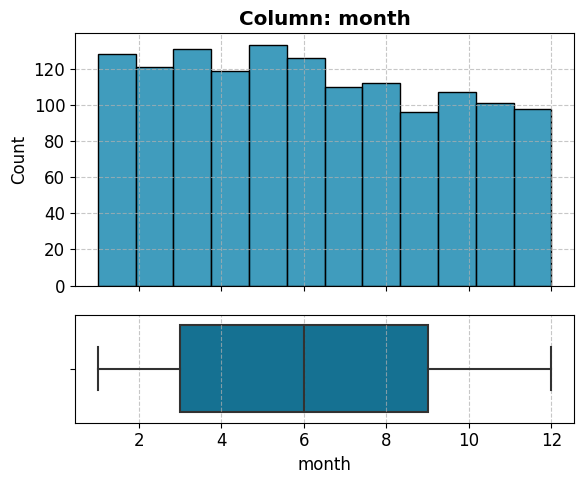

 - NaN's Found: 0 (0.0%)
- Unique Values: 12
- Most common value: '5' occurs 133 times (9.62%)
- Not constant or quasi-constant.


In [72]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

Day

In [73]:
#Descriptive statistics for Item MRP
df["day"].describe()

count    1382.000000
mean       15.584660
std         8.741422
min         1.000000
25%         8.000000
50%        15.000000
75%        23.000000
max        31.000000
Name: day, dtype: float64

In [74]:
# Confirming the dtype to select correct EDA function
feature = "day"
df[feature].dtype

dtype('int64')

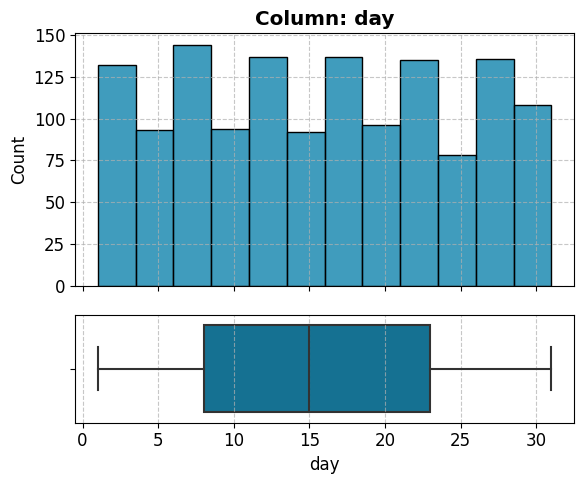

 - NaN's Found: 0 (0.0%)
- Unique Values: 31
- Most common value: '19' occurs 49 times (3.55%)
- Not constant or quasi-constant.


In [75]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

###**Correlation Map**

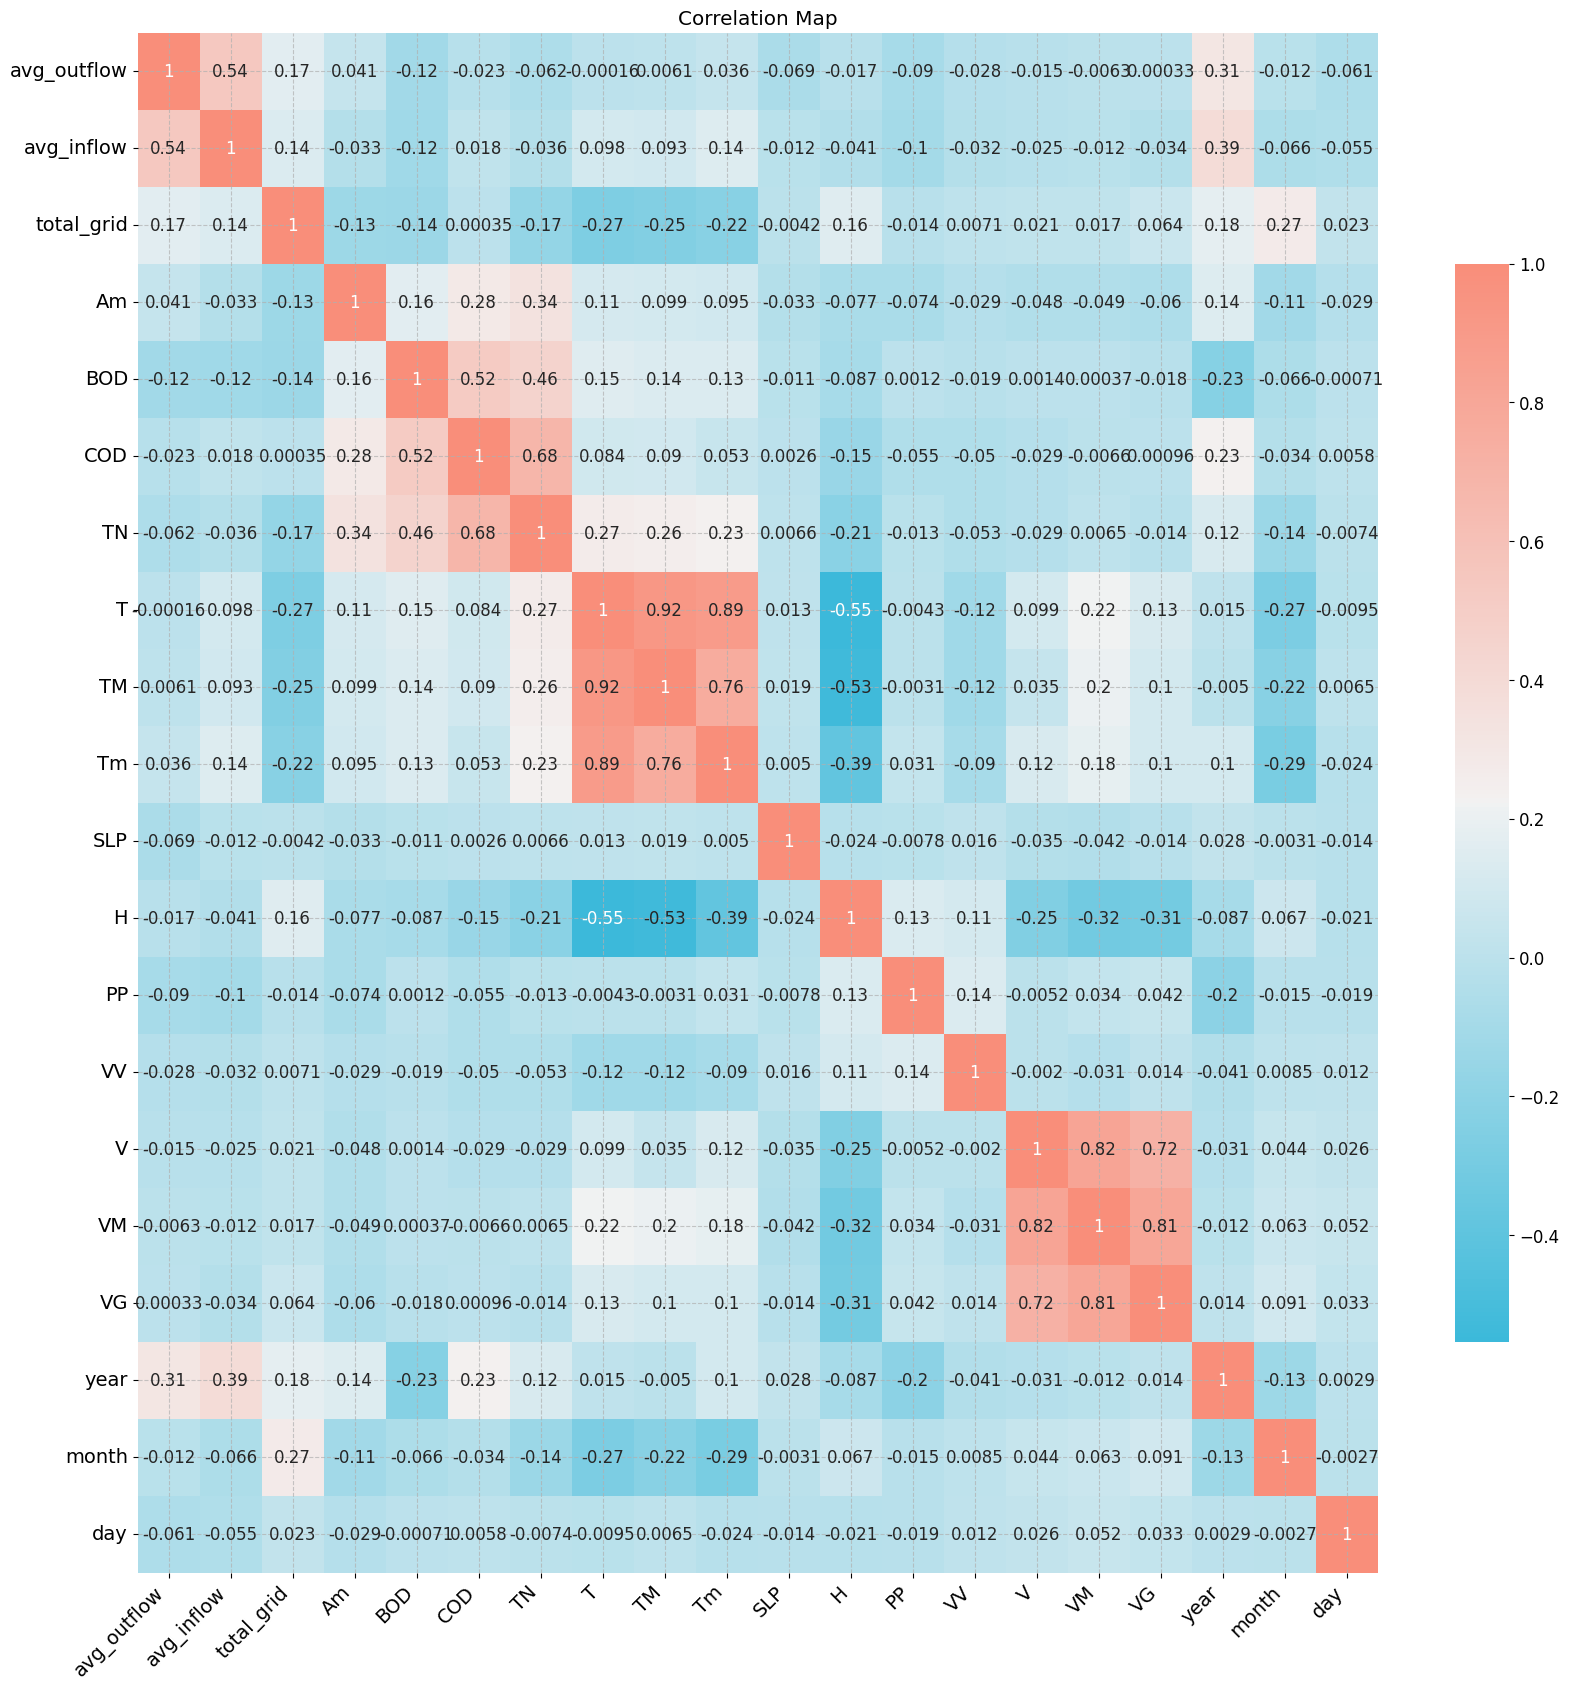

In [76]:
# Create a three-color gradient palette using diverging_palette()
custom_palette = sns.diverging_palette(220, 20, n=7, as_cmap=True, center='light', s=90, l=70, sep=1)

# Generate your dataframe (df) and calculate correlations
# Assuming you have already defined your 'df'

# Viewing heatmap to explore possible correlations
plt.figure(figsize=(20, 20))
ax = sns.heatmap(df.corr(), annot=True, cmap=custom_palette, linewidths=0, cbar_kws={'shrink': 0.7})
# Increase font size for x and y axis labels
ax.set_xticklabels(ax.get_xticklabels(), fontsize=14, rotation=45, ha='right')
ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)
ax.set_title("Correlation Map");

**We can observe from this correlation map that temperature, along with TM and Tm (maximum and minimum temperature), has the most significant negative correlation with the plant's energy consumption. As temperatures decrease, energy consumption rises. The month of the year also appears to be correlated with energy consumption, likely influenced by seasonal average temperatures. We also note weak negative correlations with nitrogen and ammonia content, as well as the required Biological Oxygen Demand of the contaminated water. The strongest positive correlations, albeit weak, with our target variable are associated with year, humidity, average inflow, and average outflow.**

###**Multivariate Figures**

####**Temperature vs. Time**

In [77]:
# Combine the 'Year', 'Month', and 'Date' columns into a single datetime column
df['Date_Time'] = pd.to_datetime(df[['year', 'month', 'day']])

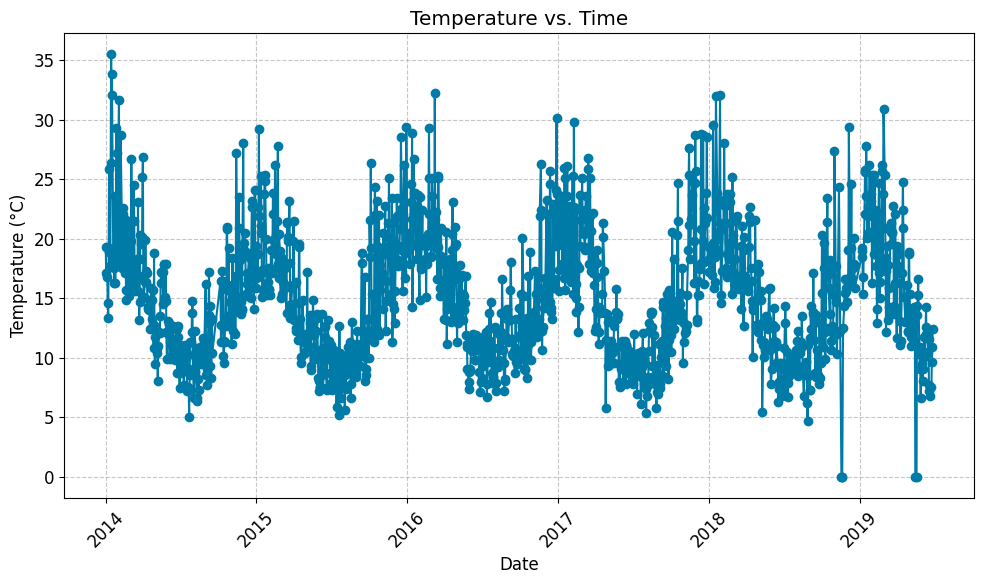

In [78]:
# Create the chart
plt.figure(figsize=(10, 6))
plt.plot(df['Date_Time'], df['T'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Temperature vs. Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the chart
plt.show()

**This figure displays seasonal fluctuations in temperature over the six year data span.  It ranges from 36 degrees celcius on the hottest days, and down to 0 degrees on the coldest days with a general seasonal low a bit higher around 5 degrees.**

####**Energy Consumption vs. Time**

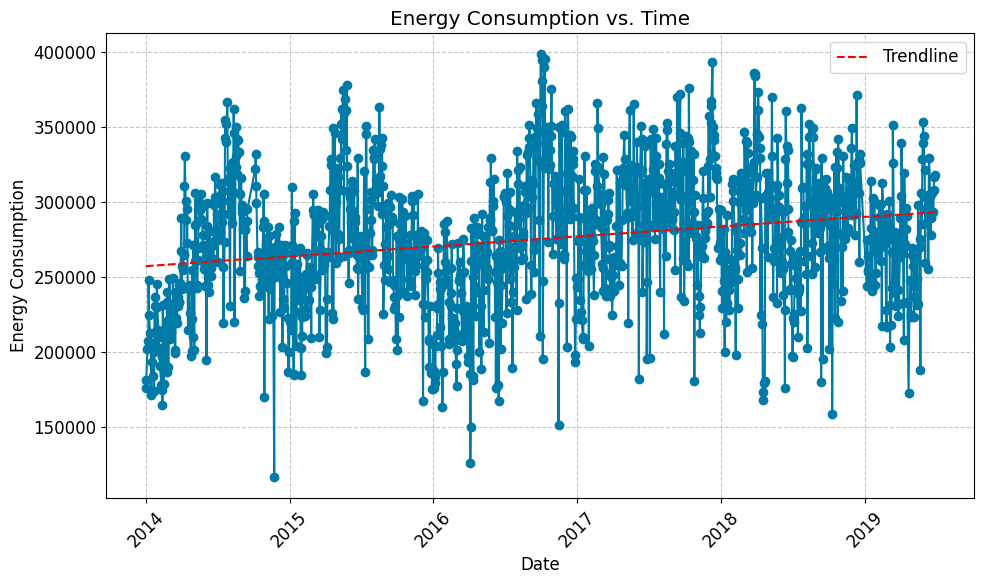

In [79]:
# Create the chart
plt.figure(figsize=(10, 6))
plt.plot(df['Date_Time'], df['total_grid'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.title('Energy Consumption vs. Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Calculate the trendline
x = np.arange(len(df))
coefficients = np.polyfit(x, df['total_grid'], 1)
trendline = np.polyval(coefficients, x)

# Plot the trendline
plt.plot(df['Date_Time'], trendline, color='r', linestyle='--', label='Trendline')
plt.legend()

plt.tight_layout()

# Show the chart
plt.show()




**The figure above clearly depicts the energy consumption pattern for powering the wastewater treatment facility. Notably, there has been a pronounced upward trend in energy demand over time. Moreover, post-2016, the seasonal fluctuations in energy requirements have significantly diminished, indicating a more consistent energy consumption pattern. This further underscores the critical role of energy infrastructure and planning in the operations of the plant**

####**Inflow vs. Time**

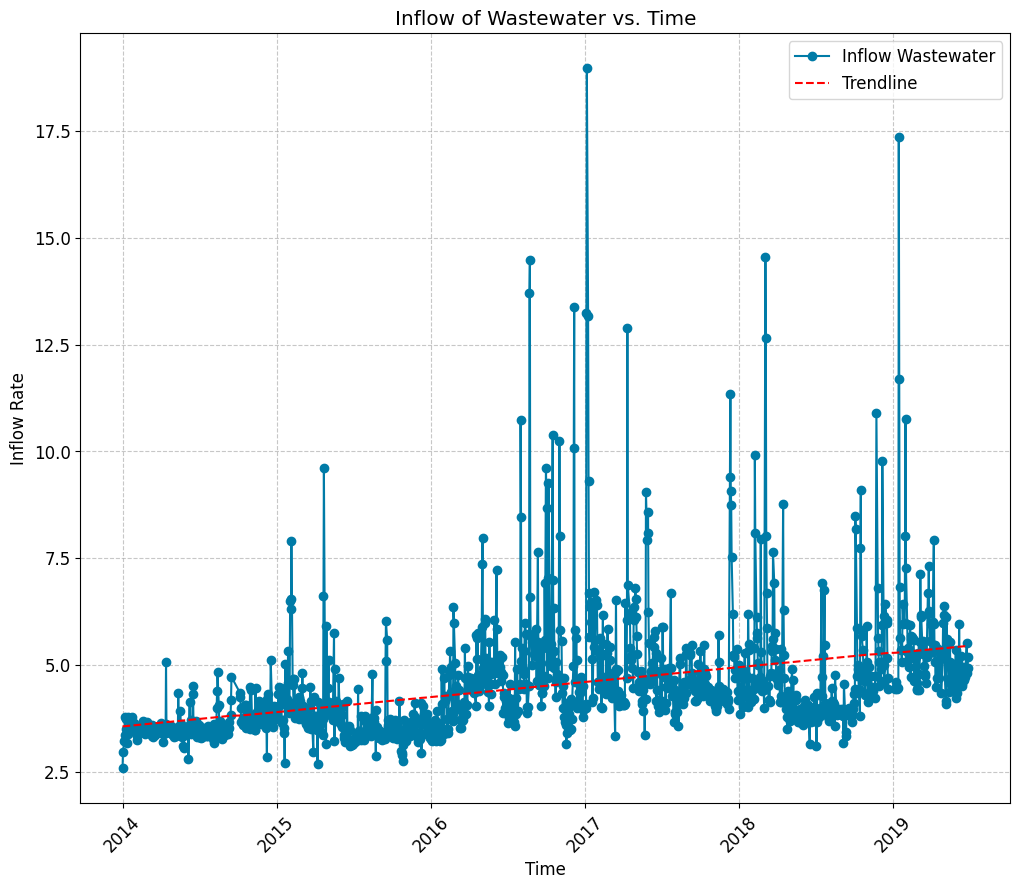

In [80]:
# Inflow Wastewater over time

plt.plot(df['Date_Time'], df['avg_inflow'], label='Inflow Wastewater', marker='o', linestyle='-')

# Calculate the trendline
x = np.arange(len(df))
coefficients = np.polyfit(x, df['avg_inflow'], 1)
trendline = np.polyval(coefficients, x)

# Plot the trendline
plt.plot(df['Date_Time'], trendline, color='r', linestyle='--', label='Trendline')
plt.legend()

plt.xlabel('Time')
plt.ylabel('Inflow Rate')
plt.title('Inflow of Wastewater vs. Time')
plt.xticks(rotation=45);


**Over time, there has been a consistent upward trend in the average inflow to the wastewater plant. The rates have nearly doubled from their levels in 2014 to those observed in 2019. Additionally, there is an observable increase in the occurrence of larger influxes of heightened inflow**

####**Average Energy Consuption by Month paired with Inflow and Outflow**

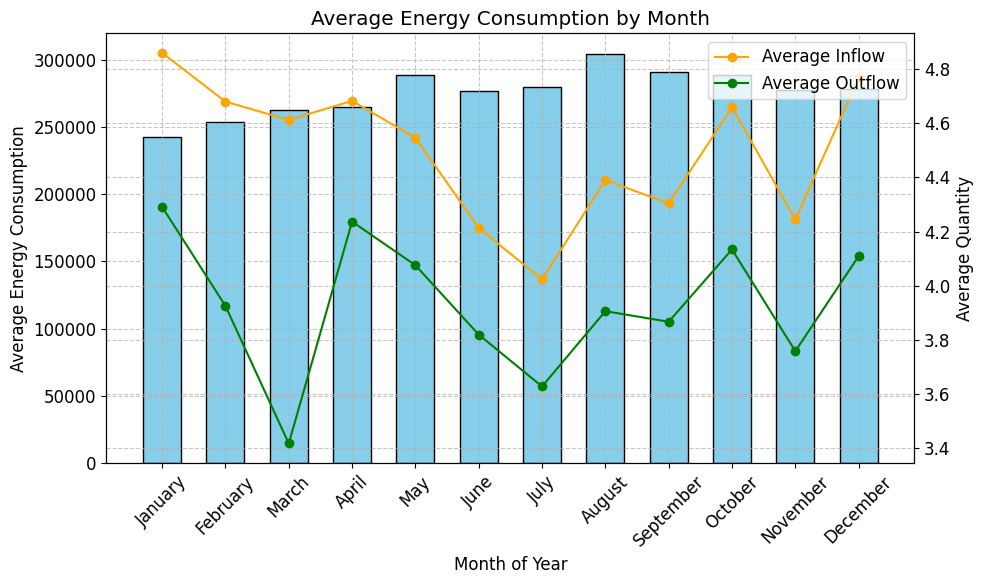

In [81]:
# Group the data by month and calculate the mean outflow for each month
monthly_inflow_data = df.groupby('month')['avg_inflow'].mean()

# Group the data by month and calculate the mean energy consumption for each month
monthly_grid_data = df.groupby('month')['total_grid'].mean()

# Group the data by month and calculate the mean outflow for each month
monthly_outflow_data = df.groupby('month')['avg_outflow'].mean()

# Sort the months in chronological order
sorted_months = monthly_grid_data.index.sort_values()

# Map numeric month values to month names
month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
               7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

# Create the bar plot for total_grid
plt.figure(figsize=(10, 6))
plt.bar(sorted_months.map(month_names), monthly_grid_data[sorted_months], color='skyblue', edgecolor='black', width=0.6)
plt.xlabel('Month of Year')
plt.ylabel('Average Energy Consumption')
plt.title('Average Energy Consumption by Month')
plt.xticks(rotation=45)

# Create a secondary y-axis for inflow and outflow data
ax2 = plt.twinx()
ax2.plot(sorted_months.map(month_names), monthly_inflow_data[sorted_months], marker='o', linestyle='-', color='orange', label='Average Inflow')
ax2.plot(sorted_months.map(month_names), monthly_outflow_data[sorted_months], marker='o', linestyle='-', color='green', label='Average Outflow')
ax2.set_ylabel('Average Quantity')

# Show legend for both plots
plt.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

**Mean Energy consumption is lowest between January and April with the highest monthly average occurring in August.**

**Average energy consumption tends to be less when inflow is higher.**

####**Precipitation vs. Average Inflow by Month**

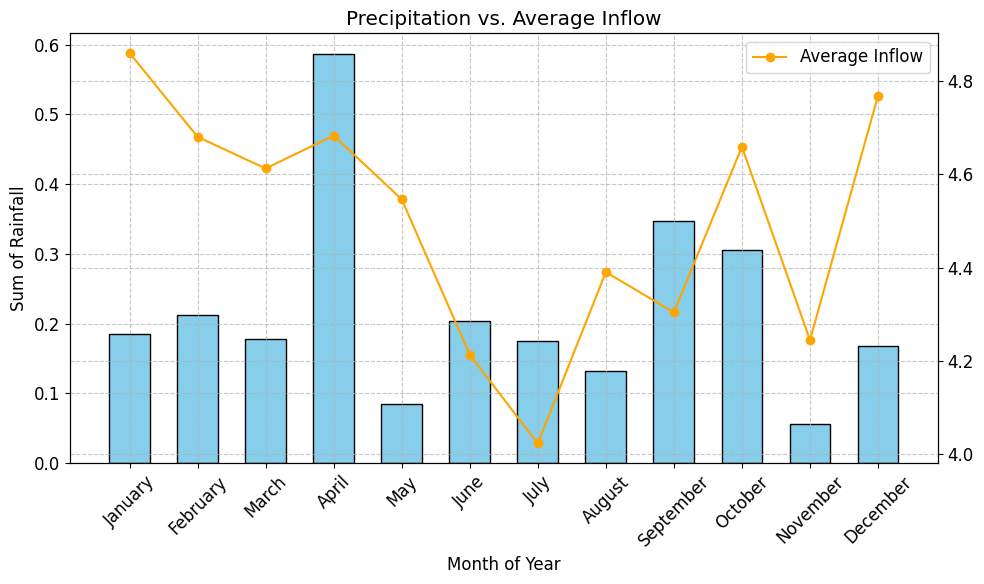

In [82]:
# Group the data by month and calculate the sum of precipitation for each month
monthly_precipitation_data = df.groupby('month')['PP'].mean()

# Group the data by month and calculate the mean outflow for each month
monthly_inflow_data = df.groupby('month')['avg_inflow'].mean()

# Sort the months in chronological order
sorted_months = monthly_grid_data.index.sort_values()

# Map numeric month values to month names
month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
               7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

# Create the bar plot for total_grid
plt.figure(figsize=(10, 6))
plt.bar(sorted_months.map(month_names), monthly_precipitation_data[sorted_months], color='skyblue', edgecolor='black', width=0.6)
plt.xlabel('Month of Year')
plt.ylabel('Sum of Rainfall')
plt.title('Precipitation vs. Average Inflow')
plt.xticks(rotation=45)

# Create a secondary y-axis for inflow and outflow data
ax2 = plt.twinx()
ax2.plot(sorted_months.map(month_names), monthly_inflow_data[sorted_months], marker='o', linestyle='-', color='orange', label='Average Inflow')

# Show legend for both plots
plt.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

**April exhibits the highest amount of rainfall, closely followed by September and October. On the other hand, November and May experience the least amount of precipitation. Notably, increases in inflow are unlikely to be attributed to groundwater runoff resulting from precipitation. To delve deeper into the relationship between inflow and other factors, such as temperature, warrants exploration.**

####**Average Temperature vs. Average Inflow**

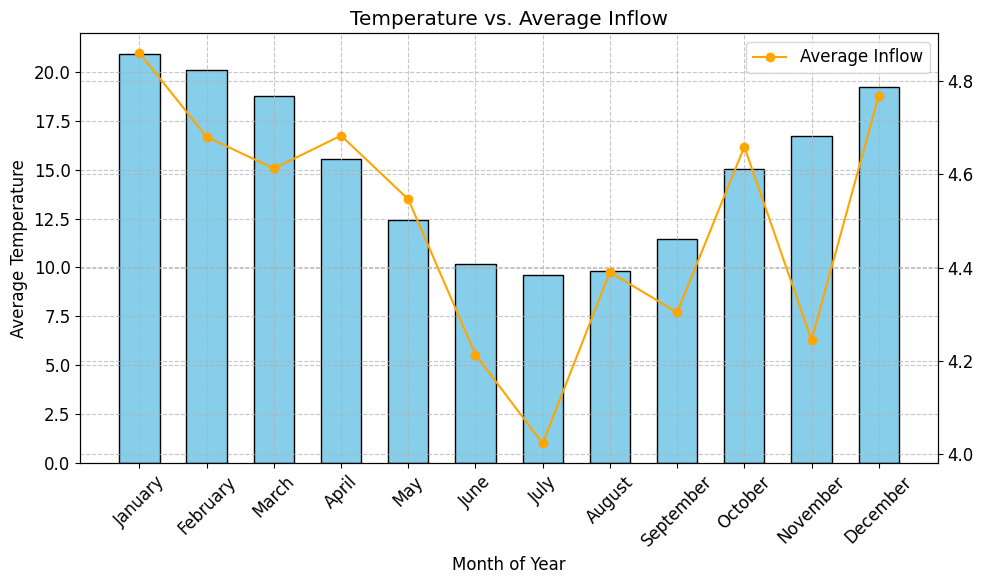

In [83]:
# Group the data by month and calculate the sum of precipitation for each month
monthly_temperature_data = df.groupby('month')['T'].mean()

# Group the data by month and calculate the mean outflow for each month
monthly_inflow_data = df.groupby('month')['avg_inflow'].mean()

# Sort the months in chronological order
sorted_months = monthly_grid_data.index.sort_values()

# Map numeric month values to month names
month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
               7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

# Create the bar plot for total_grid
plt.figure(figsize=(10, 6))
plt.bar(sorted_months.map(month_names), monthly_temperature_data[sorted_months], color='skyblue', edgecolor='black', width=0.6)
plt.xlabel('Month of Year')
plt.ylabel('Average Temperature')
plt.title('Temperature vs. Average Inflow')
plt.xticks(rotation=45)

# Create a secondary y-axis for inflow and outflow data
ax2 = plt.twinx()
ax2.plot(sorted_months.map(month_names), monthly_inflow_data[sorted_months], marker='o', linestyle='-', color='orange', label='Average Inflow')

# Show legend for both plots
plt.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

**Temperature is strongly corelated with monthly inflow averages suggesting that the extra inflow during warmer months of the year may be a result of groundwater runoff caused by non-atmospheric conditions.  Perhaps the result of irrigation of crops or farmland or landscape watering in urban areas.  This may be the cause of dilution of wastewater and thus the reduction of energy expendature at times of increased inflow.**

####**Energy Consumption vs. Average Temperature**

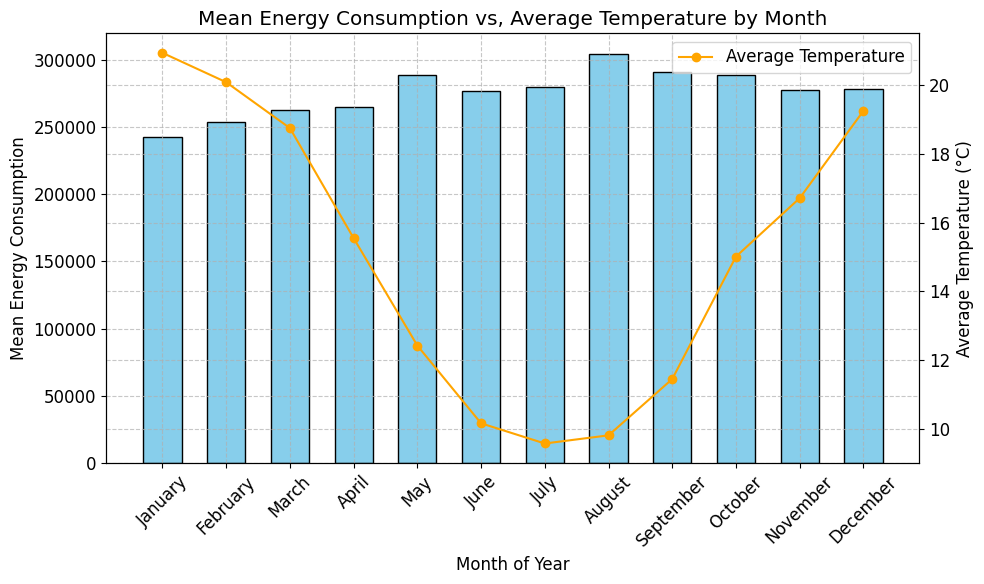

In [84]:
# Group the data by month and calculate the mean energy consumption for each month
monthly_data = df.groupby('month')['total_grid'].mean()

# Group the data by month and calculate the mean temperature for each month
monthly_Temp_data = df.groupby('month')['T'].mean()

# Sort the months in chronological order
sorted_months = monthly_data.index.sort_values()

# Map numeric month values to month names
month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
               7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(sorted_months.map(month_names), monthly_data[sorted_months], color='skyblue', edgecolor='black', width=0.6)
plt.xlabel('Month of Year')
plt.ylabel('Mean Energy Consumption')
plt.title('Mean Energy Consumption vs, Average Temperature by Month')
plt.xticks(rotation=45)

# Create a secondary y-axis for temperature data
ax2 = plt.twinx()
ax2.plot(sorted_months.map(month_names), monthly_Temp_data[sorted_months], marker='o', linestyle='-', color='orange', label='Average Temperature')
ax2.set_ylabel('Average Temperature (°C)')

# Show legend for both plots
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

**Climate and temperature appear to significantly influence the overall energy consumption of the plant. As temperatures rise, there is an observable trend of decreased energy consumption averages. This occurance is likely attributed to the increased availability of biologic components present for waste breakdown when temperatures are elevated.**  

####**Energy Consumption vs. Nitrogen and Ammonia Concentrations**

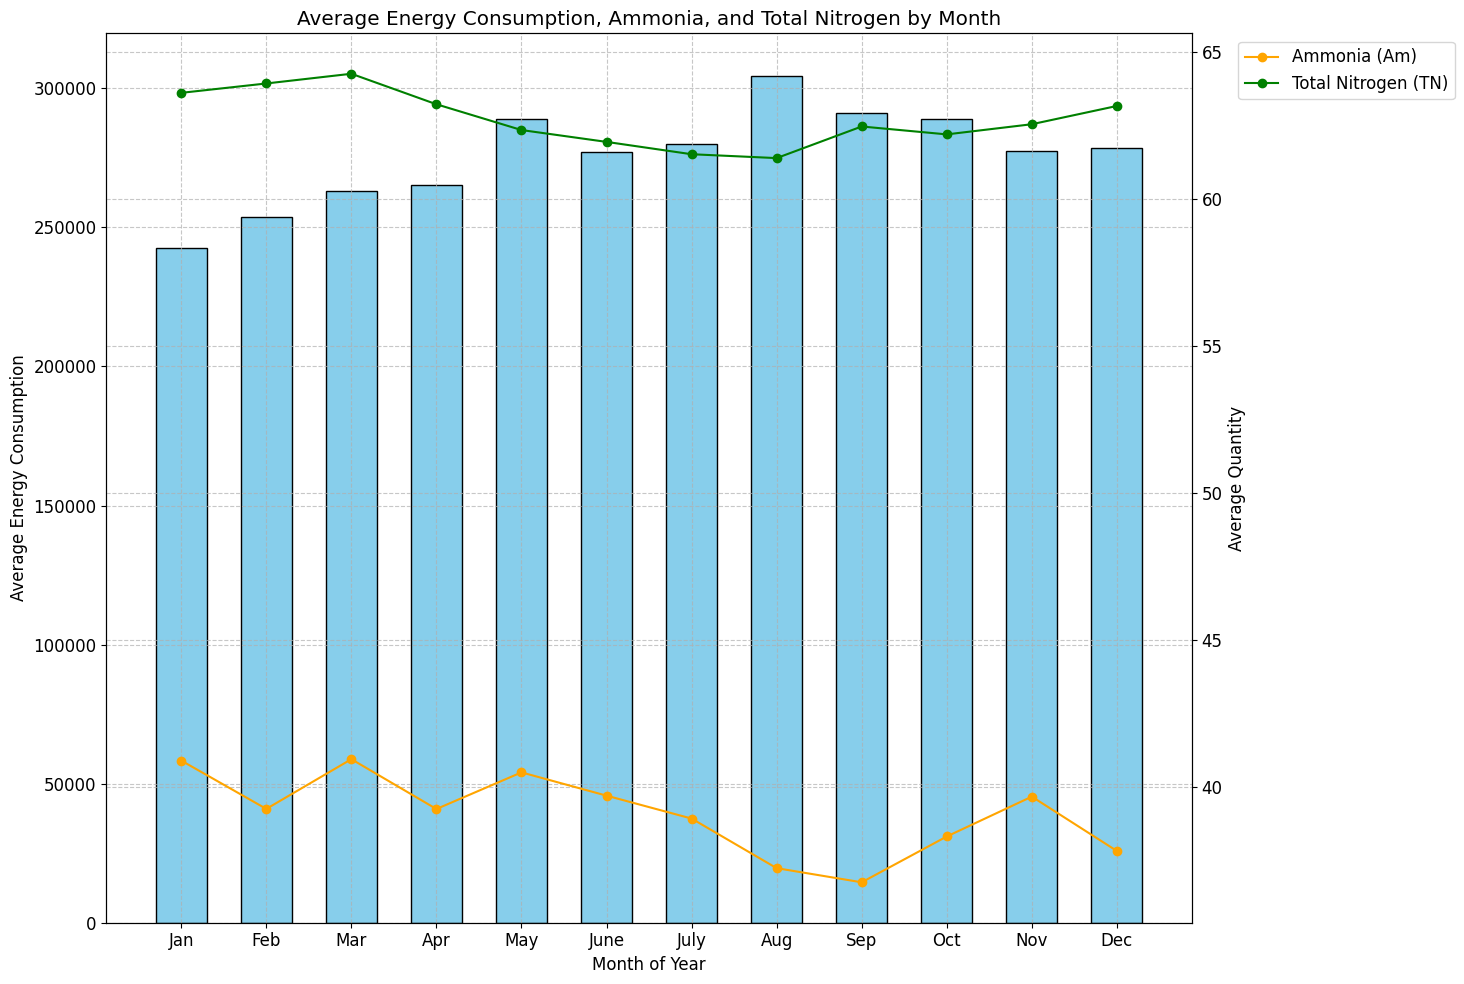

In [85]:
# Group the data by month and calculate the mean values for ammonia (Am) and total nitrogen (TN)
monthly_Am_data = df.groupby('month')['Am'].mean()
monthly_TN_data = df.groupby('month')['TN'].mean()

# Sort the months in chronological order
sorted_months = monthly_grid_data.index.sort_values()

# Map numeric month values to month names
month_names = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'June',
               7: 'July', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

# Create the figure
plt.figure(figsize=(15, 10))

# Plot mean energy consumption (total_grid) as a bar plot
plt.bar(sorted_months.map(month_names), monthly_grid_data[sorted_months], color='skyblue', edgecolor='black', width=0.6, label='Average Energy Consumption')
plt.xlabel('Month of Year')
plt.ylabel('Average Energy Consumption')
plt.title('Average Energy Consumption, Ammonia, and Total Nitrogen by Month')

# Create a secondary y-axis for the line plots of ammonia (Am) and total nitrogen (TN)
ax2 = plt.twinx()
line1, = ax2.plot(sorted_months.map(month_names), monthly_Am_data[sorted_months], marker='o', linestyle='-', color='orange', label='Ammonia (Am)')
line2, = ax2.plot(sorted_months.map(month_names), monthly_TN_data[sorted_months], marker='o', linestyle='-', color='green', label='Total Nitrogen (TN)')
ax2.set_ylabel('Average Quantity')

# Combine legend handles and labels from both plots into a single legend
lines = [line1, line2]
labels = [line.get_label() for line in lines]
plt.legend(lines, labels, loc='upper right', bbox_to_anchor=(1.25, 1))

plt.tight_layout()
plt.show()

**This figure displays the weak negative relationship of Total Nitrogen and Ammonia with the energy consumption of the wastewater plant.  Generally, energy consumption is lowest when mean nitrogen and ammonia levels are higher.**

####**Energy Consumption vs. Biological and Chemical Oxygen Demand**

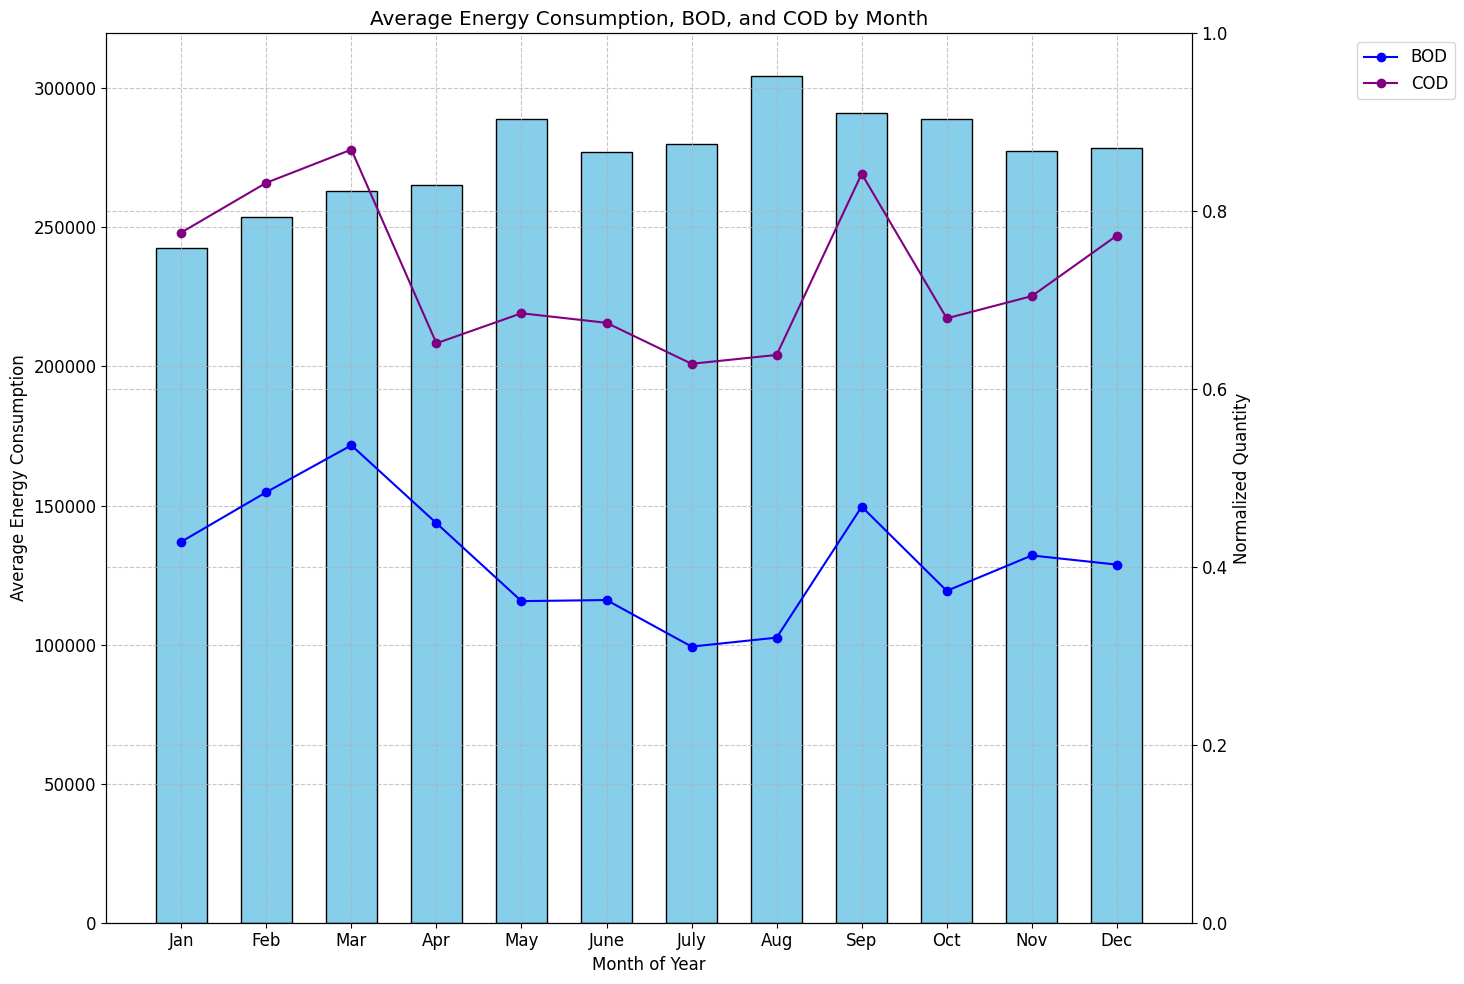

In [86]:
# Group the data by month and calculate the mean values for BOD and COD
monthly_BOD_data = df.groupby('month')['BOD'].mean()
monthly_COD_data = df.groupby('month')['COD'].mean()

# Sort the months in chronological order
sorted_months = monthly_grid_data.index.sort_values()

# Map numeric month values to month names
month_names = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'June',
               7: 'July', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

# Normalize BOD and COD data to a common scale (e.g., 0-1)
normalized_BOD_data = (monthly_BOD_data - 300) / (500 - 300)
normalized_COD_data = (monthly_COD_data - 700) / (900 - 700)

# Create the figure
plt.figure(figsize=(15, 10))

# Plot mean energy consumption (total_grid) as a bar plot
plt.bar(sorted_months.map(month_names), monthly_grid_data[sorted_months], color='skyblue', edgecolor='black', width=0.6, label='Average Energy Consumption')
plt.xlabel('Month of Year')
plt.ylabel('Average Energy Consumption')
plt.title('Average Energy Consumption, BOD, and COD by Month')

# Create a secondary y-axis for the line plots of BOD and COD
ax2 = plt.twinx()
line1, = ax2.plot(sorted_months.map(month_names), normalized_BOD_data[sorted_months], marker='o', linestyle='-', color='blue', label='BOD')
line2, = ax2.plot(sorted_months.map(month_names), normalized_COD_data[sorted_months], marker='o', linestyle='-', color='purple', label='COD')
ax2.set_ylabel('Normalized Quantity')

# Set the y-axis limits for COD and BOD
# Set the y-axis limits for normalized data (0 to 1)
ax2.set_ylim(0, 1)

# Combine legend handles and labels from both plots into a single legend
lines = [line1, line2]
labels = [line.get_label() for line in lines]
plt.legend(lines, labels, loc='upper right', bbox_to_anchor=(1.25, 1))

plt.tight_layout()
plt.show()

**Biological and Chemical Oxygen Demand are highly correlated with each outher and both present a negative relationship with energy use.**  

####**Comparative Energy Consumpion by Month**

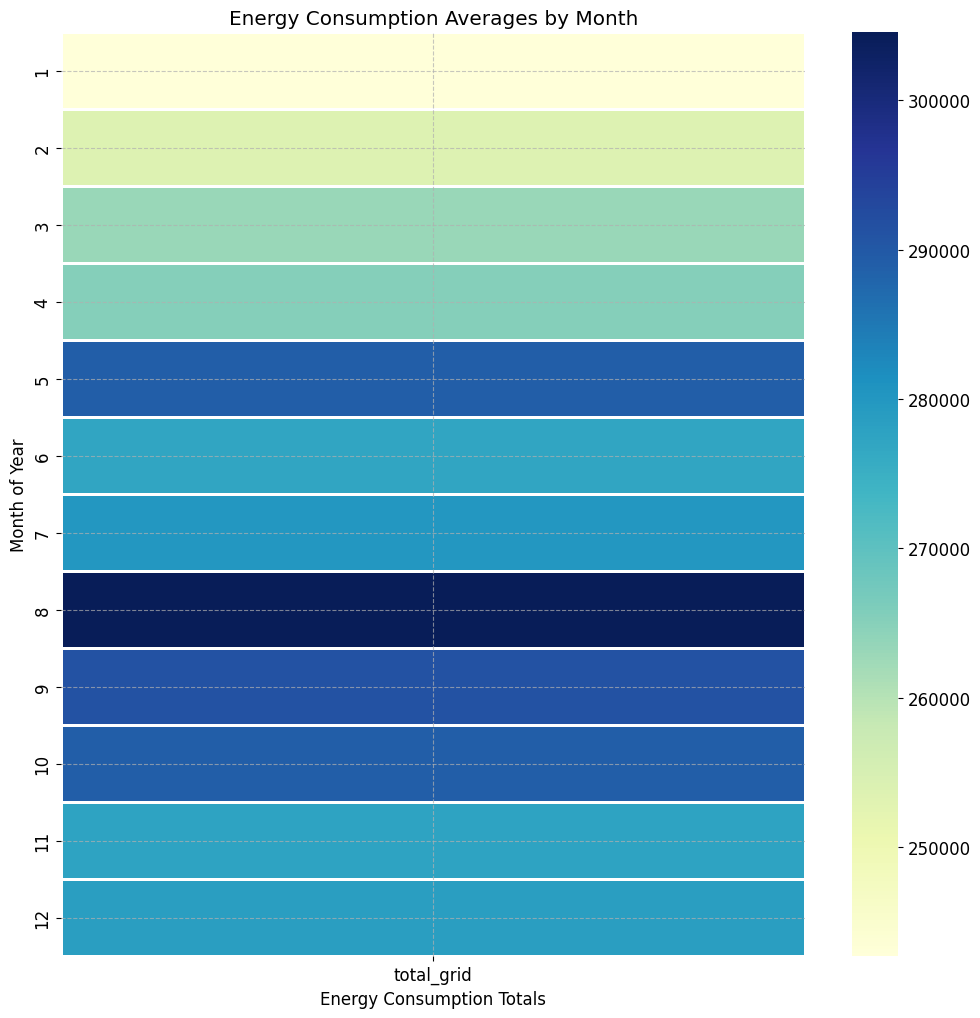

In [87]:
# Group the data by month and calculate the sum of energy consumption for each month
monthly_data = df.groupby('month')['total_grid'].mean()

# Reshape the data for the heatmap using pivot_table
pivot_table = monthly_data.reset_index().pivot_table(values='total_grid', index='month', columns=None)

# Create the heatmap using Seaborn
plt.figure(figsize=(12, 12))
sns.heatmap(pivot_table, cmap='YlGnBu', linewidths=1, annot=False, fmt='.0f')
plt.xlabel('Energy Consumption Totals')
plt.ylabel('Month of Year')
plt.title('Energy Consumption Averages by Month')
plt.show();

**The above is heatmap displaying the average total energy consumption by month for all years within our dataset.  Months requiring the least energy to operate are from January to March, and the highest operating months are August, September and October.**

####**Comparative Temperature Averages by Month**



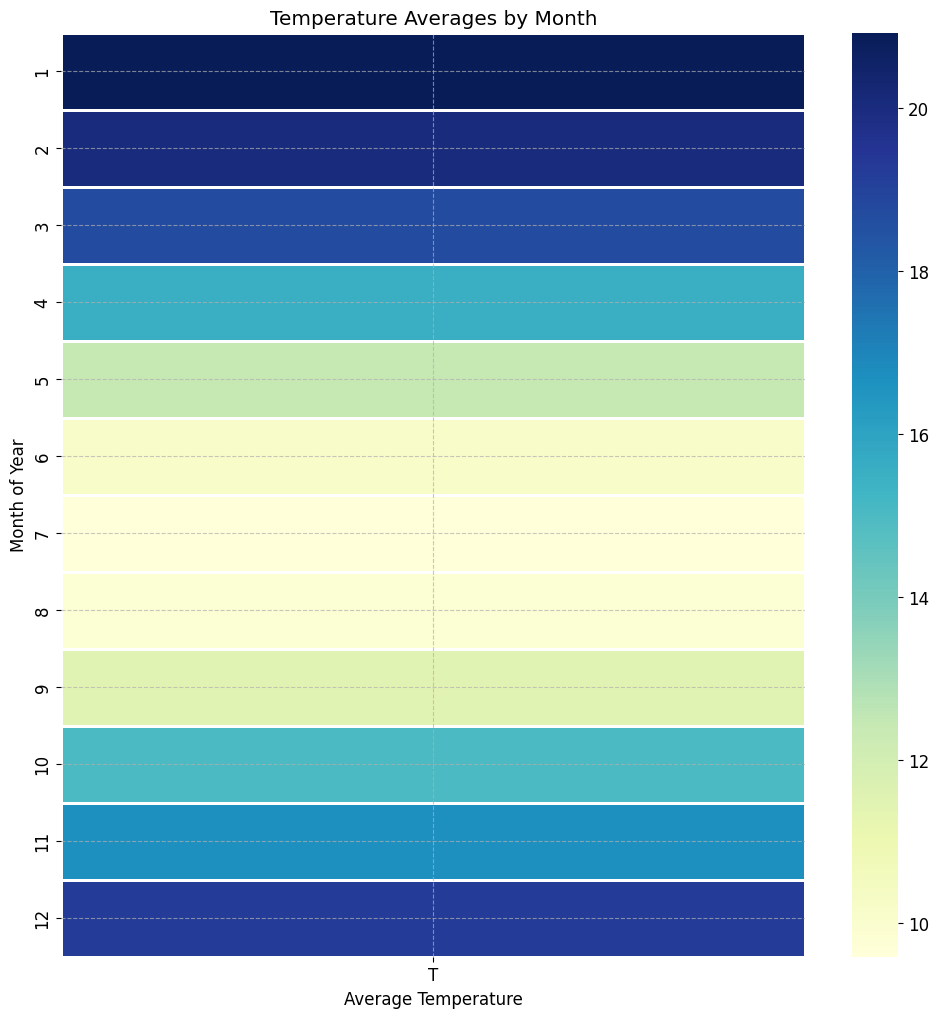

In [88]:
# Group the data by month and calculate the sum of energy consumption for each month
monthly_data = df.groupby('month')['T'].mean()

# Reshape the data for the heatmap using pivot_table
pivot_table = monthly_data.reset_index().pivot_table(values='T', index='month', columns=None)

# Create the heatmap using Seaborn
plt.figure(figsize=(12, 12))
sns.heatmap(pivot_table, cmap='YlGnBu', linewidths=1, annot=False, fmt='.0f')
plt.xlabel('Average Temperature')
plt.ylabel('Month of Year')
plt.title('Temperature Averages by Month')
plt.show();

**We can clearly see in this figure the seasonal fluctuation of temperature for the Melbourne area.  The coolest months are between April and September and the hottest month is January.**

####**Inflow vs. Outflowm Trendline**

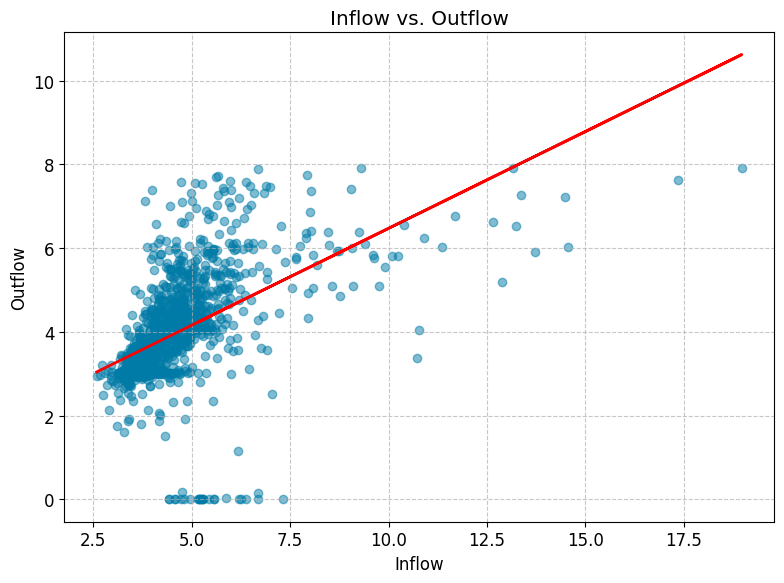

In [89]:
# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['avg_inflow'], df['avg_outflow'], marker='o', alpha=0.5)
plt.xlabel('Inflow')
plt.ylabel('Outflow')
plt.title('Inflow vs. Outflow')
plt.grid(True)

# Fit a linear regression line to the data
fit = np.polyfit(df['avg_inflow'], df['avg_outflow'], deg=1)
regression_line = np.poly1d(fit)
plt.plot(df['avg_inflow'], regression_line(df['avg_inflow']), color='red', linewidth=2)

plt.tight_layout()
plt.show()

**Average inflow and average outflow are strongly coorelated as we would expect.  More water in means more water out.**

####**Nitrogen vs. Energy Consumption Trendline**

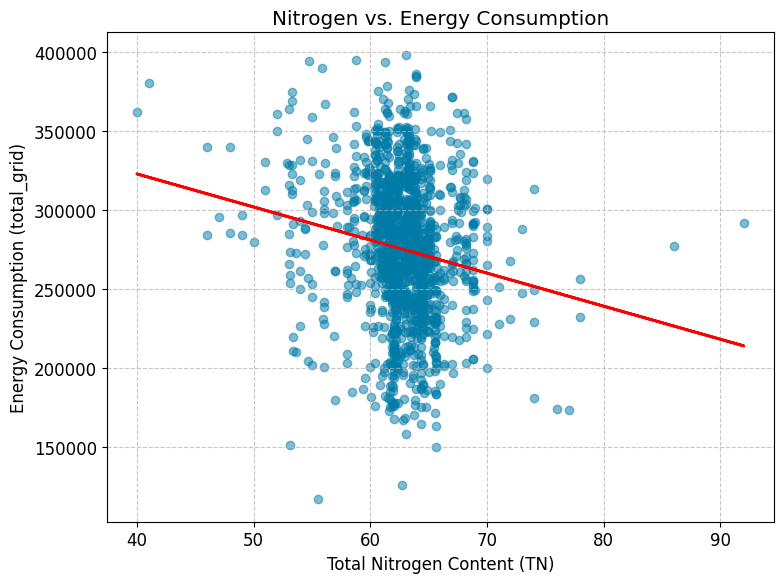

In [90]:
# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['TN'], df['total_grid'], marker='o', alpha=0.5)
plt.xlabel('Total Nitrogen Content (TN)')
plt.ylabel('Energy Consumption (total_grid)')
plt.title('Nitrogen vs. Energy Consumption')
plt.grid(True)

# Fit a linear regression line to the data
fit = np.polyfit(df['TN'], df['total_grid'], deg=1)
regression_line = np.poly1d(fit)
plt.plot(df['TN'], regression_line(df['TN']), color='red', linewidth=2)

plt.tight_layout()
plt.show()

**As the levels of total nitrogen increase, there is a corresponding reduction in the treatment facility's reliance on the energy grid.**

####**Chemical Oxygen Demandn vs. Energy Consumption Trendline**

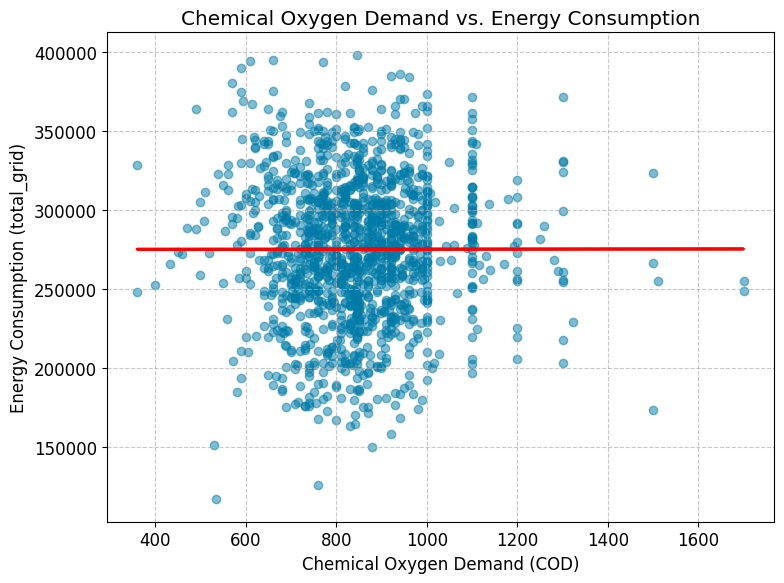

In [91]:
# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['COD'], df['total_grid'], marker='o', alpha=0.5)
plt.xlabel('Chemical Oxygen Demand (COD)')
plt.ylabel('Energy Consumption (total_grid)')
plt.title('Chemical Oxygen Demand vs. Energy Consumption')
plt.grid(True)

# Fit a linear regression line to the data
fit = np.polyfit(df['COD'], df['total_grid'], deg=1)
regression_line = np.poly1d(fit)
plt.plot(df['COD'], regression_line(df['COD']), color='red', linewidth=2)

plt.tight_layout()
plt.show()

**Unexpectedly, there does not appear to be either a positive or negative relationship between Chemical Oxygen Demand and energy use.**  

####**Biological Oxygen Demand vs. Energy Consumption Trendline**

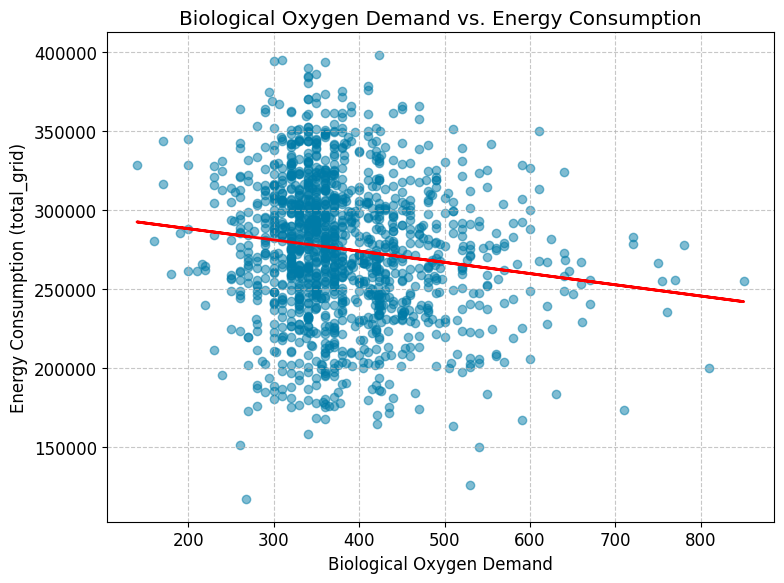

In [92]:
# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['BOD'], df['total_grid'], marker='o', alpha=0.5)
plt.xlabel("Biological Oxygen Demand")
plt.ylabel('Energy Consumption (total_grid)')
plt.title('Biological Oxygen Demand vs. Energy Consumption')
plt.grid(True)

# Fit a linear regression line to the data
fit = np.polyfit(df['BOD'], df['total_grid'], deg=1)
regression_line = np.poly1d(fit)
plt.plot(df['BOD'], regression_line(df['BOD']), color='red', linewidth=2)

plt.tight_layout()
plt.show()

**There is a nNegative corelation between Biological Oxygen Demand and energy consumption.**

####**Temperature vs. Energy Consumption Trendline**

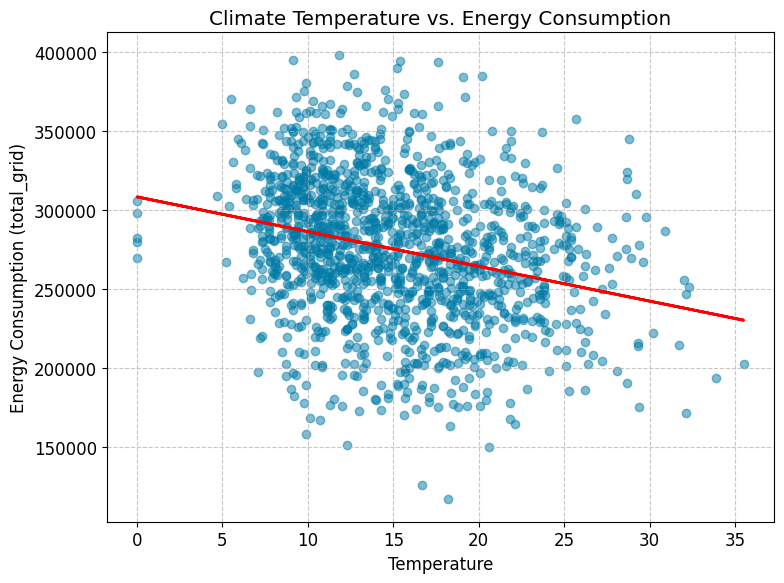

In [93]:
# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['T'], df['total_grid'], marker='o', alpha=0.5)
plt.xlabel('Temperature')
plt.ylabel('Energy Consumption (total_grid)')
plt.title('Climate Temperature vs. Energy Consumption')
plt.grid(True)

# Fit a linear regression line to the data
fit = np.polyfit(df['T'], df['total_grid'], deg=1)
regression_line = np.poly1d(fit)
plt.plot(df['T'], regression_line(df['T']), color='red', linewidth=2)

plt.tight_layout()
plt.show()

**There is a negative corelation between atmospheric temperature and energy consumption.**

####**Humidity vs. Energy Consumption Trendline**

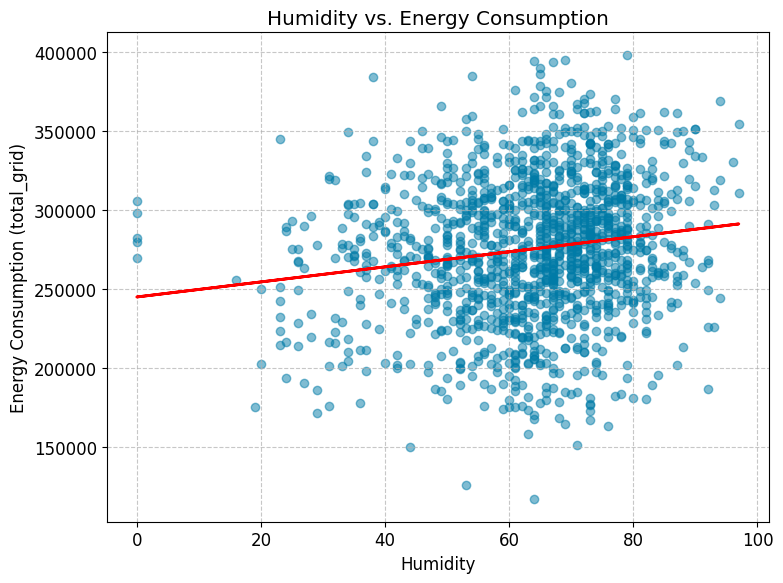

In [94]:
# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['H'], df['total_grid'], marker='o', alpha=0.5)
plt.xlabel('Humidity')
plt.ylabel('Energy Consumption (total_grid)')
plt.title('Humidity vs. Energy Consumption')
plt.grid(True)

# Fit a linear regression line to the data
fit = np.polyfit(df['H'], df['total_grid'], deg=1)
regression_line = np.poly1d(fit)
plt.plot(df['H'], regression_line(df['H']), color='red', linewidth=2)

plt.tight_layout()
plt.show()

**There is a weak positive coorelation between Humidity and energy use.**

####**Windspeed vs. Energy Consumption Trendline**

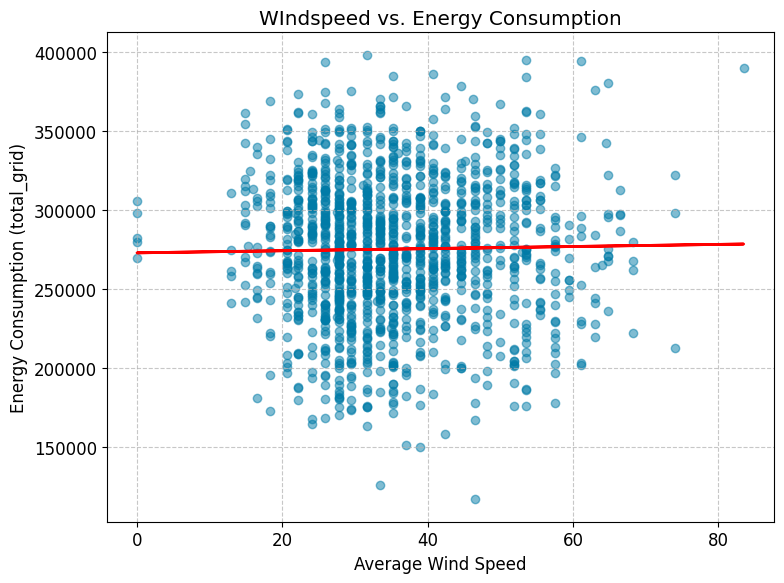

In [95]:
# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['VM'], df['total_grid'], marker='o', alpha=0.5)
plt.xlabel('Average Wind Speed')
plt.ylabel('Energy Consumption (total_grid)')
plt.title('WIndspeed vs. Energy Consumption')
plt.grid(True)

# Fit a linear regression line to the data
fit = np.polyfit(df['VM'], df['total_grid'], deg=1)
regression_line = np.poly1d(fit)
plt.plot(df['VM'], regression_line(df['VM']), color='red', linewidth=2)

plt.tight_layout()
plt.show()

**This plot shows no correlation between Windspeed and Energy Consumption.**

#**Modeling**

##**Preprocessing**

To prepare the data for modeling, we will take the following steps:

- Remove columns that are constant or quasi-constant, such as Atmospheric Pressure (SLP).
- Drop "Maximun Wind Gust" column to reduce noise as we are more interested the the average wind speed data.
- Exclude the "day" column to concentrate on broader trends within the data.
- Combine the "Month" and "Year" columns into a single datetime column, allowing for modeling of long-term trends.
- Since there are no missing values, there is no need for imputation.
- Scale the numeric columns.
- There are no ordinal or nominal columns requiring processing through the pipeline.


In [96]:
# View copy of dataframe
df2

avg_outflow  avg_inflow  total_grid    Am    BOD     COD      TN     T  \
0           2.941       2.589      175856  27.0  365.0   730.0  60.378  19.3   
1           2.936       2.961      181624  25.0  370.0   740.0  60.026  17.1   
2           2.928       3.225      202016  42.0  418.0   836.0  64.522  16.8   
3           2.928       3.354      207547  36.0  430.0   850.0  63.000  14.6   
4           2.917       3.794      202824  46.0  508.0  1016.0  65.590  13.4   
...           ...         ...         ...   ...    ...     ...     ...   ...   
1377        5.068       4.716      305938  28.0  310.0   660.0  58.807   6.8   
1378        5.882       5.510      293446  40.0  250.0   700.0  60.671   7.6   
1379        4.638       4.811      307968  47.0  260.0   860.0  64.000   9.7   
1380        5.373       4.929      316675  46.0  300.0   900.0  62.479  10.9   
1381        4.072       5.194      318268  31.0  270.0   910.0  63.312  12.4   

        TM    Tm  SLP   H    PP    VV     V    VM    VG  year  month  day  
0     25.1  12.6  0.0  56  1.52  10.0  26.9  53.5  79.5  2014      1    1  
1     23.6  12.3  0.0  63  0.00  10.0  14.4  27.8   0.0  2014      1    2  
2     27.2   8.8  0.0  47  0.25  10.0  31.9  61.1  77.8  2014      1    5  
3     19.9  11.1  0.0  49  0.00  10.0  27.0  38.9  53.5  2014      1    6  
4     19.1   8.0  0.0  65  0.00  10.0  20.6  35.2  53.5  2014      1    7  
...    ...   ...  ...  ..   ...   ...   ...   ...   ...   ...    ...  ...  
1377  10.0   4.0  0.0  56  0.00  10.0  14.4  22.2   0.0  2019      6   20  
1378  16.0   3.0  0.0  71  0.00   0.0  13.5  25.9   0.0  2019      6   24  
1379  16.0   3.0  0.0  65  0.00  10.0  18.1  25.9   0.0  2019      6   25  
1380  17.0   5.0  0.0  65  0.00  10.0  21.9  35.2  51.9  2019      6   26  
1381  16.0  10.0  0.0  63  0.00  10.0  28.0  44.6  66.5  2019      6   27  

[1382 rows x 20 columns]

In [97]:
# Drop the "Day" column
df2.drop(['day'], axis=1, inplace=True)

In [98]:
# Drop the "Atmospheric Pressure" column
df2.drop(['SLP'], axis=1, inplace=True)

In [99]:
# Drop the "Maximum Wind Gust" column
df2.drop(['VG'], axis=1, inplace=True)

In [100]:
# Create a new column 'Date' by combining 'Year' and 'Month'
df2['Date'] = pd.to_datetime(df[['year', 'month']].assign(DAY=1))

# Drop the original 'Year' and 'Month' columns
df2.drop(['year', 'month'], axis=1, inplace=True)

# Now you have a 'Date' column containing the combined datetime values
print(df2)

      avg_outflow  avg_inflow  total_grid    Am    BOD     COD      TN     T  \
0           2.941       2.589      175856  27.0  365.0   730.0  60.378  19.3   
1           2.936       2.961      181624  25.0  370.0   740.0  60.026  17.1   
2           2.928       3.225      202016  42.0  418.0   836.0  64.522  16.8   
3           2.928       3.354      207547  36.0  430.0   850.0  63.000  14.6   
4           2.917       3.794      202824  46.0  508.0  1016.0  65.590  13.4   
...           ...         ...         ...   ...    ...     ...     ...   ...   
1377        5.068       4.716      305938  28.0  310.0   660.0  58.807   6.8   
1378        5.882       5.510      293446  40.0  250.0   700.0  60.671   7.6   
1379        4.638       4.811      307968  47.0  260.0   860.0  64.000   9.7   
1380        5.373       4.929      316675  46.0  300.0   900.0  62.479  10.9   
1381        4.072       5.194      318268  31.0  270.0   910.0  63.312  12.4   

        TM    Tm   H    PP    VV     V 

In [101]:
#View Datatypes
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1382 entries, 0 to 1381
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   avg_outflow  1382 non-null   float64       
 1   avg_inflow   1382 non-null   float64       
 2   total_grid   1382 non-null   int64         
 3   Am           1382 non-null   float64       
 4   BOD          1382 non-null   float64       
 5   COD          1382 non-null   float64       
 6   TN           1382 non-null   float64       
 7   T            1382 non-null   float64       
 8   TM           1382 non-null   float64       
 9   Tm           1382 non-null   float64       
 10  H            1382 non-null   int64         
 11  PP           1382 non-null   float64       
 12  VV           1382 non-null   float64       
 13  V            1382 non-null   float64       
 14  VM           1382 non-null   float64       
 15  Date         1382 non-null   datetime64[ns]
dtypes: dat

####**Imports**

In [102]:
# Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


# Set global scikit-learn configuration
from sklearn import set_config
# Display estimators as a diagram
set_config(display='diagram') # 'text' or 'diagram'}

### **Split the Data**

In [103]:
# Define features (X) and target (y)
target = 'total_grid'
X = df2.drop(columns = ['total_grid'])
y = df2[target]

In [104]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

###**Numeric Transformation**

In [105]:
# Prepare numeric piepline
num_cols = X_train.select_dtypes('number').columns

#Scale Data
scaler = StandardScaler()

#Numeric Pipeline
num_pipe = make_pipeline(scaler)
num_pipe

Pipeline(steps=[('standardscaler', StandardScaler())])

In [106]:
# Making a numeric tuple for ColumnTransformer
num_tuple = ('numeric', num_pipe, num_cols)
num_tuple

('numeric',
 Pipeline(steps=[('standardscaler', StandardScaler())]),
 Index(['avg_outflow', 'avg_inflow', 'Am', 'BOD', 'COD', 'TN', 'T', 'TM', 'Tm',
        'H', 'PP', 'VV', 'V', 'VM'],
       dtype='object'))

In [107]:
# Instantiate with verbose_feature_names_out=False
col_transformer = ColumnTransformer([num_tuple],
                                    verbose_feature_names_out=False)

In [108]:
# Fit on training data
col_transformer.fit(X_train)

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 Index(['avg_outflow', 'avg_inflow', 'Am', 'BOD', 'COD', 'TN', 'T', 'TM', 'Tm',
       'H', 'PP', 'VV', 'V', 'VM'],
      dtype='object'))],
                  verbose_feature_names_out=False)

In [109]:
# Transform the training data
X_train_processed = col_transformer.transform(X_train)
# Transform the testing data
X_test_processed = col_transformer.transform(X_test)


###**Regression Modeling**

In [110]:
## Models
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

## Regression Metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

## Set global scikit-learn configuration
from sklearn import set_config
## Display estimators as a diagram
set_config(display='diagram') # 'text' or 'diagram'}

from IPython.core.display import clear_output

# Set the default transformation output to Pandas
from sklearn import set_config
set_config(transform_output='pandas')

In [111]:
# Helper Function
# This custom function accept true targets and predictions with custom label
# Calculate and print  MAE, MSE , RMSE and R2 scores by saving it in a dictionary

def regression_metrics(y_true, y_pred, label='', verbose = True, output_dict=False):
  # Get metrics
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = mean_squared_error(y_true, y_pred, squared=False)
  r_squared = r2_score(y_true, y_pred)
  if verbose == True:
    # Print Result with Label and Header
    header = "-"*60
    print(header, f"Regression Metrics: {label}", header, sep='\n')
    print(f"- MAE = {mae:,.3f}")
    print(f"- MSE = {mse:,.3f}")
    print(f"- RMSE = {rmse:,.3f}")
    print(f"- R^2 = {r_squared:,.3f}")
  if output_dict == True:
      metrics = {'Label':label, 'MAE':mae,
                 'MSE':mse, 'RMSE':rmse, 'R^2':r_squared}
      return metrics

In [112]:
# Helper Function
# This custom function accept the model, X_train, y_train, X_test, and y_test
# Obtain the predictions from the model for both training and test data
# Input the true and predicted values into the helper function to obtain all the metrics for both the training and test data.
# Print the results (optional with default as True
# Save the results as a dataframe (optional with default as False)

def evaluate_regression(reg, X_train, y_train, X_test, y_test, verbose = True,
                        output_frame=False,model_name =''):
  # Get predictions for training data
  y_train_pred = reg.predict(X_train)

  # Call the helper function to obtain regression metrics for training data
  results_train = regression_metrics(y_train, y_train_pred, verbose = verbose,
                                     output_dict=output_frame,
                                     label= model_name + ' ' + 'Training Data')
  print()
  # Get predictions for test data
  y_test_pred = reg.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = regression_metrics(y_test, y_test_pred, verbose = verbose,
                                  output_dict=output_frame,
                                    label=model_name + ' ' + 'Test Data' )

  # Store results in a dataframe if ouput_frame is True
  if output_frame:
    results_df = pd.DataFrame([results_train,results_test])
    # Set the label as the index
    results_df = results_df.set_index('Label')
    # Set index.name to none to get a cleaner looking result
    results_df.index.name=None
    # Return the dataframe
    return results_df.round(3)

####**Baseline Model**

In [113]:
# Create an instance of the model
dummy = DummyRegressor(strategy= 'mean')
# Create a model pipeline
dummy_pipe = make_pipeline(col_transformer, dummy)
# Fit the model

dummy_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['avg_outflow', 'avg_inflow', 'Am', 'BOD', 'COD', 'TN', 'T', 'TM', 'Tm',
       'H', 'PP', 'VV', 'V', 'VM'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('dummyregressor', DummyRegressor())])

In [114]:
# Evaluate the dummy model using custom function

scores_df = evaluate_regression(dummy_pipe, X_train,y_train, X_test,y_test, verbose= True, output_frame=True, model_name= 'Dummy Model')

------------------------------------------------------------
Regression Metrics: Dummy Model Training Data
------------------------------------------------------------
- MAE = 35,891.812
- MSE = 2,016,847,732.456
- RMSE = 44,909.328
- R^2 = 0.000

------------------------------------------------------------
Regression Metrics: Dummy Model Test Data
------------------------------------------------------------
- MAE = 34,834.800
- MSE = 1,914,947,455.838
- RMSE = 43,760.113
- R^2 = -0.000


In [115]:
scores_df

MAE           MSE       RMSE  R^2
Dummy Model Training Data  35891.812  2.016848e+09  44909.328  0.0
Dummy Model Test Data      34834.800  1.914947e+09  43760.113 -0.0

####**Linear Regression Model**

In [116]:
# Create an instance of the model
lin_reg = LinearRegression()

# Create a model pipeline with the preprocessor
lin_reg_pipe = make_pipeline(col_transformer, lin_reg)

# Fit the model
lin_reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['avg_outflow', 'avg_inflow', 'Am', 'BOD', 'COD', 'TN', 'T', 'TM', 'Tm',
       'H', 'PP', 'VV', 'V', 'VM'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('linearregression', LinearRegression())])

In [117]:
# Calculate R-squared score for training data
y_train_pred = lin_reg_pipe.predict(X_train)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate R-squared score for test data
y_test_pred = lin_reg_pipe.predict(X_test)
test_r2 = r2_score(y_test, y_test_pred)

# Print the R-squared scores
print("Training R-squared:", train_r2)
print("Test R-squared:", test_r2)

#Print statements
if train_r2 > test_r2:
    print("The model is overfitting.")
elif train_r2 < test_r2:
    print("The model is underfitting.")
else:
    print("The model is neither overfitting nor underfitting.")

Training R-squared: 0.15992172294389984
Test R-squared: 0.09617433194093095
The model is overfitting.


In [118]:
## Display the Model's metrics

lin_regression_scores = evaluate_regression(lin_reg_pipe, X_train, y_train, X_test, y_test, verbose = True,
                        output_frame=True,model_name = 'Linear Regression Model')

------------------------------------------------------------
Regression Metrics: Linear Regression Model Training Data
------------------------------------------------------------
- MAE = 32,600.671
- MSE = 1,694,309,968.166
- RMSE = 41,161.997
- R^2 = 0.160

------------------------------------------------------------
Regression Metrics: Linear Regression Model Test Data
------------------------------------------------------------
- MAE = 32,573.865
- MSE = 1,730,771,454.133
- RMSE = 41,602.541
- R^2 = 0.096


In [119]:
# Adding LR scores to scores_df
scores_df = pd.concat([scores_df, lin_regression_scores])
display(scores_df)

MAE           MSE       RMSE  \
Dummy Model Training Data              35891.812  2.016848e+09  44909.328   
Dummy Model Test Data                  34834.800  1.914947e+09  43760.113   
Linear Regression Model Training Data  32600.671  1.694310e+09  41161.997   
Linear Regression Model Test Data      32573.865  1.730771e+09  41602.541   

                                         R^2  
Dummy Model Training Data              0.000  
Dummy Model Test Data                 -0.000  
Linear Regression Model Training Data  0.160  
Linear Regression Model Test Data      0.096

####**Ridge Regression**

In [120]:
from sklearn.linear_model import Ridge

In [121]:
# Create an instance of the model
ridge_model = Ridge(alpha=1.0)

# Create a model pipeline with the preprocessor
rid_pipe = make_pipeline(col_transformer, ridge_model)

# Fit the model
rid_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['avg_outflow', 'avg_inflow', 'Am', 'BOD', 'COD', 'TN', 'T', 'TM', 'Tm',
       'H', 'PP', 'VV', 'V', 'VM'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('ridge', Ridge())])

In [122]:
# Calculate R-squared score for training data
y_train_pred = rid_pipe.predict(X_train)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate R-squared score for test data
y_test_pred = rid_pipe.predict(X_test)
test_r2 = r2_score(y_test, y_test_pred)

# Print the R-squared scores
print("Training R-squared:", train_r2)
print("Test R-squared:", test_r2)

#Print statements
if train_r2 > test_r2:
    print("The model is overfitting.")
elif train_r2 < test_r2:
    print("The model is underfitting.")
else:
    print("The model is neither overfitting nor underfitting.")

Training R-squared: 0.15991941862674275
Test R-squared: 0.0963529021529751
The model is overfitting.


In [123]:
## Display the Model's metrics

ridge_scores = evaluate_regression(rid_pipe, X_train, y_train, X_test, y_test, verbose = True,
                        output_frame=True,model_name = 'Ridge Model')

------------------------------------------------------------
Regression Metrics: Ridge Model Training Data
------------------------------------------------------------
- MAE = 32,599.685
- MSE = 1,694,314,615.623
- RMSE = 41,162.053
- R^2 = 0.160

------------------------------------------------------------
Regression Metrics: Ridge Model Test Data
------------------------------------------------------------
- MAE = 32,569.512
- MSE = 1,730,429,502.985
- RMSE = 41,598.431
- R^2 = 0.096


In [124]:
# Adding LR scores to scores_df
scores_df = pd.concat([scores_df, ridge_scores])
display(scores_df)

MAE           MSE       RMSE  \
Dummy Model Training Data              35891.812  2.016848e+09  44909.328   
Dummy Model Test Data                  34834.800  1.914947e+09  43760.113   
Linear Regression Model Training Data  32600.671  1.694310e+09  41161.997   
Linear Regression Model Test Data      32573.865  1.730771e+09  41602.541   
Ridge Model Training Data              32599.685  1.694315e+09  41162.053   
Ridge Model Test Data                  32569.512  1.730430e+09  41598.431   

                                         R^2  
Dummy Model Training Data              0.000  
Dummy Model Test Data                 -0.000  
Linear Regression Model Training Data  0.160  
Linear Regression Model Test Data      0.096  
Ridge Model Training Data              0.160  
Ridge Model Test Data                  0.096

####**Decision Tree Model**

1. Deep Tree
2. Shallow Tree
3. Tuned Tree

#####**High Variance Version - Deep Tree**

In [125]:
## Create an instance of the model
deep_dec_tree  = DecisionTreeRegressor(max_depth= None, random_state=42)
## Create a model pipeline
deep_tree_pipe = make_pipeline(col_transformer , deep_dec_tree)
## Fit the model

deep_tree_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['avg_outflow', 'avg_inflow', 'Am', 'BOD', 'COD', 'TN', 'T', 'TM', 'Tm',
       'H', 'PP', 'VV', 'V', 'VM'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [126]:
# Calculate R-squared score for training data
y_train_pred = deep_tree_pipe.predict(X_train)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate R-squared score for test data
y_test_pred = deep_tree_pipe.predict(X_test)
test_r2 = r2_score(y_test, y_test_pred)

# Print the R-squared scores
print("Training R-squared:", train_r2)
print("Test R-squared:", test_r2)

#Print statements
if train_r2 > test_r2:
    print("The model is overfitting.")
elif train_r2 < test_r2:
    print("The model is underfitting.")
else:
    print("The model is neither overfitting nor underfitting.")

Training R-squared: 1.0
Test R-squared: -0.5865241114067823
The model is overfitting.


In [127]:
# Evaluate the  model using custom function

DT_variance_scores = evaluate_regression(deep_tree_pipe, X_train, y_train, X_test, y_test, verbose = True,
                        output_frame=True,model_name = 'Deep Tree Model')


------------------------------------------------------------
Regression Metrics: Deep Tree Model Training Data
------------------------------------------------------------
- MAE = 0.000
- MSE = 0.000
- RMSE = 0.000
- R^2 = 1.000

------------------------------------------------------------
Regression Metrics: Deep Tree Model Test Data
------------------------------------------------------------
- MAE = 42,611.081
- MSE = 3,038,097,655.728
- RMSE = 55,118.941
- R^2 = -0.587


In [128]:
# Adding LR scores to scores_df
scores_df = pd.concat([scores_df, DT_variance_scores])
display(scores_df)

MAE           MSE       RMSE  \
Dummy Model Training Data              35891.812  2.016848e+09  44909.328   
Dummy Model Test Data                  34834.800  1.914947e+09  43760.113   
Linear Regression Model Training Data  32600.671  1.694310e+09  41161.997   
Linear Regression Model Test Data      32573.865  1.730771e+09  41602.541   
Ridge Model Training Data              32599.685  1.694315e+09  41162.053   
Ridge Model Test Data                  32569.512  1.730430e+09  41598.431   
Deep Tree Model Training Data              0.000  0.000000e+00      0.000   
Deep Tree Model Test Data              42611.081  3.038098e+09  55118.941   

                                         R^2  
Dummy Model Training Data              0.000  
Dummy Model Test Data                 -0.000  
Linear Regression Model Training Data  0.160  
Linear Regression Model Test Data      0.096  
Ridge Model Training Data              0.160  
Ridge Model Test Data                  0.096  
Deep Tree Model Training Data          1.000  
Deep Tree Model Test Data             -0.587

In [129]:
## Obtain the max_depth from the pipeline and assign it to the variable max_depth
max_depth = deep_tree_pipe['decisiontreeregressor'].get_depth()
## Display max_depth
max_depth

22

#####**High Bias Version- Shallow Tree**

In [130]:
shallow_dec_tree = DecisionTreeRegressor(max_depth=1, random_state = 42)
## Create a model pipeline
shallow_tree_pipe = make_pipeline(col_transformer, shallow_dec_tree)
## Fit the model
shallow_tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['avg_outflow', 'avg_inflow', 'Am', 'BOD', 'COD', 'TN', 'T', 'TM', 'Tm',
       'H', 'PP', 'VV', 'V', 'VM'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(max_depth=1, random_state=42))])

In [131]:
# Calculate R-squared score for training data
y_train_pred = shallow_tree_pipe.predict(X_train)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate R-squared score for test data
y_test_pred = shallow_tree_pipe.predict(X_test)
test_r2 = r2_score(y_test, y_test_pred)

# Print the R-squared scores
print("Training R-squared:", train_r2)
print("Test R-squared:", test_r2)

#Print statements
if train_r2 > test_r2:
    print("The model is overfitting.")
elif train_r2 < test_r2:
    print("The model is underfitting.")
else:
    print("The model is neither overfitting nor underfitting.")

Training R-squared: 0.07224469178481052
Test R-squared: 0.047118004398160496
The model is overfitting.


In [132]:
## Display the Model's metrics

shallow_bias_scores = evaluate_regression(shallow_tree_pipe, X_train, y_train, X_test, y_test, verbose = True,
                        output_frame=True,model_name = 'Shallow Tree Model')

------------------------------------------------------------
Regression Metrics: Shallow Tree Model Training Data
------------------------------------------------------------
- MAE = 34,544.668
- MSE = 1,871,141,189.648
- RMSE = 43,256.690
- R^2 = 0.072

------------------------------------------------------------
Regression Metrics: Shallow Tree Model Test Data
------------------------------------------------------------
- MAE = 33,254.263
- MSE = 1,824,711,352.453
- RMSE = 42,716.640
- R^2 = 0.047


In [133]:
# View scores as Dataframe
shallow_bias_scores

MAE           MSE      RMSE    R^2
Shallow Tree Model Training Data  34544.668  1.871141e+09  43256.69  0.072
Shallow Tree Model Test Data      33254.263  1.824711e+09  42716.64  0.047

In [134]:
#Adding shallowtree scores to scores_df
scores_df = pd.concat([scores_df, shallow_bias_scores])
display(scores_df)

MAE           MSE       RMSE  \
Dummy Model Training Data              35891.812  2.016848e+09  44909.328   
Dummy Model Test Data                  34834.800  1.914947e+09  43760.113   
Linear Regression Model Training Data  32600.671  1.694310e+09  41161.997   
Linear Regression Model Test Data      32573.865  1.730771e+09  41602.541   
Ridge Model Training Data              32599.685  1.694315e+09  41162.053   
Ridge Model Test Data                  32569.512  1.730430e+09  41598.431   
Deep Tree Model Training Data              0.000  0.000000e+00      0.000   
Deep Tree Model Test Data              42611.081  3.038098e+09  55118.941   
Shallow Tree Model Training Data       34544.668  1.871141e+09  43256.690   
Shallow Tree Model Test Data           33254.263  1.824711e+09  42716.640   

                                         R^2  
Dummy Model Training Data              0.000  
Dummy Model Test Data                 -0.000  
Linear Regression Model Training Data  0.160  
Linear Regression Model Test Data      0.096  
Ridge Model Training Data              0.160  
Ridge Model Test Data                  0.096  
Deep Tree Model Training Data          1.000  
Deep Tree Model Test Data             -0.587  
Shallow Tree Model Training Data       0.072  
Shallow Tree Model Test Data           0.047

#####**Bias Variance Tuned Version**

In [135]:
## Create an instance of the model
tuned_tree = DecisionTreeRegressor(random_state=42)
## Create a model pipeline
tuned_pipe = make_pipeline(col_transformer,tuned_tree)
## Fit the model

tuned_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['avg_outflow', 'avg_inflow', 'Am', 'BOD', 'COD', 'TN', 'T', 'TM', 'Tm',
       'H', 'PP', 'VV', 'V', 'VM'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [136]:
# Tune 3 different parameters max_depth, min_samples_leaf, and min_samples split using GridSearchCV

# Define dictionary of parameters to tune and the values to try
param_grid = {'decisiontreeregressor__max_depth': [1,2, 3, 4, 5, 6, 7, 8, None],
              'decisiontreeregressor__min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'decisiontreeregressor__min_samples_split': [2, 3]}

In [137]:
grid_search = GridSearchCV( tuned_pipe, param_grid, n_jobs = -1, verbose = 1)

In [138]:
# Fit the Gridsearch on the training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['avg_outflow', 'avg_inflow', 'Am', 'BOD', 'COD', 'TN', 'T', 'TM', 'Tm',
       'H', 'PP', 'VV', 'V', 'VM'],
      dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('decisiontreeregressor',
                                        DecisionTreeRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'decisiontreeregressor__max_depth': [1, 2, 3, 4, 5, 6,
                                                              7, 8, None],
                         'decisiontreeregressor__min_samples_leaf': [1, 2, 3, 4,
                                                                     5, 6, 7, 8,
                                                                     9, 10],
                         'decisiontreeregressor__min_samples_split': [2, 3]},
             verbose=1)

In [139]:
# Obtain the best combination directly
grid_search.best_params_

{'decisiontreeregressor__max_depth': 3,
 'decisiontreeregressor__min_samples_leaf': 3,
 'decisiontreeregressor__min_samples_split': 2}

In [140]:
# Now define the best version of the model
best_model = grid_search.best_estimator_


In [141]:
# Calculate R-squared score for training data
y_train_pred = grid_search.predict(X_train)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate R-squared score for test data
y_test_pred = grid_search.predict(X_test)
test_r2 = r2_score(y_test, y_test_pred)

# Print the R-squared scores
print("Training R-squared:", train_r2)
print("Test R-squared:", test_r2)

#Print statements
if train_r2 > test_r2:
    print("The model is overfitting.")
elif train_r2 < test_r2:
    print("The model is underfitting.")
else:
    print("The model is neither overfitting nor underfitting.")

Training R-squared: 0.20021233132313754
Test R-squared: 0.060329797162576804
The model is overfitting.


In [142]:
# Predict and Evaluate with custom function
tuned_scores = evaluate_regression(best_model, X_train, y_train, X_test, y_test, verbose = True,
                        output_frame=True,model_name = 'Best Tuned model')

------------------------------------------------------------
Regression Metrics: Best Tuned model Training Data
------------------------------------------------------------
- MAE = 32,008.949
- MSE = 1,613,049,946.017
- RMSE = 40,162.793
- R^2 = 0.200

------------------------------------------------------------
Regression Metrics: Best Tuned model Test Data
------------------------------------------------------------
- MAE = 33,185.664
- MSE = 1,799,411,568.896
- RMSE = 42,419.472
- R^2 = 0.060


In [143]:
tuned_scores

MAE           MSE       RMSE   R^2
Best Tuned model Training Data  32008.949  1.613050e+09  40162.793  0.20
Best Tuned model Test Data      33185.664  1.799412e+09  42419.472  0.06

In [144]:
scores_df = pd.concat([scores_df, tuned_scores])
display(scores_df)

MAE           MSE       RMSE  \
Dummy Model Training Data              35891.812  2.016848e+09  44909.328   
Dummy Model Test Data                  34834.800  1.914947e+09  43760.113   
Linear Regression Model Training Data  32600.671  1.694310e+09  41161.997   
Linear Regression Model Test Data      32573.865  1.730771e+09  41602.541   
Ridge Model Training Data              32599.685  1.694315e+09  41162.053   
Ridge Model Test Data                  32569.512  1.730430e+09  41598.431   
Deep Tree Model Training Data              0.000  0.000000e+00      0.000   
Deep Tree Model Test Data              42611.081  3.038098e+09  55118.941   
Shallow Tree Model Training Data       34544.668  1.871141e+09  43256.690   
Shallow Tree Model Test Data           33254.263  1.824711e+09  42716.640   
Best Tuned model Training Data         32008.949  1.613050e+09  40162.793   
Best Tuned model Test Data             33185.664  1.799412e+09  42419.472   

                                         R^2  
Dummy Model Training Data              0.000  
Dummy Model Test Data                 -0.000  
Linear Regression Model Training Data  0.160  
Linear Regression Model Test Data      0.096  
Ridge Model Training Data              0.160  
Ridge Model Test Data                  0.096  
Deep Tree Model Training Data          1.000  
Deep Tree Model Test Data             -0.587  
Shallow Tree Model Training Data       0.072  
Shallow Tree Model Test Data           0.047  
Best Tuned model Training Data         0.200  
Best Tuned model Test Data             0.060

####**Random Forest**

In [145]:
## Create an instance of the model
rf_model  = RandomForestRegressor(n_estimators=100, random_state=42)
## Create a model pipeline
rf_pipe = make_pipeline(col_transformer , rf_model)
## Fit the model

rf_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['avg_outflow', 'avg_inflow', 'Am', 'BOD', 'COD', 'TN', 'T', 'TM', 'Tm',
       'H', 'PP', 'VV', 'V', 'VM'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [146]:
# Calculate R-squared score for training data
y_train_pred = rf_pipe.predict(X_train)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate R-squared score for test data
y_test_pred = rf_pipe.predict(X_test)
test_r2 = r2_score(y_test, y_test_pred)

# Print the R-squared scores
print("Training R-squared:", train_r2)
print("Test R-squared:", test_r2)

#Print statements
if train_r2 > test_r2:
    print("The model is overfitting.")
elif train_r2 < test_r2:
    print("The model is underfitting.")
else:
    print("The model is neither overfitting nor underfitting.")

Training R-squared: 0.9010750028961754
Test R-squared: 0.20534155751261862
The model is overfitting.


In [147]:
# Predict and Evaluate with custom function
rf_scores = evaluate_regression(rf_pipe, X_train, y_train, X_test, y_test, verbose = True,
                        output_frame=True,model_name = 'Random Forest Model')

------------------------------------------------------------
Regression Metrics: Random Forest Model Training Data
------------------------------------------------------------
- MAE = 10,879.161
- MSE = 199,516,656.092
- RMSE = 14,125.036
- R^2 = 0.901

------------------------------------------------------------
Regression Metrics: Random Forest Model Test Data
------------------------------------------------------------
- MAE = 30,667.478
- MSE = 1,521,722,824.045
- RMSE = 39,009.266
- R^2 = 0.205


In [148]:
rf_scores

MAE           MSE       RMSE    R^2
Random Forest Model Training Data  10879.161  1.995167e+08  14125.036  0.901
Random Forest Model Test Data      30667.478  1.521723e+09  39009.266  0.205

In [149]:
scores_df = pd.concat([scores_df, rf_scores])
display(scores_df)

MAE           MSE       RMSE  \
Dummy Model Training Data              35891.812  2.016848e+09  44909.328   
Dummy Model Test Data                  34834.800  1.914947e+09  43760.113   
Linear Regression Model Training Data  32600.671  1.694310e+09  41161.997   
Linear Regression Model Test Data      32573.865  1.730771e+09  41602.541   
Ridge Model Training Data              32599.685  1.694315e+09  41162.053   
Ridge Model Test Data                  32569.512  1.730430e+09  41598.431   
Deep Tree Model Training Data              0.000  0.000000e+00      0.000   
Deep Tree Model Test Data              42611.081  3.038098e+09  55118.941   
Shallow Tree Model Training Data       34544.668  1.871141e+09  43256.690   
Shallow Tree Model Test Data           33254.263  1.824711e+09  42716.640   
Best Tuned model Training Data         32008.949  1.613050e+09  40162.793   
Best Tuned model Test Data             33185.664  1.799412e+09  42419.472   
Random Forest Model Training Data      10879.161  1.995167e+08  14125.036   
Random Forest Model Test Data          30667.478  1.521723e+09  39009.266   

                                         R^2  
Dummy Model Training Data              0.000  
Dummy Model Test Data                 -0.000  
Linear Regression Model Training Data  0.160  
Linear Regression Model Test Data      0.096  
Ridge Model Training Data              0.160  
Ridge Model Test Data                  0.096  
Deep Tree Model Training Data          1.000  
Deep Tree Model Test Data             -0.587  
Shallow Tree Model Training Data       0.072  
Shallow Tree Model Test Data           0.047  
Best Tuned model Training Data         0.200  
Best Tuned model Test Data             0.060  
Random Forest Model Training Data      0.901  
Random Forest Model Test Data          0.205

####**Gradient Boosting**

In [150]:
## Create an instance of the model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
## Create a model pipeline
gb_pipe = make_pipeline(col_transformer , gb_model)
## Fit the model

gb_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['avg_outflow', 'avg_inflow', 'Am', 'BOD', 'COD', 'TN', 'T', 'TM', 'Tm',
       'H', 'PP', 'VV', 'V', 'VM'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(random_state=42))])

In [151]:
# Calculate R-squared score for training data
y_train_pred = gb_pipe.predict(X_train)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate R-squared score for test data
y_test_pred = gb_pipe.predict(X_test)
test_r2 = r2_score(y_test, y_test_pred)

# Print the R-squared scores
print("Training R-squared:", train_r2)
print("Test R-squared:", test_r2)

#Print statements
if train_r2 > test_r2:
    print("The model is overfitting.")
elif train_r2 < test_r2:
    print("The model is underfitting.")
else:
    print("The model is neither overfitting nor underfitting.")

Training R-squared: 0.6113847175060414
Test R-squared: 0.15358787895934944
The model is overfitting.


In [152]:
# Predict and Evaluate with custom function
gb_scores = evaluate_regression(gb_pipe, X_train, y_train, X_test, y_test, verbose = True,
                        output_frame=True,model_name = 'Gradient Boosting Model')

------------------------------------------------------------
Regression Metrics: Gradient Boosting Model Training Data
------------------------------------------------------------
- MAE = 21,931.579
- MSE = 783,777,851.296
- RMSE = 27,996.033
- R^2 = 0.611

------------------------------------------------------------
Regression Metrics: Gradient Boosting Model Test Data
------------------------------------------------------------
- MAE = 30,792.941
- MSE = 1,620,827,986.304
- RMSE = 40,259.508
- R^2 = 0.154


In [153]:
gb_scores

MAE           MSE       RMSE  \
Gradient Boosting Model Training Data  21931.579  7.837779e+08  27996.033   
Gradient Boosting Model Test Data      30792.941  1.620828e+09  40259.508   

                                         R^2  
Gradient Boosting Model Training Data  0.611  
Gradient Boosting Model Test Data      0.154

In [154]:
scores_df = pd.concat([scores_df, gb_scores])
display(scores_df)

MAE           MSE       RMSE  \
Dummy Model Training Data              35891.812  2.016848e+09  44909.328   
Dummy Model Test Data                  34834.800  1.914947e+09  43760.113   
Linear Regression Model Training Data  32600.671  1.694310e+09  41161.997   
Linear Regression Model Test Data      32573.865  1.730771e+09  41602.541   
Ridge Model Training Data              32599.685  1.694315e+09  41162.053   
Ridge Model Test Data                  32569.512  1.730430e+09  41598.431   
Deep Tree Model Training Data              0.000  0.000000e+00      0.000   
Deep Tree Model Test Data              42611.081  3.038098e+09  55118.941   
Shallow Tree Model Training Data       34544.668  1.871141e+09  43256.690   
Shallow Tree Model Test Data           33254.263  1.824711e+09  42716.640   
Best Tuned model Training Data         32008.949  1.613050e+09  40162.793   
Best Tuned model Test Data             33185.664  1.799412e+09  42419.472   
Random Forest Model Training Data      10879.161  1.995167e+08  14125.036   
Random Forest Model Test Data          30667.478  1.521723e+09  39009.266   
Gradient Boosting Model Training Data  21931.579  7.837779e+08  27996.033   
Gradient Boosting Model Test Data      30792.941  1.620828e+09  40259.508   

                                         R^2  
Dummy Model Training Data              0.000  
Dummy Model Test Data                 -0.000  
Linear Regression Model Training Data  0.160  
Linear Regression Model Test Data      0.096  
Ridge Model Training Data              0.160  
Ridge Model Test Data                  0.096  
Deep Tree Model Training Data          1.000  
Deep Tree Model Test Data             -0.587  
Shallow Tree Model Training Data       0.072  
Shallow Tree Model Test Data           0.047  
Best Tuned model Training Data         0.200  
Best Tuned model Test Data             0.060  
Random Forest Model Training Data      0.901  
Random Forest Model Test Data          0.205  
Gradient Boosting Model Training Data  0.611  
Gradient Boosting Model Test Data      0.154

####**XGBoost (Extreme Gradient Boosting)**

In [155]:
import xgboost as xgb

In [156]:
## Create an instance of the model
gbx_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
## Create a model pipeline
gbx_pipe = make_pipeline(col_transformer , gbx_model)
## Fit the model

gbx_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['avg_outflow', 'avg_inflow', 'Am', 'BOD', 'COD', 'TN', 'T', 'TM', 'Tm',
       'H', 'PP', 'VV', 'V', 'VM'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('xgbregressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=No...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=42, ...))])

In [157]:
# Calculate R-squared score for training data
y_train_pred = gbx_pipe.predict(X_train)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate R-squared score for test data
y_test_pred = gbx_pipe.predict(X_test)
test_r2 = r2_score(y_test, y_test_pred)

# Print the R-squared scores
print("Training R-squared:", train_r2)
print("Test R-squared:", test_r2)

#Print statements
if train_r2 > test_r2:
    print("The model is overfitting.")
elif train_r2 < test_r2:
    print("The model is underfitting.")
else:
    print("The model is neither overfitting nor underfitting.")

Training R-squared: 0.9192974832103518
Test R-squared: 0.15066679296817453
The model is overfitting.


In [158]:
# Predict and Evaluate with custom function
gbx_scores = evaluate_regression(gbx_pipe, X_train, y_train, X_test, y_test, verbose = True,
                        output_frame=True,model_name = 'Extreme Gradient Boosting Base Model')

------------------------------------------------------------
Regression Metrics: Extreme Gradient Boosting Base Model Training Data
------------------------------------------------------------
- MAE = 9,634.240
- MSE = 162,764,687.991
- RMSE = 12,757.926
- R^2 = 0.919

------------------------------------------------------------
Regression Metrics: Extreme Gradient Boosting Base Model Test Data
------------------------------------------------------------
- MAE = 31,107.058
- MSE = 1,626,421,689.190
- RMSE = 40,328.919
- R^2 = 0.151


In [159]:
gbx_scores

MAE           MSE  \
Extreme Gradient Boosting Base Model Training Data   9634.240  1.627647e+08   
Extreme Gradient Boosting Base Model Test Data      31107.058  1.626422e+09   

                                                         RMSE    R^2  
Extreme Gradient Boosting Base Model Training Data  12757.926  0.919  
Extreme Gradient Boosting Base Model Test Data      40328.919  0.151

In [160]:
scores_df = pd.concat([scores_df, gbx_scores])
display(scores_df)

MAE           MSE  \
Dummy Model Training Data                           35891.812  2.016848e+09   
Dummy Model Test Data                               34834.800  1.914947e+09   
Linear Regression Model Training Data               32600.671  1.694310e+09   
Linear Regression Model Test Data                   32573.865  1.730771e+09   
Ridge Model Training Data                           32599.685  1.694315e+09   
Ridge Model Test Data                               32569.512  1.730430e+09   
Deep Tree Model Training Data                           0.000  0.000000e+00   
Deep Tree Model Test Data                           42611.081  3.038098e+09   
Shallow Tree Model Training Data                    34544.668  1.871141e+09   
Shallow Tree Model Test Data                        33254.263  1.824711e+09   
Best Tuned model Training Data                      32008.949  1.613050e+09   
Best Tuned model Test Data                          33185.664  1.799412e+09   
Random Forest Model Training Data                   10879.161  1.995167e+08   
Random Forest Model Test Data                       30667.478  1.521723e+09   
Gradient Boosting Model Training Data               21931.579  7.837779e+08   
Gradient Boosting Model Test Data                   30792.941  1.620828e+09   
Extreme Gradient Boosting Base Model Training Data   9634.240  1.627647e+08   
Extreme Gradient Boosting Base Model Test Data      31107.058  1.626422e+09   

                                                         RMSE    R^2  
Dummy Model Training Data                           44909.328  0.000  
Dummy Model Test Data                               43760.113 -0.000  
Linear Regression Model Training Data               41161.997  0.160  
Linear Regression Model Test Data                   41602.541  0.096  
Ridge Model Training Data                           41162.053  0.160  
Ridge Model Test Data                               41598.431  0.096  
Deep Tree Model Training Data                           0.000  1.000  
Deep Tree Model Test Data                           55118.941 -0.587  
Shallow Tree Model Training Data                    43256.690  0.072  
Shallow Tree Model Test Data                        42716.640  0.047  
Best Tuned model Training Data                      40162.793  0.200  
Best Tuned model Test Data                          42419.472  0.060  
Random Forest Model Training Data                   14125.036  0.901  
Random Forest Model Test Data                       39009.266  0.205  
Gradient Boosting Model Training Data               27996.033  0.611  
Gradient Boosting Model Test Data                   40259.508  0.154  
Extreme Gradient Boosting Base Model Training Data  12757.926  0.919  
Extreme Gradient Boosting Base Model Test Data      40328.919  0.151

#####**Tuned Extreme Gradient Boosting**

In [161]:
## Create an instance of the model
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
## Create a model pipeline
xgb_pipe = make_pipeline(col_transformer , xgb_model)
## Fit the model

xgb_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['avg_outflow', 'avg_inflow', 'Am', 'BOD', 'COD', 'TN', 'T', 'TM', 'Tm',
       'H', 'PP', 'VV', 'V', 'VM'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('xgbregressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=No...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=42, ...))])

In [162]:
# Define dictionary of parameters to tune and the values to try
param_grid = {
    'xgbregressor__learning_rate': [0.01, 0.1, 0.2],
    'xgbregressor__n_estimators': [50, 100, 200],
    'xgbregressor__max_depth': [3, 4, 5],
    'xgbregressor__min_child_weight': [1, 2, 3]
}

In [163]:
xgb_grid_search = GridSearchCV(xgb_pipe, param_grid)

In [164]:
# Fit the Gridsearch on the training data
xgb_grid_search.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['avg_outflow', 'avg_inflow', 'Am', 'BOD', 'COD', 'TN', 'T', 'TM', 'Tm',
       'H', 'PP', 'VV', 'V', 'VM'],
      dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('xgbregressor',
                                        XGBRegressor(base_score=None,
                                                     bo...
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     n_estimators=100,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     predictor=None,
                                                     random_state=42, ...))]),
             param_grid={'xgbregressor__learning_rate': [0.01, 0.1, 0.2],
                         'xgbregressor__max_depth': [3, 4, 5],
                         'xgbregressor__min_child_weight': [1, 2, 3],
                         'xgbregressor__n_estimators': [50, 100, 200]})

In [165]:
# Obtain the best combination directly
best_lgb_model = xgb_grid_search.best_estimator_

In [166]:
# Calculate R-squared score for training data
y_train_pred = xgb_grid_search.predict(X_train)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate R-squared score for test data
y_test_pred = xgb_grid_search.predict(X_test)
test_r2 = r2_score(y_test, y_test_pred)

# Print the R-squared scores
print("Training R-squared:", train_r2)
print("Test R-squared:", test_r2)

#Print statements
if train_r2 > test_r2:
    print("The model is overfitting.")
elif train_r2 < test_r2:
    print("The model is underfitting.")
else:
    print("The model is neither overfitting nor underfitting.")

Training R-squared: 0.7292091609943014
Test R-squared: 0.12225449438490099
The model is overfitting.


In [167]:
# Predict and Evaluate with custom function
xgb_scores = evaluate_regression(xgb_grid_search, X_train, y_train, X_test, y_test, verbose = True,
                        output_frame=True,model_name = 'Extreme Gradient Boosting Tuned Model')

------------------------------------------------------------
Regression Metrics: Extreme Gradient Boosting Tuned Model Training Data
------------------------------------------------------------
- MAE = 17,939.355
- MSE = 546,143,889.619
- RMSE = 23,369.722
- R^2 = 0.729

------------------------------------------------------------
Regression Metrics: Extreme Gradient Boosting Tuned Model Test Data
------------------------------------------------------------
- MAE = 31,528.435
- MSE = 1,680,829,521.444
- RMSE = 40,997.921
- R^2 = 0.122


In [168]:
xgb_scores

MAE           MSE  \
Extreme Gradient Boosting Tuned Model Training ...  17939.355  5.461439e+08   
Extreme Gradient Boosting Tuned Model Test Data     31528.435  1.680830e+09   

                                                         RMSE    R^2  
Extreme Gradient Boosting Tuned Model Training ...  23369.722  0.729  
Extreme Gradient Boosting Tuned Model Test Data     40997.921  0.122

In [169]:
scores_df = pd.concat([scores_df, xgb_scores])
display(scores_df)

MAE           MSE  \
Dummy Model Training Data                           35891.812  2.016848e+09   
Dummy Model Test Data                               34834.800  1.914947e+09   
Linear Regression Model Training Data               32600.671  1.694310e+09   
Linear Regression Model Test Data                   32573.865  1.730771e+09   
Ridge Model Training Data                           32599.685  1.694315e+09   
Ridge Model Test Data                               32569.512  1.730430e+09   
Deep Tree Model Training Data                           0.000  0.000000e+00   
Deep Tree Model Test Data                           42611.081  3.038098e+09   
Shallow Tree Model Training Data                    34544.668  1.871141e+09   
Shallow Tree Model Test Data                        33254.263  1.824711e+09   
Best Tuned model Training Data                      32008.949  1.613050e+09   
Best Tuned model Test Data                          33185.664  1.799412e+09   
Random Forest Model Training Data                   10879.161  1.995167e+08   
Random Forest Model Test Data                       30667.478  1.521723e+09   
Gradient Boosting Model Training Data               21931.579  7.837779e+08   
Gradient Boosting Model Test Data                   30792.941  1.620828e+09   
Extreme Gradient Boosting Base Model Training Data   9634.240  1.627647e+08   
Extreme Gradient Boosting Base Model Test Data      31107.058  1.626422e+09   
Extreme Gradient Boosting Tuned Model Training ...  17939.355  5.461439e+08   
Extreme Gradient Boosting Tuned Model Test Data     31528.435  1.680830e+09   

                                                         RMSE    R^2  
Dummy Model Training Data                           44909.328  0.000  
Dummy Model Test Data                               43760.113 -0.000  
Linear Regression Model Training Data               41161.997  0.160  
Linear Regression Model Test Data                   41602.541  0.096  
Ridge Model Training Data                           41162.053  0.160  
Ridge Model Test Data                               41598.431  0.096  
Deep Tree Model Training Data                           0.000  1.000  
Deep Tree Model Test Data                           55118.941 -0.587  
Shallow Tree Model Training Data                    43256.690  0.072  
Shallow Tree Model Test Data                        42716.640  0.047  
Best Tuned model Training Data                      40162.793  0.200  
Best Tuned model Test Data                          42419.472  0.060  
Random Forest Model Training Data                   14125.036  0.901  
Random Forest Model Test Data                       39009.266  0.205  
Gradient Boosting Model Training Data               27996.033  0.611  
Gradient Boosting Model Test Data                   40259.508  0.154  
Extreme Gradient Boosting Base Model Training Data  12757.926  0.919  
Extreme Gradient Boosting Base Model Test Data      40328.919  0.151  
Extreme Gradient Boosting Tuned Model Training ...  23369.722  0.729  
Extreme Gradient Boosting Tuned Model Test Data     40997.921  0.122

####**LightGBM (Light Gradient Boosting Machine)**

In [170]:
import lightgbm as lgb

In [171]:
## Create an instance of the model
lgb_model = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
## Create a model pipeline
lgb_pipe = make_pipeline(col_transformer , lgb_model)
## Fit the model

lgb_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['avg_outflow', 'avg_inflow', 'Am', 'BOD', 'COD', 'TN', 'T', 'TM', 'Tm',
       'H', 'PP', 'VV', 'V', 'VM'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('lgbmregressor', LGBMRegressor(random_state=42))])

In [172]:
# Define dictionary of parameters to tune and the values to try
param_grid = {
    'lgbmregressor__learning_rate': [0.01, 0.1, 0.2],
    'lgbmregressor__n_estimators': [50, 100, 200],
    'lgbmregressor__max_depth': [3, 4, 5],
    'lgbmregressor__min_child_samples': [10, 20, 30]}

In [173]:
lgb_grid_search = GridSearchCV(lgb_pipe, param_grid)

In [174]:
# Fit the Gridsearch on the training data
lgb_grid_search.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['avg_outflow', 'avg_inflow', 'Am', 'BOD', 'COD', 'TN', 'T', 'TM', 'Tm',
       'H', 'PP', 'VV', 'V', 'VM'],
      dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('lgbmregressor',
                                        LGBMRegressor(random_state=42))]),
             param_grid={'lgbmregressor__learning_rate': [0.01, 0.1, 0.2],
                         'lgbmregressor__max_depth': [3, 4, 5],
                         'lgbmregressor__min_child_samples': [10, 20, 30],
                         'lgbmregressor__n_estimators': [50, 100, 200]})

In [175]:
# Obtain the best combination directly
best_lgb_model = lgb_grid_search.best_estimator_

In [176]:
# Calculate R-squared score for training data
y_train_pred = lgb_grid_search.predict(X_train)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate R-squared score for test data
y_test_pred = lgb_grid_search.predict(X_test)
test_r2 = r2_score(y_test, y_test_pred)

# Print the R-squared scores
print("Training R-squared:", train_r2)
print("Test R-squared:", test_r2)

#Print statements
if train_r2 > test_r2:
    print("The model is overfitting.")
elif train_r2 < test_r2:
    print("The model is underfitting.")
else:
    print("The model is neither overfitting nor underfitting.")

Training R-squared: 0.6013880803420735
Test R-squared: 0.1587203206100588
The model is overfitting.


In [177]:
# Predict and Evaluate with custom function
lgb_scores = evaluate_regression(lgb_grid_search, X_train, y_train, X_test, y_test, verbose = True,
                        output_frame=True,model_name = 'Light Gradient Boosting Tuned Model')

------------------------------------------------------------
Regression Metrics: Light Gradient Boosting Tuned Model Training Data
------------------------------------------------------------
- MAE = 21,964.805
- MSE = 803,939,546.292
- RMSE = 28,353.828
- R^2 = 0.601

------------------------------------------------------------
Regression Metrics: Light Gradient Boosting Tuned Model Test Data
------------------------------------------------------------
- MAE = 30,785.871
- MSE = 1,610,999,671.162
- RMSE = 40,137.260
- R^2 = 0.159


In [178]:
lgb_scores

MAE           MSE  \
Light Gradient Boosting Tuned Model Training Data  21964.805  8.039395e+08   
Light Gradient Boosting Tuned Model Test Data      30785.871  1.611000e+09   

                                                        RMSE    R^2  
Light Gradient Boosting Tuned Model Training Data  28353.828  0.601  
Light Gradient Boosting Tuned Model Test Data      40137.260  0.159

In [179]:
scores_df = pd.concat([scores_df, lgb_scores])
display(scores_df)

MAE           MSE  \
Dummy Model Training Data                           35891.812  2.016848e+09   
Dummy Model Test Data                               34834.800  1.914947e+09   
Linear Regression Model Training Data               32600.671  1.694310e+09   
Linear Regression Model Test Data                   32573.865  1.730771e+09   
Ridge Model Training Data                           32599.685  1.694315e+09   
Ridge Model Test Data                               32569.512  1.730430e+09   
Deep Tree Model Training Data                           0.000  0.000000e+00   
Deep Tree Model Test Data                           42611.081  3.038098e+09   
Shallow Tree Model Training Data                    34544.668  1.871141e+09   
Shallow Tree Model Test Data                        33254.263  1.824711e+09   
Best Tuned model Training Data                      32008.949  1.613050e+09   
Best Tuned model Test Data                          33185.664  1.799412e+09   
Random Forest Model Training Data                   10879.161  1.995167e+08   
Random Forest Model Test Data                       30667.478  1.521723e+09   
Gradient Boosting Model Training Data               21931.579  7.837779e+08   
Gradient Boosting Model Test Data                   30792.941  1.620828e+09   
Extreme Gradient Boosting Base Model Training Data   9634.240  1.627647e+08   
Extreme Gradient Boosting Base Model Test Data      31107.058  1.626422e+09   
Extreme Gradient Boosting Tuned Model Training ...  17939.355  5.461439e+08   
Extreme Gradient Boosting Tuned Model Test Data     31528.435  1.680830e+09   
Light Gradient Boosting Tuned Model Training Data   21964.805  8.039395e+08   
Light Gradient Boosting Tuned Model Test Data       30785.871  1.611000e+09   

                                                         RMSE    R^2  
Dummy Model Training Data                           44909.328  0.000  
Dummy Model Test Data                               43760.113 -0.000  
Linear Regression Model Training Data               41161.997  0.160  
Linear Regression Model Test Data                   41602.541  0.096  
Ridge Model Training Data                           41162.053  0.160  
Ridge Model Test Data                               41598.431  0.096  
Deep Tree Model Training Data                           0.000  1.000  
Deep Tree Model Test Data                           55118.941 -0.587  
Shallow Tree Model Training Data                    43256.690  0.072  
Shallow Tree Model Test Data                        42716.640  0.047  
Best Tuned model Training Data                      40162.793  0.200  
Best Tuned model Test Data                          42419.472  0.060  
Random Forest Model Training Data                   14125.036  0.901  
Random Forest Model Test Data                       39009.266  0.205  
Gradient Boosting Model Training Data               27996.033  0.611  
Gradient Boosting Model Test Data                   40259.508  0.154  
Extreme Gradient Boosting Base Model Training Data  12757.926  0.919  
Extreme Gradient Boosting Base Model Test Data      40328.919  0.151  
Extreme Gradient Boosting Tuned Model Training ...  23369.722  0.729  
Extreme Gradient Boosting Tuned Model Test Data     40997.921  0.122  
Light Gradient Boosting Tuned Model Training Data   28353.828  0.601  
Light Gradient Boosting Tuned Model Test Data       40137.260  0.159

####**Support Vector Regression (SVR)**

In [180]:
from sklearn.svm import SVR

In [181]:
## Create an instance of the model
svr_model = SVR()
## Create a model pipeline
svr_pipe = make_pipeline(col_transformer , svr_model)

In [182]:
# Define dictionary of parameters to tune and the values to try
param_grid = {
    'svr__C': [0.01, 0.1, 1, 10],
    'svr__kernel': ['linear', 'poly', 'rbf']
}

In [183]:
svr_grid_search = GridSearchCV(svr_pipe, param_grid)

In [184]:
# Fit the Gridsearch on the training data
svr_grid_search.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['avg_outflow', 'avg_inflow', 'Am', 'BOD', 'COD', 'TN', 'T', 'TM', 'Tm',
       'H', 'PP', 'VV', 'V', 'VM'],
      dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('svr', SVR())]),
             param_grid={'svr__C': [0.01, 0.1, 1, 10],
                         'svr__kernel': ['linear', 'poly', 'rbf']})

In [185]:
# Obtain the best combination directly
best_svr_model = svr_grid_search.best_estimator_

In [186]:
# Calculate R-squared score for training data
y_train_pred = svr_grid_search.predict(X_train)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate R-squared score for test data
y_test_pred = svr_grid_search.predict(X_test)
test_r2 = r2_score(y_test, y_test_pred)

# Print the R-squared scores
print("Training R-squared:", train_r2)
print("Test R-squared:", test_r2)

#Print statements
if train_r2 > test_r2:
    print("The model is overfitting.")
elif train_r2 < test_r2:
    print("The model is underfitting.")
else:
    print("The model is neither overfitting nor underfitting.")

Training R-squared: 0.07280033545849995
Test R-squared: 0.057472740983782855
The model is overfitting.


In [187]:
# Predict and Evaluate with custom function
svr_scores = evaluate_regression(svr_grid_search, X_train, y_train, X_test, y_test, verbose = True,
                        output_frame=True,model_name = 'Support Vector Regression Model')

------------------------------------------------------------
Regression Metrics: Support Vector Regression Model Training Data
------------------------------------------------------------
- MAE = 34,513.408
- MSE = 1,870,020,540.965
- RMSE = 43,243.734
- R^2 = 0.073

------------------------------------------------------------
Regression Metrics: Support Vector Regression Model Test Data
------------------------------------------------------------
- MAE = 33,207.778
- MSE = 1,804,882,658.567
- RMSE = 42,483.911
- R^2 = 0.057


In [188]:
svr_scores

MAE           MSE  \
Support Vector Regression Model Training Data  34513.408  1.870021e+09   
Support Vector Regression Model Test Data      33207.778  1.804883e+09   

                                                    RMSE    R^2  
Support Vector Regression Model Training Data  43243.734  0.073  
Support Vector Regression Model Test Data      42483.911  0.057

In [189]:
scores_df = pd.concat([scores_df, svr_scores])
display(scores_df)

MAE           MSE  \
Dummy Model Training Data                           35891.812  2.016848e+09   
Dummy Model Test Data                               34834.800  1.914947e+09   
Linear Regression Model Training Data               32600.671  1.694310e+09   
Linear Regression Model Test Data                   32573.865  1.730771e+09   
Ridge Model Training Data                           32599.685  1.694315e+09   
Ridge Model Test Data                               32569.512  1.730430e+09   
Deep Tree Model Training Data                           0.000  0.000000e+00   
Deep Tree Model Test Data                           42611.081  3.038098e+09   
Shallow Tree Model Training Data                    34544.668  1.871141e+09   
Shallow Tree Model Test Data                        33254.263  1.824711e+09   
Best Tuned model Training Data                      32008.949  1.613050e+09   
Best Tuned model Test Data                          33185.664  1.799412e+09   
Random Forest Model Training Data                   10879.161  1.995167e+08   
Random Forest Model Test Data                       30667.478  1.521723e+09   
Gradient Boosting Model Training Data               21931.579  7.837779e+08   
Gradient Boosting Model Test Data                   30792.941  1.620828e+09   
Extreme Gradient Boosting Base Model Training Data   9634.240  1.627647e+08   
Extreme Gradient Boosting Base Model Test Data      31107.058  1.626422e+09   
Extreme Gradient Boosting Tuned Model Training ...  17939.355  5.461439e+08   
Extreme Gradient Boosting Tuned Model Test Data     31528.435  1.680830e+09   
Light Gradient Boosting Tuned Model Training Data   21964.805  8.039395e+08   
Light Gradient Boosting Tuned Model Test Data       30785.871  1.611000e+09   
Support Vector Regression Model Training Data       34513.408  1.870021e+09   
Support Vector Regression Model Test Data           33207.778  1.804883e+09   

                                                         RMSE    R^2  
Dummy Model Training Data                           44909.328  0.000  
Dummy Model Test Data                               43760.113 -0.000  
Linear Regression Model Training Data               41161.997  0.160  
Linear Regression Model Test Data                   41602.541  0.096  
Ridge Model Training Data                           41162.053  0.160  
Ridge Model Test Data                               41598.431  0.096  
Deep Tree Model Training Data                           0.000  1.000  
Deep Tree Model Test Data                           55118.941 -0.587  
Shallow Tree Model Training Data                    43256.690  0.072  
Shallow Tree Model Test Data                        42716.640  0.047  
Best Tuned model Training Data                      40162.793  0.200  
Best Tuned model Test Data                          42419.472  0.060  
Random Forest Model Training Data                   14125.036  0.901  
Random Forest Model Test Data                       39009.266  0.205  
Gradient Boosting Model Training Data               27996.033  0.611  
Gradient Boosting Model Test Data                   40259.508  0.154  
Extreme Gradient Boosting Base Model Training Data  12757.926  0.919  
Extreme Gradient Boosting Base Model Test Data      40328.919  0.151  
Extreme Gradient Boosting Tuned Model Training ...  23369.722  0.729  
Extreme Gradient Boosting Tuned Model Test Data     40997.921  0.122  
Light Gradient Boosting Tuned Model Training Data   28353.828  0.601  
Light Gradient Boosting Tuned Model Test Data       40137.260  0.159  
Support Vector Regression Model Training Data       43243.734  0.073  
Support Vector Regression Model Test Data           42483.911  0.057

####**KNN**

In [190]:
from sklearn.neighbors import KNeighborsRegressor

In [191]:
# Create an instance of the model
knn_regressor = KNeighborsRegressor(n_neighbors=5)
# Create a model pipeline
knn_pipe = make_pipeline(col_transformer, knn_regressor)
# Fit the model on the training data
knn_pipe.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['avg_outflow', 'avg_inflow', 'Am', 'BOD', 'COD', 'TN', 'T', 'TM', 'Tm',
       'H', 'PP', 'VV', 'V', 'VM'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('kneighborsregressor', KNeighborsRegressor())])

In [192]:
# Calculate R-squared score for training data
y_train_pred = knn_pipe.predict(X_train)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate R-squared score for test data
y_test_pred = knn_pipe.predict(X_test)
test_r2 = r2_score(y_test, y_test_pred)

# Print the R-squared scores
print("Training R-squared:", train_r2)
print("Test R-squared:", test_r2)

#Print statements
if train_r2 > test_r2:
    print("The model is overfitting.")
elif train_r2 < test_r2:
    print("The model is underfitting.")
else:
    print("The model is neither overfitting nor underfitting.")

Training R-squared: 0.37353227960234114
Test R-squared: -0.020405530813360828
The model is overfitting.


In [193]:
# Predict and Evaluate with custom function
knn_scores = evaluate_regression(knn_pipe, X_train, y_train, X_test, y_test, verbose = True,
                        output_frame=True,model_name = 'KNN Base Model')

------------------------------------------------------------
Regression Metrics: KNN Base Model Training Data
------------------------------------------------------------
- MAE = 28,106.150
- MSE = 1,263,490,001.341
- RMSE = 35,545.605
- R^2 = 0.374

------------------------------------------------------------
Regression Metrics: KNN Base Model Test Data
------------------------------------------------------------
- MAE = 34,467.788
- MSE = 1,954,014,835.808
- RMSE = 44,204.240
- R^2 = -0.020


In [194]:
knn_scores

MAE           MSE       RMSE    R^2
KNN Base Model Training Data  28106.150  1.263490e+09  35545.605  0.374
KNN Base Model Test Data      34467.788  1.954015e+09  44204.240 -0.020

In [195]:
scores_df = pd.concat([scores_df, knn_scores])
display(scores_df)

MAE           MSE  \
Dummy Model Training Data                           35891.812  2.016848e+09   
Dummy Model Test Data                               34834.800  1.914947e+09   
Linear Regression Model Training Data               32600.671  1.694310e+09   
Linear Regression Model Test Data                   32573.865  1.730771e+09   
Ridge Model Training Data                           32599.685  1.694315e+09   
Ridge Model Test Data                               32569.512  1.730430e+09   
Deep Tree Model Training Data                           0.000  0.000000e+00   
Deep Tree Model Test Data                           42611.081  3.038098e+09   
Shallow Tree Model Training Data                    34544.668  1.871141e+09   
Shallow Tree Model Test Data                        33254.263  1.824711e+09   
Best Tuned model Training Data                      32008.949  1.613050e+09   
Best Tuned model Test Data                          33185.664  1.799412e+09   
Random Forest Model Training Data                   10879.161  1.995167e+08   
Random Forest Model Test Data                       30667.478  1.521723e+09   
Gradient Boosting Model Training Data               21931.579  7.837779e+08   
Gradient Boosting Model Test Data                   30792.941  1.620828e+09   
Extreme Gradient Boosting Base Model Training Data   9634.240  1.627647e+08   
Extreme Gradient Boosting Base Model Test Data      31107.058  1.626422e+09   
Extreme Gradient Boosting Tuned Model Training ...  17939.355  5.461439e+08   
Extreme Gradient Boosting Tuned Model Test Data     31528.435  1.680830e+09   
Light Gradient Boosting Tuned Model Training Data   21964.805  8.039395e+08   
Light Gradient Boosting Tuned Model Test Data       30785.871  1.611000e+09   
Support Vector Regression Model Training Data       34513.408  1.870021e+09   
Support Vector Regression Model Test Data           33207.778  1.804883e+09   
KNN Base Model Training Data                        28106.150  1.263490e+09   
KNN Base Model Test Data                            34467.788  1.954015e+09   

                                                         RMSE    R^2  
Dummy Model Training Data                           44909.328  0.000  
Dummy Model Test Data                               43760.113 -0.000  
Linear Regression Model Training Data               41161.997  0.160  
Linear Regression Model Test Data                   41602.541  0.096  
Ridge Model Training Data                           41162.053  0.160  
Ridge Model Test Data                               41598.431  0.096  
Deep Tree Model Training Data                           0.000  1.000  
Deep Tree Model Test Data                           55118.941 -0.587  
Shallow Tree Model Training Data                    43256.690  0.072  
Shallow Tree Model Test Data                        42716.640  0.047  
Best Tuned model Training Data                      40162.793  0.200  
Best Tuned model Test Data                          42419.472  0.060  
Random Forest Model Training Data                   14125.036  0.901  
Random Forest Model Test Data                       39009.266  0.205  
Gradient Boosting Model Training Data               27996.033  0.611  
Gradient Boosting Model Test Data                   40259.508  0.154  
Extreme Gradient Boosting Base Model Training Data  12757.926  0.919  
Extreme Gradient Boosting Base Model Test Data      40328.919  0.151  
Extreme Gradient Boosting Tuned Model Training ...  23369.722  0.729  
Extreme Gradient Boosting Tuned Model Test Data     40997.921  0.122  
Light Gradient Boosting Tuned Model Training Data   28353.828  0.601  
Light Gradient Boosting Tuned Model Test Data       40137.260  0.159  
Support Vector Regression Model Training Data       43243.734  0.073  
Support Vector Regression Model Test Data           42483.911  0.057  
KNN Base Model Training Data                        35545.605  0.374  
KNN Base Model Test Data                            44204.240 -0.020

####**KNN with GridSearch**

In [197]:
# Create an instance of the model
knn_regressor = KNeighborsRegressor()
# Create a model pipeline
knn_pipe = make_pipeline(col_transformer, knn_regressor)

In [198]:
# Define dictionary of parameters to tune and the values to try
param_grid = {
    'kneighborsregressor__n_neighbors': [3, 5, 7, 9],
    'kneighborsregressor__weights': ['uniform', 'distance'],
    'kneighborsregressor__leaf_size': [10, 20, 30],
    'kneighborsregressor__p': [1, 2]  # Manhattan (L1) and Euclidean (L2) distances
}


In [199]:
knn_grid_search = GridSearchCV(knn_pipe, param_grid, cv=5, scoring='r2')
knn_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['avg_outflow', 'avg_inflow', 'Am', 'BOD', 'COD', 'TN', 'T', 'TM', 'Tm',
       'H', 'PP', 'VV', 'V', 'VM'],
      dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('kneighborsregressor',
                                        KNeighborsRegressor())]),
             param_grid={'kneighborsregressor__leaf_size': [10, 20, 30],
                         'kneighborsregressor__n_neighbors': [3, 5, 7, 9],
                         'kneighborsregressor__p': [1, 2],
                         'kneighborsregressor__weights': ['uniform',
                                                          'distance']},
             scoring='r2')

In [200]:
# Fit the Gridsearch on the training data
knn_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['avg_outflow', 'avg_inflow', 'Am', 'BOD', 'COD', 'TN', 'T', 'TM', 'Tm',
       'H', 'PP', 'VV', 'V', 'VM'],
      dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('kneighborsregressor',
                                        KNeighborsRegressor())]),
             param_grid={'kneighborsregressor__leaf_size': [10, 20, 30],
                         'kneighborsregressor__n_neighbors': [3, 5, 7, 9],
                         'kneighborsregressor__p': [1, 2],
                         'kneighborsregressor__weights': ['uniform',
                                                          'distance']},
             scoring='r2')

In [201]:
# Get the best KNN pipeline with tuned hyperparameters
best_knn_pipeline = knn_grid_search.best_estimator_

In [202]:
# Calculate R-squared score for training data
y_train_pred = knn_grid_search.predict(X_train)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate R-squared score for test data
y_test_pred = knn_grid_search.predict(X_test)
test_r2 = r2_score(y_test, y_test_pred)

# Print the R-squared scores
print("Training R-squared:", train_r2)
print("Test R-squared:", test_r2)

#Print statements
if train_r2 > test_r2:
    print("The model is overfitting.")
elif train_r2 < test_r2:
    print("The model is underfitting.")
else:
    print("The model is neither overfitting nor underfitting.")

Training R-squared: 1.0
Test R-squared: 0.053121404507544545
The model is overfitting.


In [203]:
# Predict and Evaluate with custom function
knngs_scores = evaluate_regression(knn_grid_search, X_train, y_train, X_test, y_test, verbose = True,
                        output_frame=True,model_name = 'KNN with Grid Search Model')

------------------------------------------------------------
Regression Metrics: KNN with Grid Search Model Training Data
------------------------------------------------------------
- MAE = 0.000
- MSE = 0.000
- RMSE = 0.000
- R^2 = 1.000

------------------------------------------------------------
Regression Metrics: KNN with Grid Search Model Test Data
------------------------------------------------------------
- MAE = 33,306.182
- MSE = 1,813,215,204.573
- RMSE = 42,581.865
- R^2 = 0.053


In [204]:
knngs_scores

MAE           MSE       RMSE  \
KNN with Grid Search Model Training Data      0.000  0.000000e+00      0.000   
KNN with Grid Search Model Test Data      33306.182  1.813215e+09  42581.865   

                                            R^2  
KNN with Grid Search Model Training Data  1.000  
KNN with Grid Search Model Test Data      0.053

In [205]:
scores_df = pd.concat([scores_df, knngs_scores])
display(scores_df)

MAE           MSE  \
Dummy Model Training Data                           35891.812  2.016848e+09   
Dummy Model Test Data                               34834.800  1.914947e+09   
Linear Regression Model Training Data               32600.671  1.694310e+09   
Linear Regression Model Test Data                   32573.865  1.730771e+09   
Ridge Model Training Data                           32599.685  1.694315e+09   
Ridge Model Test Data                               32569.512  1.730430e+09   
Deep Tree Model Training Data                           0.000  0.000000e+00   
Deep Tree Model Test Data                           42611.081  3.038098e+09   
Shallow Tree Model Training Data                    34544.668  1.871141e+09   
Shallow Tree Model Test Data                        33254.263  1.824711e+09   
Best Tuned model Training Data                      32008.949  1.613050e+09   
Best Tuned model Test Data                          33185.664  1.799412e+09   
Random Forest Model Training Data                   10879.161  1.995167e+08   
Random Forest Model Test Data                       30667.478  1.521723e+09   
Gradient Boosting Model Training Data               21931.579  7.837779e+08   
Gradient Boosting Model Test Data                   30792.941  1.620828e+09   
Extreme Gradient Boosting Base Model Training Data   9634.240  1.627647e+08   
Extreme Gradient Boosting Base Model Test Data      31107.058  1.626422e+09   
Extreme Gradient Boosting Tuned Model Training ...  17939.355  5.461439e+08   
Extreme Gradient Boosting Tuned Model Test Data     31528.435  1.680830e+09   
Light Gradient Boosting Tuned Model Training Data   21964.805  8.039395e+08   
Light Gradient Boosting Tuned Model Test Data       30785.871  1.611000e+09   
Support Vector Regression Model Training Data       34513.408  1.870021e+09   
Support Vector Regression Model Test Data           33207.778  1.804883e+09   
KNN Base Model Training Data                        28106.150  1.263490e+09   
KNN Base Model Test Data                            34467.788  1.954015e+09   
KNN with Grid Search Model Training Data                0.000  0.000000e+00   
KNN with Grid Search Model Test Data                33306.182  1.813215e+09   

                                                         RMSE    R^2  
Dummy Model Training Data                           44909.328  0.000  
Dummy Model Test Data                               43760.113 -0.000  
Linear Regression Model Training Data               41161.997  0.160  
Linear Regression Model Test Data                   41602.541  0.096  
Ridge Model Training Data                           41162.053  0.160  
Ridge Model Test Data                               41598.431  0.096  
Deep Tree Model Training Data                           0.000  1.000  
Deep Tree Model Test Data                           55118.941 -0.587  
Shallow Tree Model Training Data                    43256.690  0.072  
Shallow Tree Model Test Data                        42716.640  0.047  
Best Tuned model Training Data                      40162.793  0.200  
Best Tuned model Test Data                          42419.472  0.060  
Random Forest Model Training Data                   14125.036  0.901  
Random Forest Model Test Data                       39009.266  0.205  
Gradient Boosting Model Training Data               27996.033  0.611  
Gradient Boosting Model Test Data                   40259.508  0.154  
Extreme Gradient Boosting Base Model Training Data  12757.926  0.919  
Extreme Gradient Boosting Base Model Test Data      40328.919  0.151  
Extreme Gradient Boosting Tuned Model Training ...  23369.722  0.729  
Extreme Gradient Boosting Tuned Model Test Data     40997.921  0.122  
Light Gradient Boosting Tuned Model Training Data   28353.828  0.601  
Light Gradient Boosting Tuned Model Test Data       40137.260  0.159  
Support Vector Regression Model Training Data       43243.734  0.073  
Support Vector Regression Model Test Data           42483.911 

###**Principal Component Analysis**

**Dropping Datetime column from dataframe to perform PCA.**

In [206]:
from sklearn.decomposition import PCA

In [207]:
#Dropping date to model with PCA
df3 = df2.drop(columns='Date')
df3.head()


avg_outflow  avg_inflow  total_grid    Am    BOD     COD      TN     T  \
0        2.941       2.589      175856  27.0  365.0   730.0  60.378  19.3   
1        2.936       2.961      181624  25.0  370.0   740.0  60.026  17.1   
2        2.928       3.225      202016  42.0  418.0   836.0  64.522  16.8   
3        2.928       3.354      207547  36.0  430.0   850.0  63.000  14.6   
4        2.917       3.794      202824  46.0  508.0  1016.0  65.590  13.4   

     TM    Tm   H    PP    VV     V    VM  
0  25.1  12.6  56  1.52  10.0  26.9  53.5  
1  23.6  12.3  63  0.00  10.0  14.4  27.8  
2  27.2   8.8  47  0.25  10.0  31.9  61.1  
3  19.9  11.1  49  0.00  10.0  27.0  38.9  
4  19.1   8.0  65  0.00  10.0  20.6  35.2

### **Split the Data**

In [208]:
# Define features (X) and target (y)
target = 'total_grid'
X2 = df3.drop(columns = ['total_grid'])
y2 = df3[target]

In [209]:
# Split the dataset
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=42)

###**Numeric Transformation**

In [240]:
# Prepare numeric piepline
num_cols = X_train.select_dtypes('number').columns

#Scale Data
scaler = StandardScaler()

#Numeric Pipeline
num_pipe = make_pipeline(scaler)
num_pipe

Pipeline(steps=[('standardscaler', StandardScaler())])

In [241]:
# Making a numeric tuple for ColumnTransformer
num_tuple = ('numeric', num_pipe, num_cols)
num_tuple

('numeric',
 Pipeline(steps=[('standardscaler', StandardScaler())]),
 Index(['avg_outflow', 'avg_inflow', 'Am', 'BOD', 'COD', 'TN', 'T', 'TM', 'Tm',
        'H', 'PP', 'VV', 'V', 'VM'],
       dtype='object'))

In [242]:
# Instantiate with verbose_feature_names_out=False
col_transformer = ColumnTransformer([num_tuple],
                                    verbose_feature_names_out=False)

In [243]:
# Fit on training data
col_transformer.fit(X2_train)

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 Index(['avg_outflow', 'avg_inflow', 'Am', 'BOD', 'COD', 'TN', 'T', 'TM', 'Tm',
       'H', 'PP', 'VV', 'V', 'VM'],
      dtype='object'))],
                  verbose_feature_names_out=False)

In [244]:
# Transform the training data
X2_train_processed = col_transformer.transform(X2_train)
# Transform the testing data
X2_test_processed = col_transformer.transform(X2_test)


####**PCA with Logistic Regression**

In [245]:
# Create an instance of PCA with the desired number of components
pca = PCA(n_components=7)

# Create a pipeline for PCA processing
pca_processing = make_pipeline(StandardScaler(), pca)

# Transform the training and testing data using the PCA pipeline
pca_X2_train = pca_processing.fit_transform(X2_train)
X2_test_pca = pca_processing.transform(X2_test)

# Create an instance of the model (e.g., Linear Regression)
model = LinearRegression()

# Fit the model on the PCA-transformed training data
model.fit(pca_X2_train, y2_train)

LinearRegression()

In [246]:
# Calculate R-squared score for training data
y2_train_pred = model.predict(pca_X2_train)
train_r2 = r2_score(y2_train, y2_train_pred)

# Calculate R-squared score for test data
y2_test_pred = model.predict(X2_test_pca)
test_r2 = r2_score(y2_test, y2_test_pred)

# Print the R-squared scores
print("Training R-squared:", train_r2)
print("Test R-squared:", test_r2)

# Print statements to assess overfitting/underfitting
if train_r2 > test_r2:
    print("The model is overfitting.")
elif train_r2 < test_r2:
    print("The model is underfitting.")
else:
    print("The model is neither overfitting nor underfitting.")

Training R-squared: 0.13462877419971286
Test R-squared: 0.08103043569405088
The model is overfitting.


#####**PCA with GridSearch**

In [247]:
# Define the pipeline with PCA and the model
pipeline = make_pipeline(StandardScaler(), pca, model)

# Define the parameter grid for PCA components
param_grid = {
    'pca__n_components': [3, 5, 7, 10]  # Try different values of PCA components
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
grid_search.fit(X2_train, y2_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('pca', PCA(n_components=7)),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'pca__n_components': [3, 5, 7, 10]}, scoring='r2')

In [248]:
# Get the best pipeline
best_pipeline = grid_search.best_estimator_

# Evaluate the best pipeline on the test data
y2_test_pred = best_pipeline.predict(X2_test)
test_r2 = r2_score(y2_test, y2_test_pred)

In [249]:
# Print the best parameters and test R-squared score
print("Best PCA Components:", best_pipeline.named_steps['pca'].n_components)
print("Best R-squared score on test data:", test_r2)

Best PCA Components: 10
Best R-squared score on test data: 0.06587812320295328


In [250]:
# Create an instance of PCA with the desired number of components
pca = PCA(n_components=10)

# Create a pipeline for PCA processing
pca_processing = make_pipeline(StandardScaler(), pca)

# Transform the training and testing data using the PCA pipeline
pca_X2_train = pca_processing.fit_transform(X2_train)
X2_test_pca = pca_processing.transform(X2_test)

# Create an instance of the model (e.g., Linear Regression)
model = LinearRegression()

# Fit the model on the PCA-transformed training data
model.fit(pca_X2_train, y2_train)

LinearRegression()

In [251]:
# Calculate R-squared score for training data
y2_train_pred = model.predict(pca_X2_train)
train_r2 = r2_score(y2_train, y2_train_pred)

# Calculate R-squared score for test data
y2_test_pred = model.predict(X2_test_pca)
test_r2 = r2_score(y2_test, y2_test_pred)

# Print the R-squared scores
print("Training R-squared:", train_r2)
print("Test R-squared:", test_r2)

# Print statements to assess overfitting/underfitting
if train_r2 > test_r2:
    print("The model is overfitting.")
elif train_r2 < test_r2:
    print("The model is underfitting.")
else:
    print("The model is neither overfitting nor underfitting.")

Training R-squared: 0.1411817274877415
Test R-squared: 0.06587812320295328
The model is overfitting.


In [252]:
# Predict and Evaluate with custom function
best_pca_scores = evaluate_regression(model, pca_X2_train, y2_train, X2_test_pca,
                                      y2_test, verbose=True, output_frame=True,
                                      model_name='PCA with Tuned Linear Regression Model')


------------------------------------------------------------
Regression Metrics: PCA with Tuned Linear Regression Model Training Data
------------------------------------------------------------
- MAE = 33,055.999
- MSE = 1,732,105,685.508
- RMSE = 41,618.574
- R^2 = 0.141

------------------------------------------------------------
Regression Metrics: PCA with Tuned Linear Regression Model Test Data
------------------------------------------------------------
- MAE = 32,956.802
- MSE = 1,788,786,860.318
- RMSE = 42,294.052
- R^2 = 0.066


In [253]:
best_pca_scores

MAE           MSE  \
PCA with Tuned Linear Regression Model Training...  33055.999  1.732106e+09   
PCA with Tuned Linear Regression Model Test Data    32956.802  1.788787e+09   

                                                         RMSE    R^2  
PCA with Tuned Linear Regression Model Training...  41618.574  0.141  
PCA with Tuned Linear Regression Model Test Data    42294.052  0.066

In [254]:
scores_df = pd.concat([scores_df, best_pca_scores])
display(scores_df)

MAE           MSE  \
Dummy Model Training Data                           35891.812  2.016848e+09   
Dummy Model Test Data                               34834.800  1.914947e+09   
Linear Regression Model Training Data               32600.671  1.694310e+09   
Linear Regression Model Test Data                   32573.865  1.730771e+09   
Ridge Model Training Data                           32599.685  1.694315e+09   
Ridge Model Test Data                               32569.512  1.730430e+09   
Deep Tree Model Training Data                           0.000  0.000000e+00   
Deep Tree Model Test Data                           42611.081  3.038098e+09   
Shallow Tree Model Training Data                    34544.668  1.871141e+09   
Shallow Tree Model Test Data                        33254.263  1.824711e+09   
Best Tuned model Training Data                      32008.949  1.613050e+09   
Best Tuned model Test Data                          33185.664  1.799412e+09   
Random Forest Model Training Data                   10879.161  1.995167e+08   
Random Forest Model Test Data                       30667.478  1.521723e+09   
Gradient Boosting Model Training Data               21931.579  7.837779e+08   
Gradient Boosting Model Test Data                   30792.941  1.620828e+09   
Extreme Gradient Boosting Base Model Training Data   9634.240  1.627647e+08   
Extreme Gradient Boosting Base Model Test Data      31107.058  1.626422e+09   
Extreme Gradient Boosting Tuned Model Training ...  17939.355  5.461439e+08   
Extreme Gradient Boosting Tuned Model Test Data     31528.435  1.680830e+09   
Light Gradient Boosting Tuned Model Training Data   21964.805  8.039395e+08   
Light Gradient Boosting Tuned Model Test Data       30785.871  1.611000e+09   
Support Vector Regression Model Training Data       34513.408  1.870021e+09   
Support Vector Regression Model Test Data           33207.778  1.804883e+09   
KNN Base Model Training Data                        28106.150  1.263490e+09   
KNN Base Model Test Data                            34467.788  1.954015e+09   
KNN with Grid Search Model Training Data                0.000  0.000000e+00   
KNN with Grid Search Model Test Data                33306.182  1.813215e+09   
PCA with Linear Regression Model Training Data      33055.999  1.732106e+09   
PCA with Linear Regression Model Test Data          32956.802  1.788787e+09   
PCA with KNN Training Data                          29383.974  1.358144e+09   
PCA with KNN Test Data                              34168.467  1.946061e+09   
PCA with Tuned KNN Model Training Data                  0.000  0.000000e+00   
PCA with Tuned KNN Model Test Data                  33741.842  1.856544e+09   
PCA with Linear Regression Model Training Data      33055.999  1.732106e+09   
PCA with Linear Regression Model Test Data          32956.802  1.788787e+09   
PCA with Tuned Linear Regression Model Training...  33055.999  1.732106e+09   
PCA with Tuned Linear Regression Model Test Data    32956.802  1.788787e+09   

                                                         RMSE    R^2  
Dummy Model Training Data                           44909.328  0.000  
Dummy Model Test Data                               43760.113 -0.000  
Linear Regression Model Training Data               41161.997  0.160  
Linear Regression Model Test Data                   41602.541  0.096  
Ridge Model Training Data                           41162.053  0.160  
Ridge Model Test Data                               41598.431  0.096  
Deep Tree Model Training Data                           0.000  1.000  
Deep Tree Model Test Data                           55118.941 -0.587  
Shallow Tree Model Training Data                    43256.690  0.072  
Shallow Tree Model Test Data                        42716.640  0.047  
Best Tuned model Training Data                      40162.793  0.200  
Best Tuned model Test Data                          42419.472  0.060  
Random Forest Model Training Data                   1

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


####**PCA with KNN**

In [255]:
# Create an instance of PCA with the desired number of components
pca = PCA(n_components=7)

# Create a pipeline for PCA processing
pca_processing = make_pipeline(StandardScaler(), pca)

# Transform the training and testing data using the PCA pipeline
pca_X2_train = pca_processing.fit_transform(X2_train)
X2_test_pca = pca_processing.transform(X2_test)

# Create an instance of the model (e.g., Linear Regression)
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# Fit the model on the PCA-transformed training data
knn_regressor.fit(pca_X2_train, y2_train)

KNeighborsRegressor()

In [256]:
# Calculate R-squared score for training data
y2_train_pred = knn_regressor.predict(pca_X2_train)
train_r2 = r2_score(y2_train, y2_train_pred)

# Calculate R-squared score for test data
y2_test_pred = knn_regressor.predict(X2_test_pca)
test_r2 = r2_score(y2_test, y2_test_pred)

# Print the R-squared scores
print("Training R-squared:", train_r2)
print("Test R-squared:", test_r2)

# Print statements to assess overfitting/underfitting
if train_r2 > test_r2:
    print("The model is overfitting.")
elif train_r2 < test_r2:
    print("The model is underfitting.")
else:
    print("The model is neither overfitting nor underfitting.")

Training R-squared: 0.32660073824211666
Test R-squared: -0.016251882500393222
The model is overfitting.


In [257]:
# Predict and Evaluate with custom function
knnreg = evaluate_regression(knn_regressor, pca_X2_train, y2_train, X2_test_pca, y2_test, verbose=True, output_frame=True, model_name='PCA with KNN')


------------------------------------------------------------
Regression Metrics: PCA with KNN Training Data
------------------------------------------------------------
- MAE = 29,383.974
- MSE = 1,358,143,774.114
- RMSE = 36,853.002
- R^2 = 0.327

------------------------------------------------------------
Regression Metrics: PCA with KNN Test Data
------------------------------------------------------------
- MAE = 34,168.467
- MSE = 1,946,060,850.671
- RMSE = 44,114.180
- R^2 = -0.016


In [258]:
knnreg

MAE           MSE       RMSE    R^2
PCA with KNN Training Data  29383.974  1.358144e+09  36853.002  0.327
PCA with KNN Test Data      34168.467  1.946061e+09  44114.180 -0.016

In [259]:
scores_df = pd.concat([scores_df, knnreg])
display(scores_df)

MAE           MSE  \
Dummy Model Training Data                           35891.812  2.016848e+09   
Dummy Model Test Data                               34834.800  1.914947e+09   
Linear Regression Model Training Data               32600.671  1.694310e+09   
Linear Regression Model Test Data                   32573.865  1.730771e+09   
Ridge Model Training Data                           32599.685  1.694315e+09   
Ridge Model Test Data                               32569.512  1.730430e+09   
Deep Tree Model Training Data                           0.000  0.000000e+00   
Deep Tree Model Test Data                           42611.081  3.038098e+09   
Shallow Tree Model Training Data                    34544.668  1.871141e+09   
Shallow Tree Model Test Data                        33254.263  1.824711e+09   
Best Tuned model Training Data                      32008.949  1.613050e+09   
Best Tuned model Test Data                          33185.664  1.799412e+09   
Random Forest Model Training Data                   10879.161  1.995167e+08   
Random Forest Model Test Data                       30667.478  1.521723e+09   
Gradient Boosting Model Training Data               21931.579  7.837779e+08   
Gradient Boosting Model Test Data                   30792.941  1.620828e+09   
Extreme Gradient Boosting Base Model Training Data   9634.240  1.627647e+08   
Extreme Gradient Boosting Base Model Test Data      31107.058  1.626422e+09   
Extreme Gradient Boosting Tuned Model Training ...  17939.355  5.461439e+08   
Extreme Gradient Boosting Tuned Model Test Data     31528.435  1.680830e+09   
Light Gradient Boosting Tuned Model Training Data   21964.805  8.039395e+08   
Light Gradient Boosting Tuned Model Test Data       30785.871  1.611000e+09   
Support Vector Regression Model Training Data       34513.408  1.870021e+09   
Support Vector Regression Model Test Data           33207.778  1.804883e+09   
KNN Base Model Training Data                        28106.150  1.263490e+09   
KNN Base Model Test Data                            34467.788  1.954015e+09   
KNN with Grid Search Model Training Data                0.000  0.000000e+00   
KNN with Grid Search Model Test Data                33306.182  1.813215e+09   
PCA with Linear Regression Model Training Data      33055.999  1.732106e+09   
PCA with Linear Regression Model Test Data          32956.802  1.788787e+09   
PCA with KNN Training Data                          29383.974  1.358144e+09   
PCA with KNN Test Data                              34168.467  1.946061e+09   
PCA with Tuned KNN Model Training Data                  0.000  0.000000e+00   
PCA with Tuned KNN Model Test Data                  33741.842  1.856544e+09   
PCA with Linear Regression Model Training Data      33055.999  1.732106e+09   
PCA with Linear Regression Model Test Data          32956.802  1.788787e+09   
PCA with Tuned Linear Regression Model Training...  33055.999  1.732106e+09   
PCA with Tuned Linear Regression Model Test Data    32956.802  1.788787e+09   
PCA with KNN Training Data                          29383.974  1.358144e+09   
PCA with KNN Test Data                              34168.467  1.946061e+09   

                                                         RMSE    R^2  
Dummy Model Training Data                           44909.328  0.000  
Dummy Model Test Data                               43760.113 -0.000  
Linear Regression Model Training Data               41161.997  0.160  
Linear Regression Model Test Data                   41602.541  0.096  
Ridge Model Training Data                           41162.053  0.160  
Ridge Model Test Data                               41598.431  0.096  
Deep Tree Model Training Data                           0.000  1.000  
Deep Tree Model Test Data                           55118.941 -0.587  
Shallow Tree Model Training Data                    43256.690  0.072  
Shallow Tree Model Test Data                        42716.640  0.047  
Best Tuned model Training Data       

#####**PCA with Tuned KNN**

In [260]:
# Create a pipeline for PCA processing
pca_processing = make_pipeline(StandardScaler(), PCA())

# Transform the training data using the PCA pipeline
pca_X2_train = pca_processing.fit_transform(X2_train)

# Create an instance of the model (KNeighborsRegressor)
knn_regressor = KNeighborsRegressor()

# Define the hyperparameters and their possible values for tuning
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'leaf_size': [10, 20, 30],
    'p': [1, 2]  # Manhattan (L1) and Euclidean (L2) distances
}

# Create an instance of GridSearchCV with the KNeighborsRegressor and parameter grid
grid_search = GridSearchCV(knn_regressor, param_grid, cv=5, scoring='r2')

# Fit the GridSearchCV on the PCA-transformed training data
grid_search.fit(pca_X2_train, y2_train)

# Get the best model from the grid search
best_knn_model = grid_search.best_estimator_

# Transform the testing data using the PCA pipeline
X2_test_pca = pca_processing.transform(X2_test)

# Predict using the best KNeighborsRegressor model
y2_test_pred = best_knn_model.predict(X2_test_pca)

# Calculate R-squared score for the test data
test_r2 = r2_score(y2_test, y2_test_pred)

# Print the best hyperparameters and test R-squared score
print("Best Hyperparameters:", grid_search.best_params_)
print("Test R-squared:", test_r2)

Best Hyperparameters: {'leaf_size': 10, 'n_neighbors': 9, 'p': 2, 'weights': 'distance'}
Test R-squared: 0.030494700210576875


In [261]:
# Calculate R-squared score for training data
y2_train_pred = best_knn_model.predict(pca_X2_train)
train_r2 = r2_score(y2_train, y2_train_pred)

# Calculate R-squared score for test data
y2_test_pred = best_knn_model.predict(X2_test_pca)
test_r2 = r2_score(y2_test, y2_test_pred)

# Print the R-squared scores
print("Training R-squared:", train_r2)
print("Test R-squared:", test_r2)

# Print statements to assess overfitting/underfitting
if train_r2 > test_r2:
    print("The model is overfitting.")
elif train_r2 < test_r2:
    print("The model is underfitting.")
else:
    print("The model is neither overfitting nor underfitting.")

Training R-squared: 1.0
Test R-squared: 0.030494700210576875
The model is overfitting.


In [262]:
# Predict and Evaluate with custom function
best_knnpca_scores = evaluate_regression(best_knn_model,
                                         pca_X2_train, y2_train, X2_test_pca,
                                         y2_test, verbose=True, output_frame=True,
                                         model_name='PCA with Tuned KNN Model')


------------------------------------------------------------
Regression Metrics: PCA with Tuned KNN Model Training Data
------------------------------------------------------------
- MAE = 0.000
- MSE = 0.000
- RMSE = 0.000
- R^2 = 1.000

------------------------------------------------------------
Regression Metrics: PCA with Tuned KNN Model Test Data
------------------------------------------------------------
- MAE = 33,741.842
- MSE = 1,856,543,973.917
- RMSE = 43,087.631
- R^2 = 0.030


In [263]:
best_knnpca_scores

MAE           MSE       RMSE  \
PCA with Tuned KNN Model Training Data      0.000  0.000000e+00      0.000   
PCA with Tuned KNN Model Test Data      33741.842  1.856544e+09  43087.631   

                                         R^2  
PCA with Tuned KNN Model Training Data  1.00  
PCA with Tuned KNN Model Test Data      0.03

In [270]:
scores_df = pd.concat([scores_df, best_knnpca_scores])
display(scores_df)

MAE           MSE  \
Dummy Model Training Data                           35891.812  2.016848e+09   
Dummy Model Test Data                               34834.800  1.914947e+09   
Linear Regression Model Training Data               32600.671  1.694310e+09   
Linear Regression Model Test Data                   32573.865  1.730771e+09   
Ridge Model Training Data                           32599.685  1.694315e+09   
Ridge Model Test Data                               32569.512  1.730430e+09   
Deep Tree Model Training Data                           0.000  0.000000e+00   
Deep Tree Model Test Data                           42611.081  3.038098e+09   
Shallow Tree Model Training Data                    34544.668  1.871141e+09   
Shallow Tree Model Test Data                        33254.263  1.824711e+09   
Best Tuned model Training Data                      32008.949  1.613050e+09   
Best Tuned model Test Data                          33185.664  1.799412e+09   
Random Forest Model Training Data                   10879.161  1.995167e+08   
Random Forest Model Test Data                       30667.478  1.521723e+09   
Gradient Boosting Model Training Data               21931.579  7.837779e+08   
Gradient Boosting Model Test Data                   30792.941  1.620828e+09   
Extreme Gradient Boosting Base Model Training Data   9634.240  1.627647e+08   
Extreme Gradient Boosting Base Model Test Data      31107.058  1.626422e+09   
Extreme Gradient Boosting Tuned Model Training ...  17939.355  5.461439e+08   
Extreme Gradient Boosting Tuned Model Test Data     31528.435  1.680830e+09   
Light Gradient Boosting Tuned Model Training Data   21964.805  8.039395e+08   
Light Gradient Boosting Tuned Model Test Data       30785.871  1.611000e+09   
Support Vector Regression Model Training Data       34513.408  1.870021e+09   
Support Vector Regression Model Test Data           33207.778  1.804883e+09   
KNN Base Model Training Data                        28106.150  1.263490e+09   
KNN Base Model Test Data                            34467.788  1.954015e+09   
KNN with Grid Search Model Training Data                0.000  0.000000e+00   
KNN with Grid Search Model Test Data                33306.182  1.813215e+09   
PCA with Linear Regression Model Training Data      33055.999  1.732106e+09   
PCA with Linear Regression Model Test Data          32956.802  1.788787e+09   
PCA with KNN Training Data                          29383.974  1.358144e+09   
PCA with KNN Test Data                              34168.467  1.946061e+09   
PCA with Tuned KNN Model Training Data                  0.000  0.000000e+00   
PCA with Tuned KNN Model Test Data                  33741.842  1.856544e+09   
PCA with Linear Regression Model Training Data      33055.999  1.732106e+09   
PCA with Linear Regression Model Test Data          32956.802  1.788787e+09   
PCA with Tuned Linear Regression Model Training...  33055.999  1.732106e+09   
PCA with Tuned Linear Regression Model Test Data    32956.802  1.788787e+09   
PCA with KNN Training Data                          29383.974  1.358144e+09   
PCA with KNN Test Data                              34168.467  1.946061e+09   
PCA with Tuned KNN Model Training Data                  0.000  0.000000e+00   
PCA with Tuned KNN Model Test Data                  33741.842  1.856544e+09   
PCA with Tuned KNN Model Training Data                  0.000  0.000000e+00   
PCA with Tuned KNN Model Test Data                  33741.842  1.856544e+09   
PCA with Tuned KNN Model Training Data                  0.000  0.000000e+00   
PCA with Tuned KNN Model Test Data                  33741.842  1.856544e+09   
PCA with Tuned KNN Model Training Data                  0.000  0.000000e+00   
PCA with Tuned KNN Model Test Data                  33741.842  1.856544e+09   

                                                         RMSE    R^2  
Dummy Model Training Data                           44909.328  0.000  
Dummy Model Test Data                       

#**Model Evaluation:**

After an evaluation of twenty different models, we have determined that the Random Forest model stands out as the most adept at capturing the underlying variance within our dataset. While it is important to note a certain degree of overfitting in this model, it is evident that the Random Forest approach effectively accounts for approximately 90% of the variance present in the training data, and a 20.5% variance explanation in the testing cohort. This outcome underscores the model's capacity to generalize its findings beyond the training data and provides a promising pathway for predictive accuracy of the future energy requirements of the Wastewater Treatment Facilities.  

#**Dependencies:**

In [ ]:
## Importing libraries

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

## Preprocessing

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.compose import make_column_selector

from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import make_pipeline

from sklearn.compose import make_column_transformer

from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer



## Models

from sklearn.dummy import DummyRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.decomposition import PCA

from sklearn.svm import SVR

import xgboost as xgb

import lightgbm as lgb



#**Contact Information:**

**Author:  Chelsey Combe**
- email combechelsey@gmail.com

- github  https://github.com/combechelsey

#**Acknowledgments:**

Data was originally sourced from Arsh Anwar on Kaggle.

Original Notebook by Lucifer ML:
 https://www.kaggle.com/code/d4rklucif3r/waste-water-treatment-plant-luciferml-viz

License:
CC BY-SA 4.0

Scientific a

```
# This is formatted as code
```

Article referenced for information:  https://www.sciencedirect.com/science/article/abs/pii/S0957582021004663?via%3Dihub

# **Full-Scale-Waste-Water-Treatment-Plant-Data-Analysis**
<b>
<b>
<b>

## **Project Overview:**

 **Wastewater encompasses water that has undergone contamination due to human activities, environmental influences, or industrial procedures, thereby mandating comprehensive treatment to facilitate secure reclamation or conscientious disposal. Water decontaninated at Wastewater Treatment Plants (WWTP) is subsequently reintegrated into water bodies and aquifer recharge zones. Due to its implications for aquatic ecosystems and potential biological consequences, meticulous attention is imperative at each phase of treatment.**

<b>
<b>
<b>

**Data originally sourced from a wastewater treatment plant in Melbourne, Australia.  Atmospheric data compiled by Melbourne weather stations.**

**Original Data link**  https://www.kaggle.com/datasets/d4rklucif3r/full-scale-waste-water-treatment-plant-data

<b>
<b>
<b>

## **Data Dictionary**

Average Outflow (avg_outflow): Treated wastewater released back into the environment.
<b>

Average Inflow (avg_inflow): Contaminated wastewater entering the treatment plant.
<b>
Energy Consumption (total_grid): The amount of energy used by the treatment plant, which is influenced by pollutant load, treatment methods, and climate.
<b>
Ammonia (A): A critical nutrient in biological wastewater treatment, it is converted by bacteria to break down food or BOD.
<b>
Biological Oxygen Demand (BOD): A measure of oxygen required by microorganisms to decompose organic matter in water, indicating the level of organic pollution in wastewater.
<b>
Chemical Oxygen Demand (COD): A measure of oxygen needed to oxidize all organic matter in a water sample, indicating organic pollution.
<b>
Total Nitrogen (TN): The sum of all forms of nitrogen in wastewater, important for treatment and preventing eutrophication.
<b>
Average Temperature (T): Influences wastewater treatment processes, with warmer temperatures leading to faster biodegradation and higher oxygen uptake.
<b>
Maximum Temperature (TM) and Minimum Temperature (Tm): Warmest and coldest months, affecting microbial activity and treatment system design.
<b>
Atmospheric Pressure (SLP), Average Humidity (H), Total Rainfall (PP), Average Visibility (VV), Average Wind Speed (VW), and Maximum Wind Speed (VG): Atmospheric conditions affecting the evaporation processes of the plant and overall treatment efficiency.
<b>
<b>
<b>

## **Goal:**

The project will involve data analysis and building predictive models to estimate the energy consumption of the wastewater treatment plant based on the given atmospheric and biologic variables. Machine learning algorithms will be utilized to create the most suitable model, enabling better understanding and optimization of energy usage in wastewater treatment processes as well as predict future energy requirements needed to process wastewater for reintroduction to groundwater recharge zones.  
<b>
<b>
<b>

## **Data Preprocessing**

- There are 1382 rows and 20 columns within this dataframe.
- Data contains no missing or NaN values.
- No duplicated rows.
- All 20 columns are numeric datatypes.

<b>
<b>
<b>


## **Exploratory Data Analysis (EDA):**


****
<b>
<b>
<b>

![Heatmap of Variables](download-1.png)

### **We can observe from this correlation map that temperature, along with TM and Tm (maximum and minimum temperature), has the most significant negative correlation with the plant's energy consumption. As temperatures decrease, energy consumption rises. The month of the year also appears to be correlated with energy consumption, likely influenced by seasonal average temperatures. We also note weak negative correlations with nitrogen and ammonia content, as well as the required Biological Oxygen Demand of the contaminated water. The strongest positive correlations, albeit weak, with our target variable are associated with year, humidity, average inflow, and average outflow.**



<b>
<b>
<b>

![Temperature and Energy Consumption](download-2.png)

### **Climate and temperature appear to significantly influence the overall energy consumption of the plant. As temperatures rise, there is an observable trend of decreased energy consumption averages. This occurance is likely attributed to the increased availability of biologic components present for waste breakdown when temperatures are elevated.**  

<b>
<b>
<b>

![Energy trends over time](download-3.png)

### **The figure above clearly depicts the energy consumption pattern for powering the wastewater treatment facility. Notably, there has been a pronounced upward trend in energy demand over time. Moreover, post-2016, the seasonal fluctuations in energy requirements have significantly diminished, indicating a more consistent energy consumption pattern. This further underscores the critical role of energy infrastructure and planning in the operations of the plant**
<b>
<b>
<b>

![Inflow over time](download-4.png)

### **Over time, there has been a consistent upward trend in the average inflow to the wastewater plant. The rates have nearly doubled from their levels in 2014 to those observed in 2019. Additionally, there is an observable increase in the occurrence of larger influxes of heightened inflow.**


<b>
<b>
<b>

![Precipitation averages by month](download-5.png)

### **April exhibits the highest amount of rainfall, closely followed by September and October. On the other hand, November and May experience the least amount of precipitation. Notably, increases in inflow are unlikely to be attributed to groundwater runoff resulting from precipitation. To delve deeper into the relationship between inflow and other factors, such as temperature, warrants exploration.**


<b>
<b>
<b>

![Temperature and inflow averages](download-6.png)

### **Temperature is strongly corelated with monthly inflow averages suggesting that the extra inflow during warmer months of the year may be a result of groundwater runoff caused by non-atmospheric conditions.  Perhaps the result of irrigation of crops or farmland or landscape watering in urban areas.  This may be the cause of dilution of wastewater and thus the reduction of energy expendature at times of increased inflow.**

<b>
<b>
<b>

![Nitrogen Levels and Energy Use](download-7.png)

### **As the levels of total nitrogen increase, there is a corresponding reduction in the treatment facility's reliance on the energy grid.**


<b>
<b>
<b>

![Biological Oxygen Demand and Energy Use](download-8.png)

### **A negative correlation exists between Biological Oxygen Demand and energy consumption.**


<b>
<b>
<b>

![Temperature and Energy Consumption](download-9.png)

### **There is a negative corelation between atmospheric temperature and energy consumption.**



<b>
<b>
<b>

![Alt text](download-10.png)

**There is a weak positive coorelation between Humidity and energy use.**



<b>
<b>
<b>

## **Modeling Preprocessing**


To prepare the data for modeling, we will take the following steps:

- Remove columns that are constant or quasi-constant, such as Atmospheric Pressure (SLP).
- Drop "Maximun Wind Gust" column to reduce noise as we are more interested the the average wind speed data.
- Exclude the "day" column to concentrate on broader trends within the data.
- Combine the "Month" and "Year" columns into a single datetime column, allowing for modeling of long-term trends.
- Since there are no missing values, there is no need for imputation.
- Scale the numeric columns.
- There are no ordinal or nominal columns requiring processing through the pipeline.

<b>
<b>
<b>

## **Modeling Results:**


![Modeling Metric Results](<Modeling Metrics.png>)

<b>
<b>
<b>

## **Model Evaluation:**

**After an evaluation of twenty different models, we have determined that the Random Forest model stands out as the most adept at capturing the underlying variance within our dataset. While it is important to note a certain degree of overfitting in this model, it is evident that the Random Forest approach effectively accounts for approximately 90% of the variance present in the training data, and a 20.5% variance explanation in the testing cohort. This outcome underscores the model's capacity to generalize its findings beyond the training data and provides a promising pathway for predictive accuracy of the future energy requirements of the Wastewater Treatment Facilities.**


<b>
<b>
<b>

## **Dependencies:**

### Importing libraries

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

### Preprocessing

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.compose import make_column_selector

from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import make_pipeline

from sklearn.compose import make_column_transformer

from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer



### Models

from sklearn.dummy import DummyRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.decomposition import PCA

from sklearn.svm import SVR

import xgboost as xgb

import lightgbm as lgb


<b>
<b>
<b>

## **Contact Information:**

**Author:  Chelsey Combe**
- email combechelsey@gmail.com

- github  https://github.com/combechelsey


<b>
<b>
<b>

## **Acknowledgments:**

Data was originally sourced from Arsh Anwar on Kaggle.

Original Notebook by Lucifer ML:
 https://www.kaggle.com/code/d4rklucif3r/waste-water-treatment-plant-luciferml-viz

License:
CC BY-SA 4.0

Scientific a

```
# This is formatted as code
```

Article referenced for information:  https://www.sciencedirect.com/science/article/abs/pii/S0957582021004663?via%3Dihub



